In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import matplotlib.image as mpimg

import os
import PIL
import PIL.Image
import pathlib

In [16]:
DATASET_PATH = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/fashion-dataset/'

print(os.listdir(DATASET_PATH))

['images.csv', 'images', 'styles.csv', 'styles']


The dataset contains the following files:

images.csv: A CSV file containing the image filename and the link the image from which it is scrapped.
images: A folder that contains all the images listed in the CSV file.
styles.csv: A CSV file containing the textual details of each image like product name, colour, etc.
styles: A folder containing JSON files for each product that stores style attributes of each product seperately.

In [17]:
STYLES_CSV_PATH = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv"
styles_csv = pd.read_csv(STYLES_CSV_PATH, on_bad_lines='skip')

In [18]:
images_csv = pd.read_csv(os.path.join(DATASET_PATH, "images.csv"),on_bad_lines='skip')
styles_csv.shape, images_csv.shape

((44424, 10), (44446, 2))

Ideally we should have same rows in both images and styles, but we have 44424 rows in styles_csv and 44446 rows in images_csv. This explains that around 22 rows were skipped while reading styles_csv.



In [19]:
styles_csv.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt

In [20]:
images_csv.head()

filename                                               link
0  15970.jpg  http://assets.myntassets.com/v1/images/style/p...
1  39386.jpg  http://assets.myntassets.com/v1/images/style/p...
2  59263.jpg  http://assets.myntassets.com/v1/images/style/p...
3  21379.jpg  http://assets.myntassets.com/v1/images/style/p...
4  53759.jpg  http://assets.myntassets.com/v1/images/style/p...

**Textual EDA**

We'll now explore the textual information from styles.csv.

**Gender Distribution**

In [ ]:
import plotly.express as px
fig = px.pie(styles_csv, styles_csv['gender'],color_discrete_sequence=px.colors.sequential.dense, opacity=0.9)
fig.show()

**Master Category Distribution**

This feature tells us about the primary category that the product belongs to (Apparel, Accessories, Footwear, etc.)

In [22]:
import plotly.graph_objects as go

catcounts = pd.value_counts(styles_csv['masterCategory'])
fig = go.Figure([go.Bar(x=catcounts.index, y=catcounts.values ,text=catcounts.values, marker_color=px.colors.sequential.Aggrnyl)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

/tmp/ipykernel_34/3570657938.py:3: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



**Sub Category Distribution**

In [23]:
catcounts=pd.value_counts(styles_csv['subCategory'])
print(catcounts)

subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Sk

/tmp/ipykernel_34/1291467678.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



**Article Type Distribution**

In [24]:
catcounts=pd.value_counts(styles_csv['articleType'])
print(catcounts)

articleType
Tshirts                7067
Shirts                 3217
Casual Shoes           2845
Watches                2542
Sports Shoes           2036
                       ... 
Shoe Laces                1
Mens Grooming Kit         1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: count, Length: 143, dtype: int64


/tmp/ipykernel_34/3478316344.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



**Season Distribution**

In [25]:
seasons=pd.value_counts(styles_csv['season'])

fig = go.Figure(data=[go.Scatter(
    x=seasons.index, y=seasons.values,
    mode='markers',
    marker=dict(
        color=px.colors.sequential.Aggrnyl,
        opacity=[1, 0.8, 0.6, 0.4],
        size=[40, 60, 80, 100])
)]
               )

fig.show()

/tmp/ipykernel_34/1264115033.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



**Usage Distribution**

In [26]:
catcounts=pd.value_counts(styles_csv['usage'])
fig = go.Figure([go.Bar(x=catcounts.index, y=catcounts.values ,text=catcounts.values, marker_color=px.colors.sequential.Aggrnyl)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

/tmp/ipykernel_34/3830713536.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



**Base Colour Distribution**

In [27]:
catcounts=pd.value_counts(styles_csv['baseColour'])
fig = go.Figure([go.Bar(x=catcounts.index, y=catcounts.values ,text=catcounts.values, marker_color=px.colors.sequential.Aggrnyl)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

/tmp/ipykernel_34/4035212230.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



**Image EDA**

We'll now explore the image data.

In [ ]:
data_dir = pathlib.Path(DATASET_PATH).with_suffix('')
images = list(data_dir.glob('*/*.jpg'))
PIL.Image.open(str(images[0]))

In [ ]:
styles_csv['image'] = styles_csv.apply(lambda row: os.path.join(DATASET_PATH, 'images', str(row['id']) + ".jpg"), axis=1)
styles_csv.head()

**Some sample images**

In [ ]:
def load_image(img_path, resized_fac = 0.1):
    img_object = plt.imread(img_path)
    w, h, c = img_object.shape
    resized = cv2.resize(img_object, (int(h*resized_fac), int(w*resized_fac)))
    return resized

In [ ]:
def plot_grid(image_list, group):
    fig = plt.figure(figsize=(40, 10), facecolor="#e1ddbf")
    plt.suptitle(group, fontsize=40)
    
    samples = len(image_list)
    
    for i in range(samples):
        ax = plt.subplot(1, 4, i + 1)
        plt.imshow(load_image(image_list[i][0]))
        plt.title(image_list[i][1], fontsize=8)
        plt.axis("off")
    plt.show()  

In [ ]:
def plot_grouped_images(dataframe, column, samples=4):
    groups = dataframe[column].unique()
    grouped_dataframe = dataframe.groupby(column)
    
    for group in groups:
        
        try:
            image_list = grouped_dataframe.get_group(group).sample(samples)[['image', 'productDisplayName']].values
            plot_grid(image_list, group)
        except:
            image_list = grouped_dataframe.get_group(group).sample(1)[['image', 'productDisplayName']].values
            plot_grid(image_list, group) 

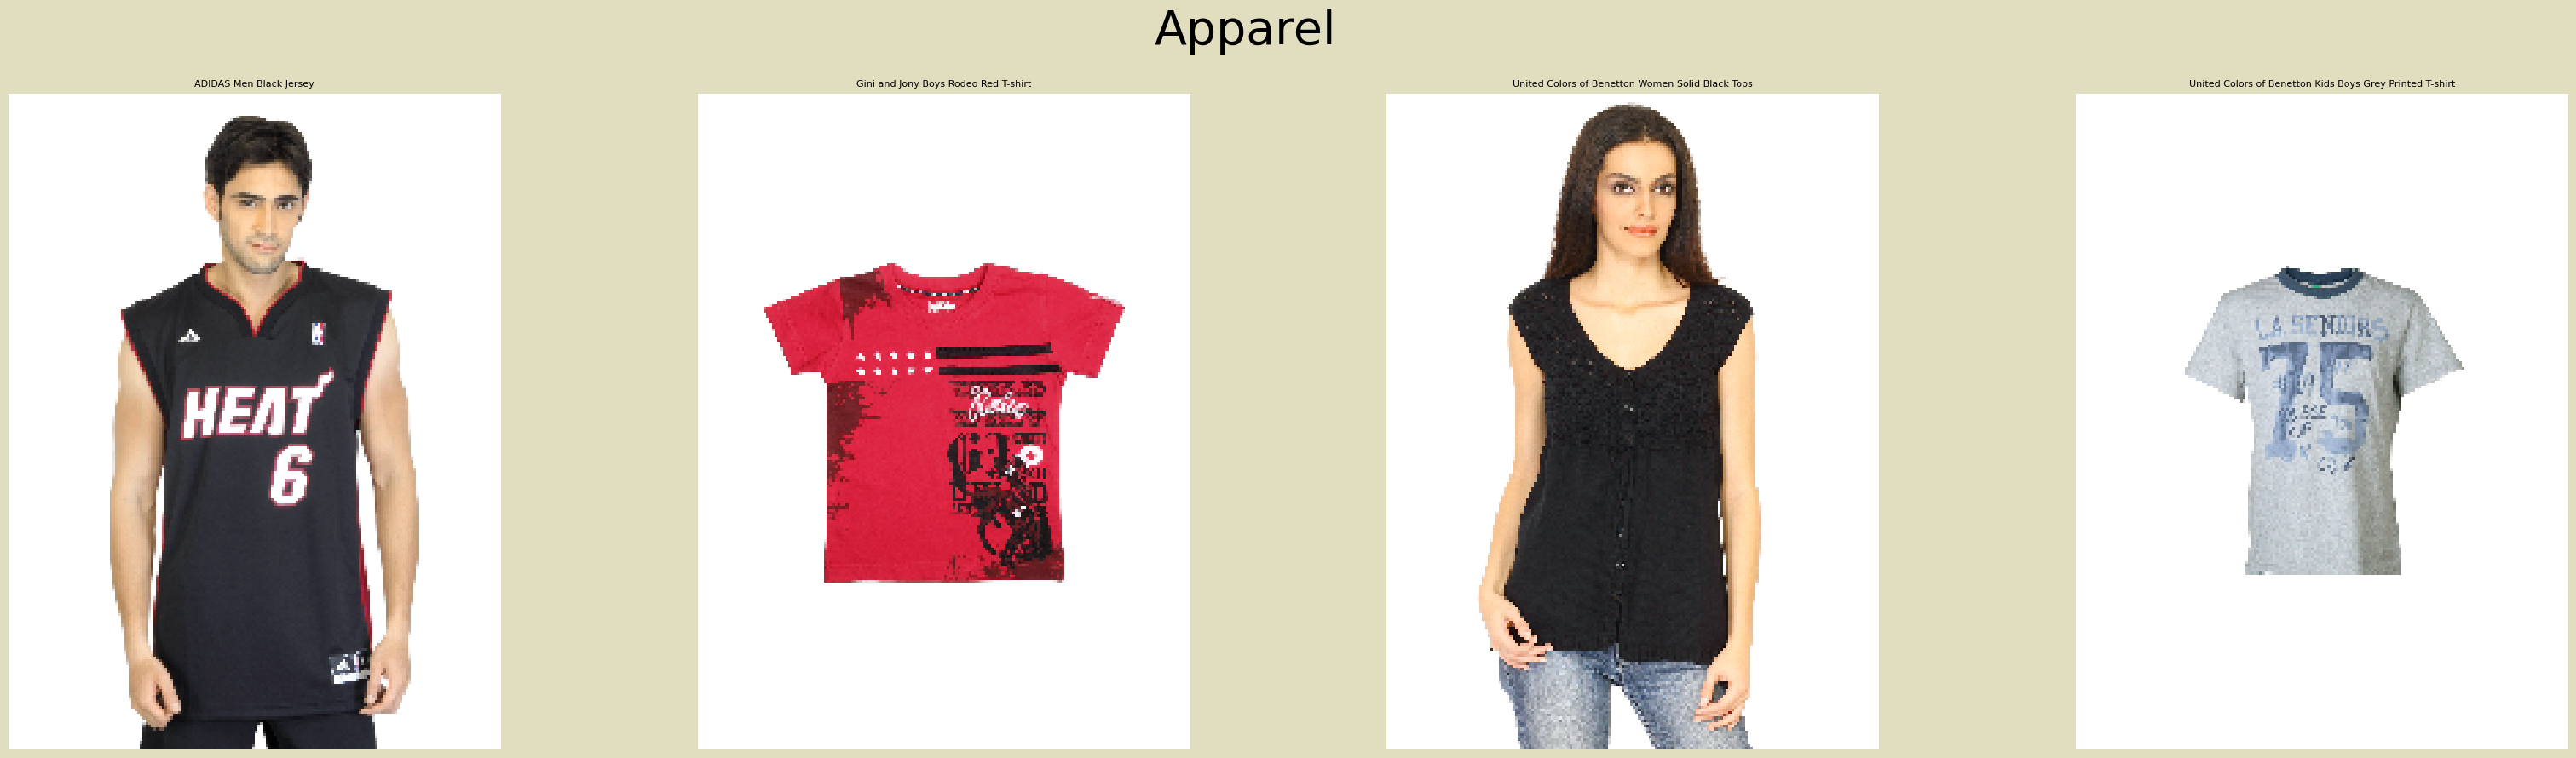

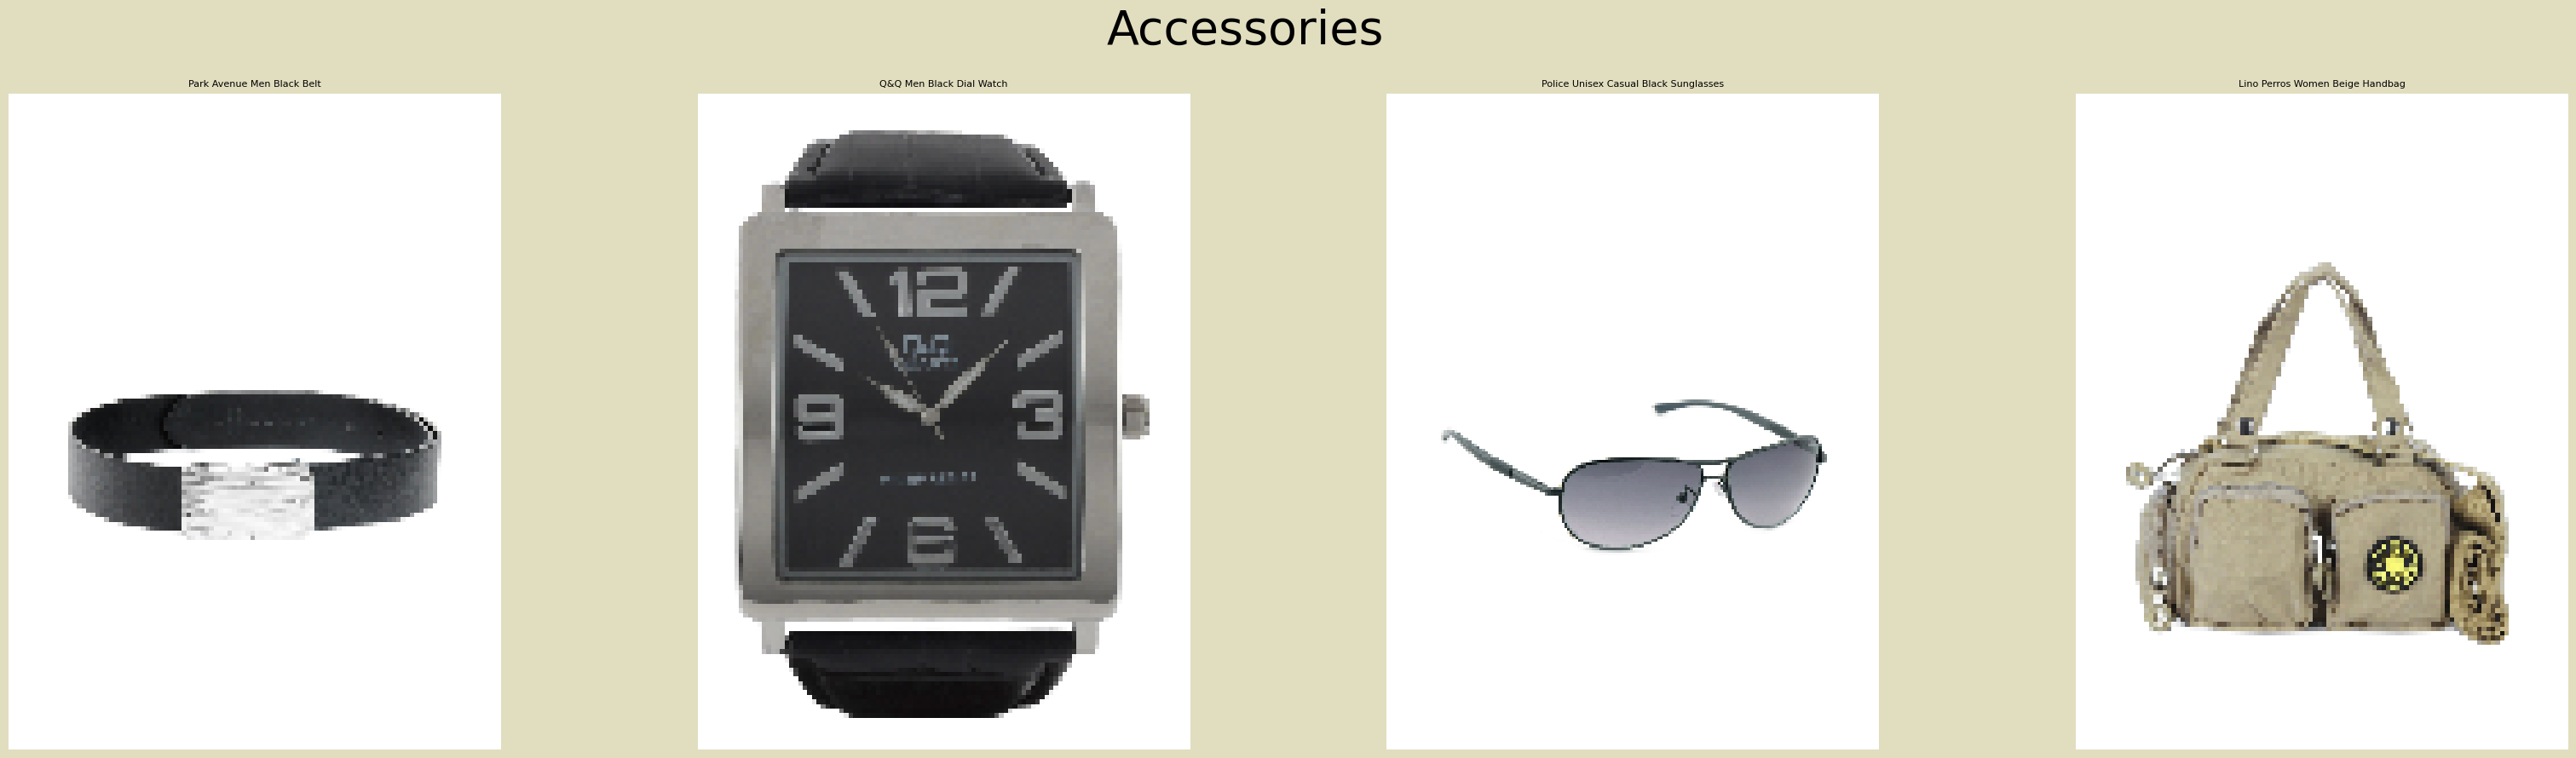

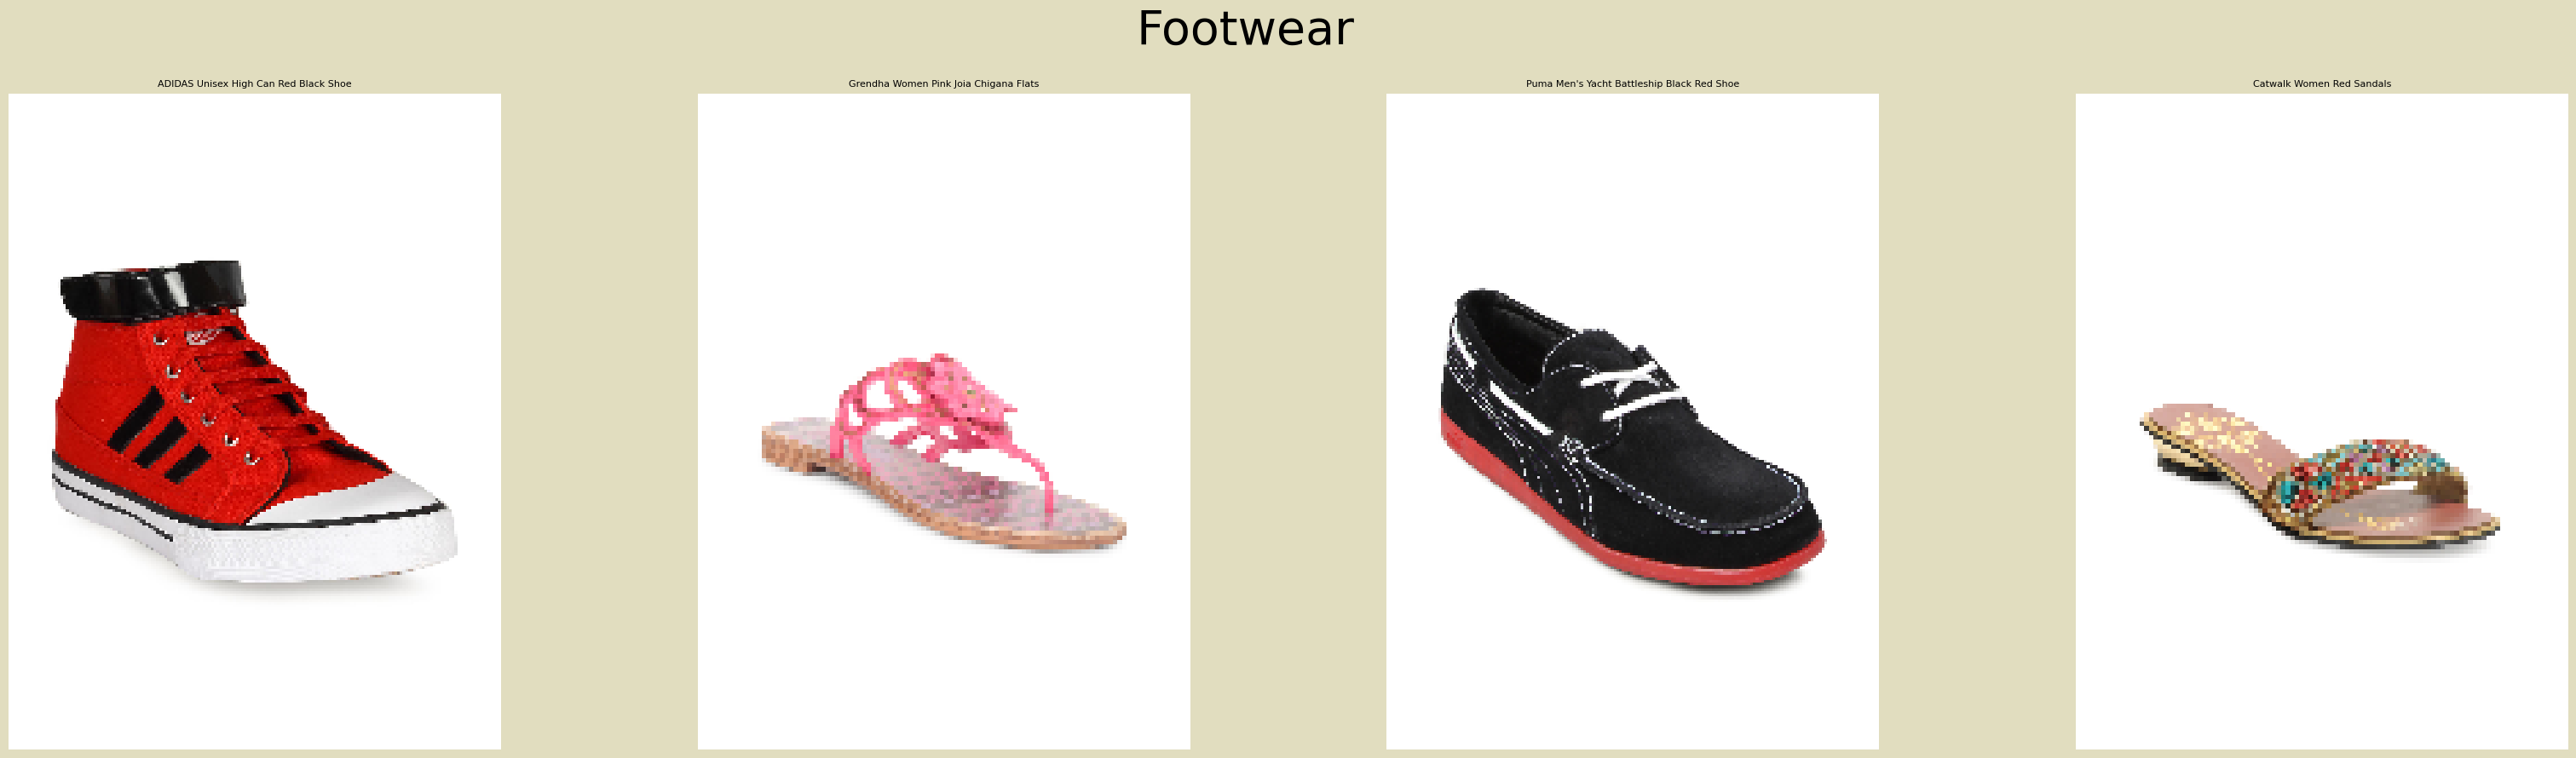

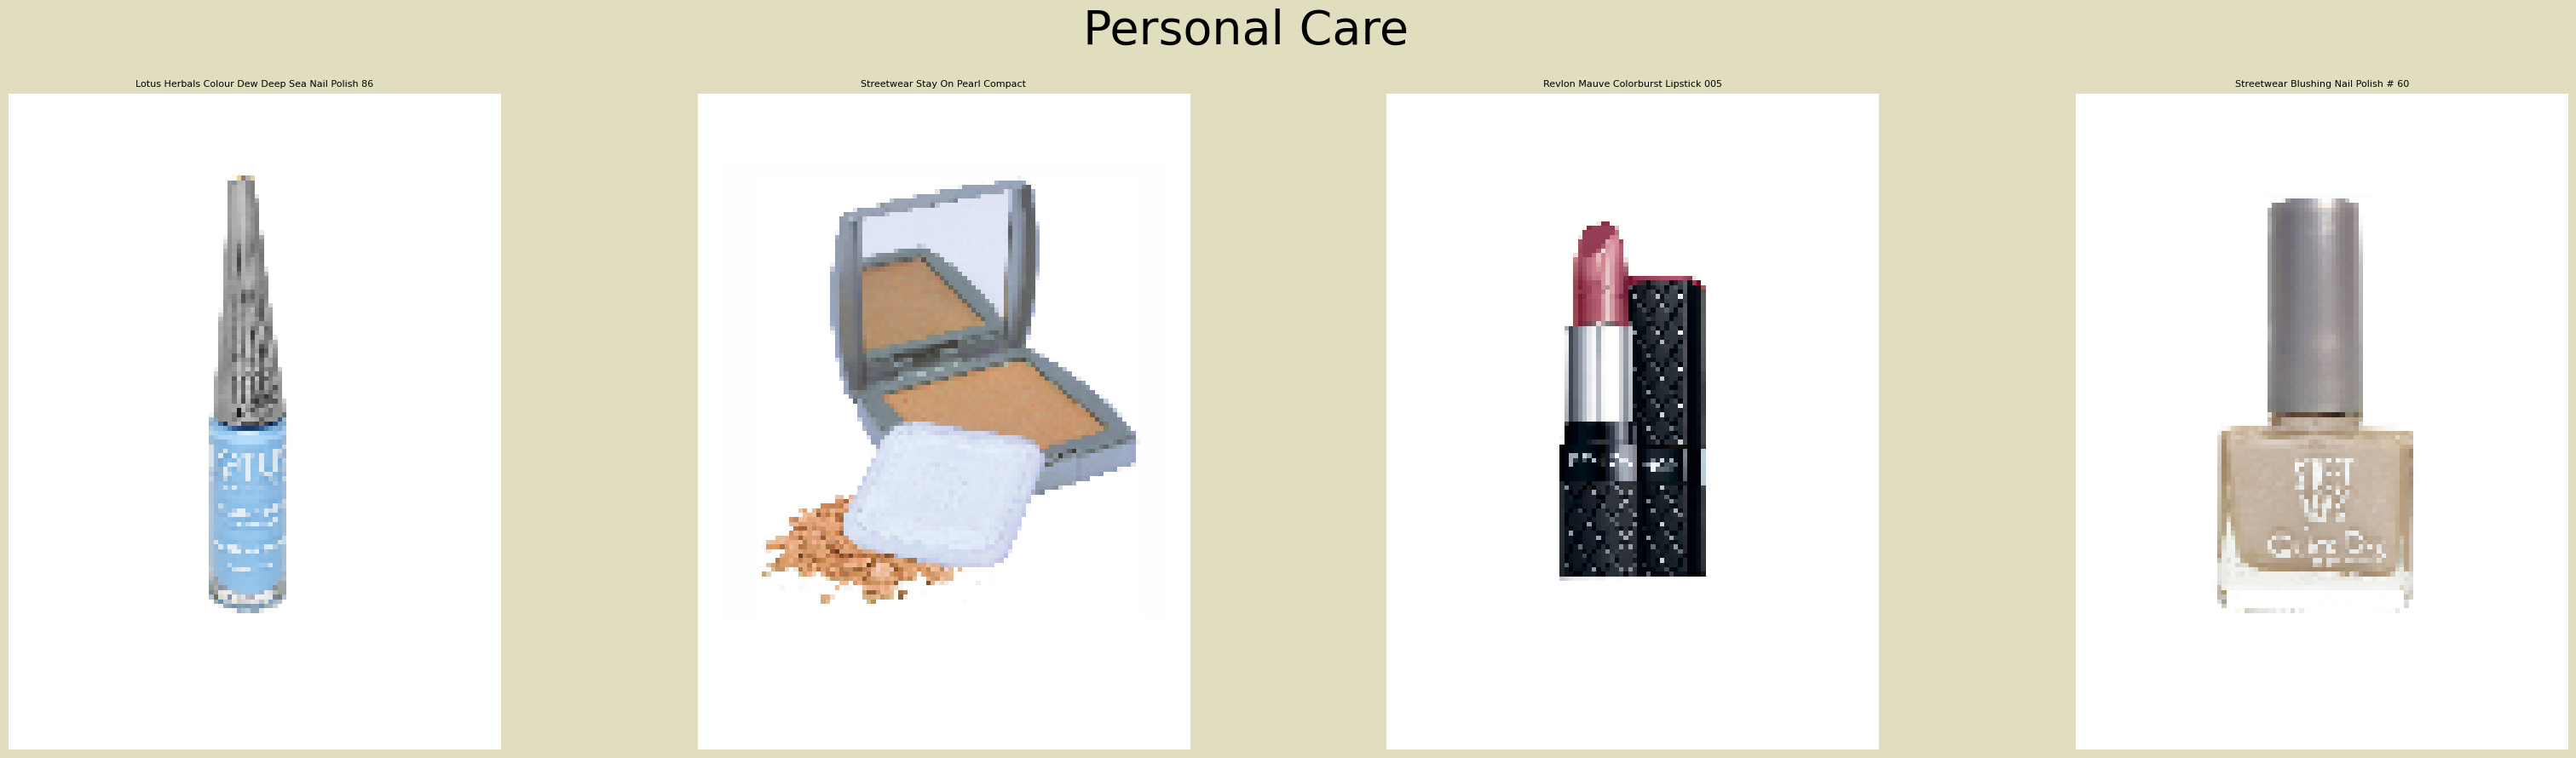

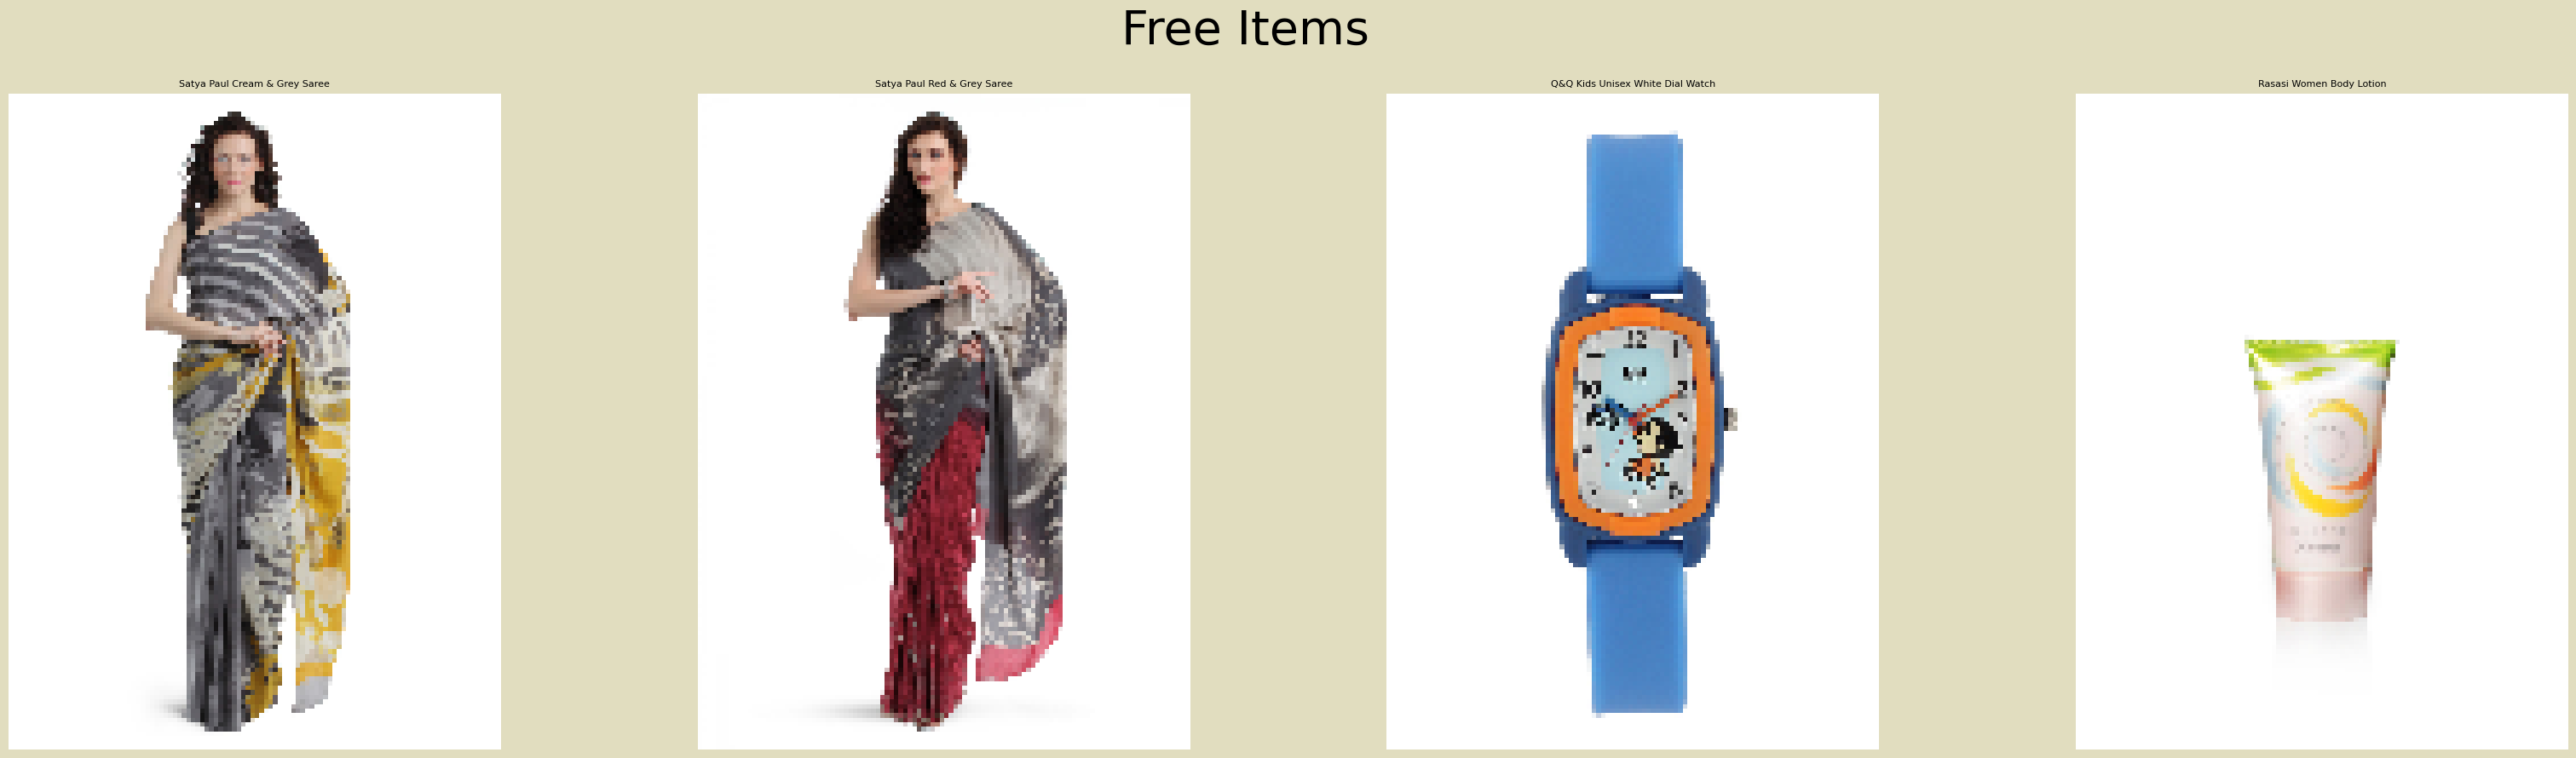

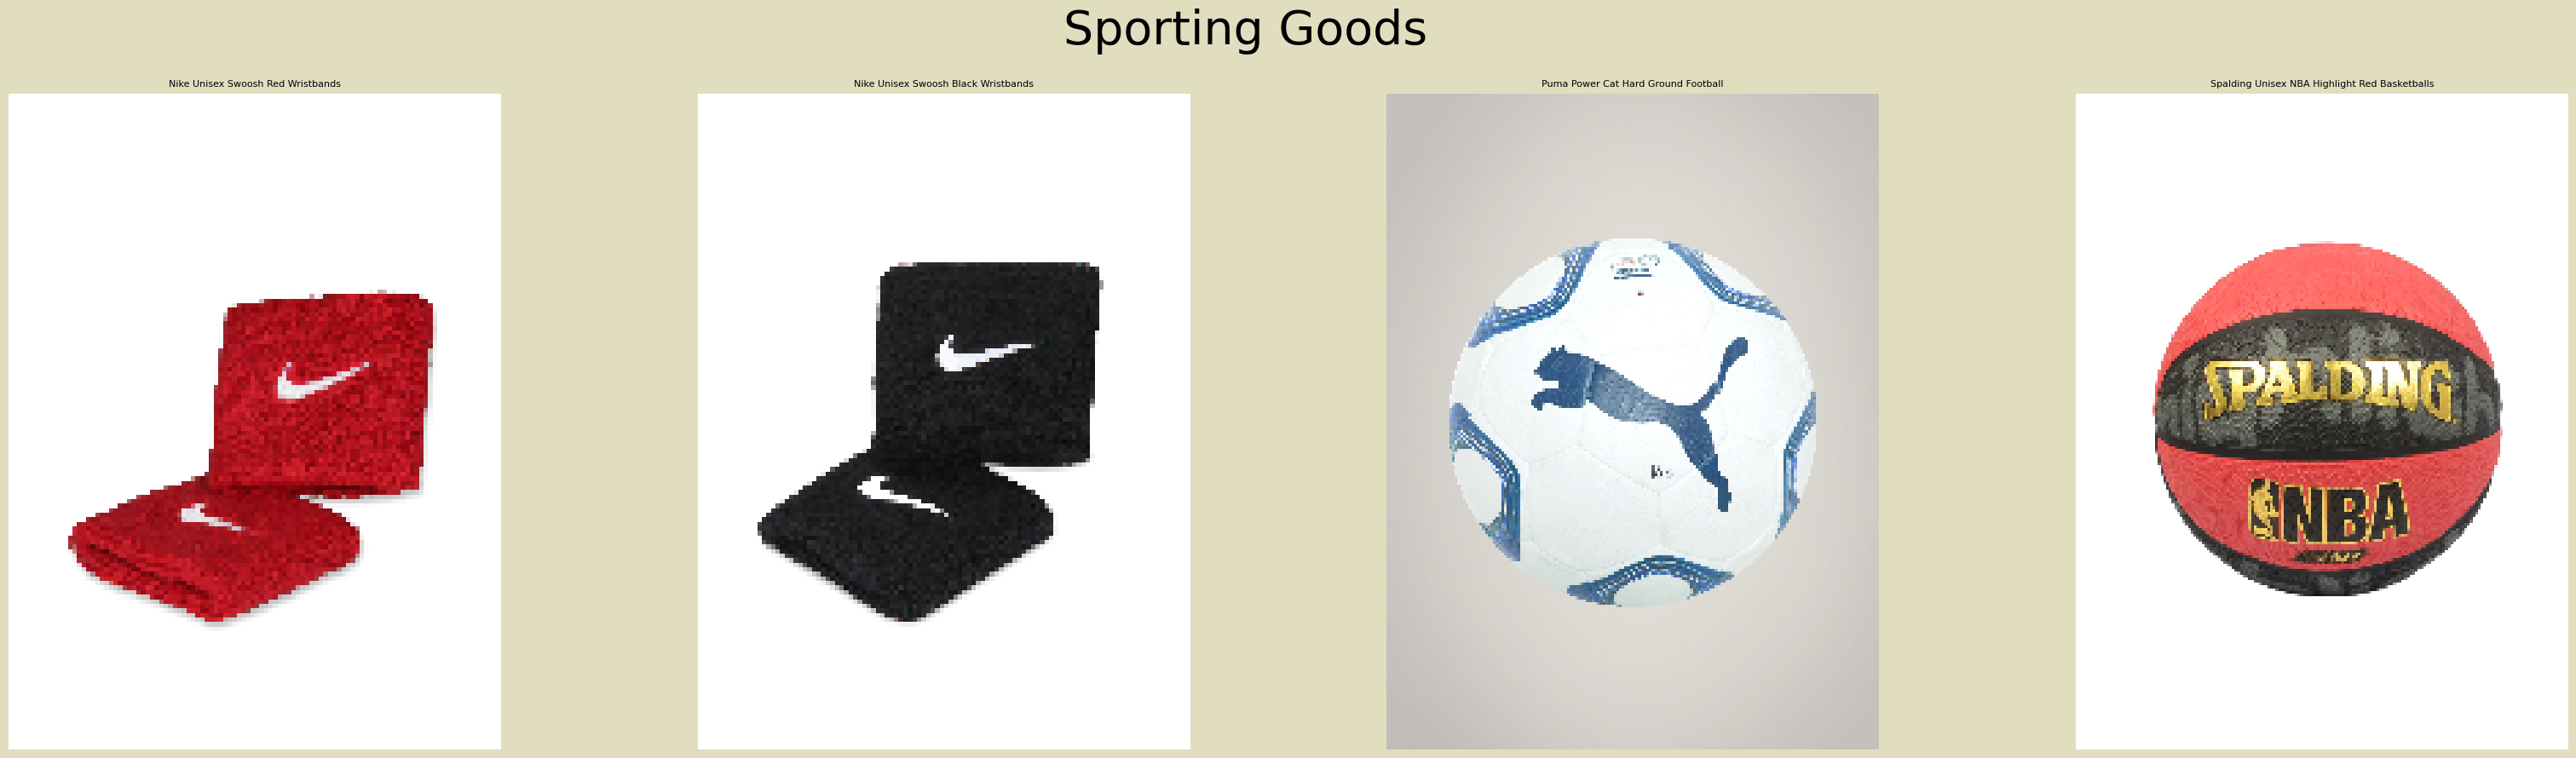

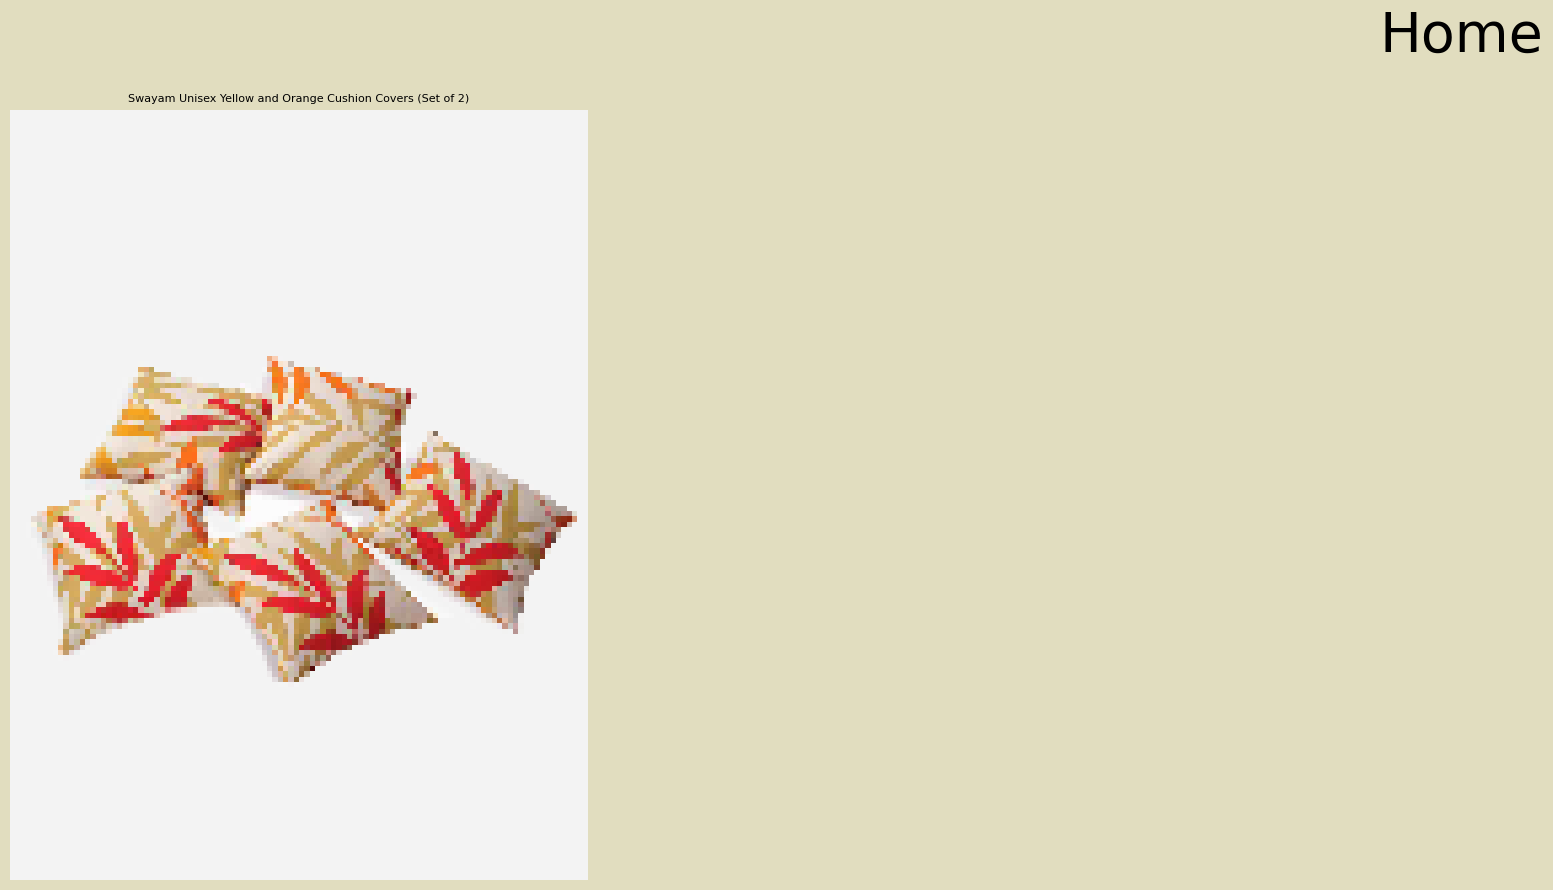

In [33]:
plot_grouped_images(styles_csv, 'masterCategory')

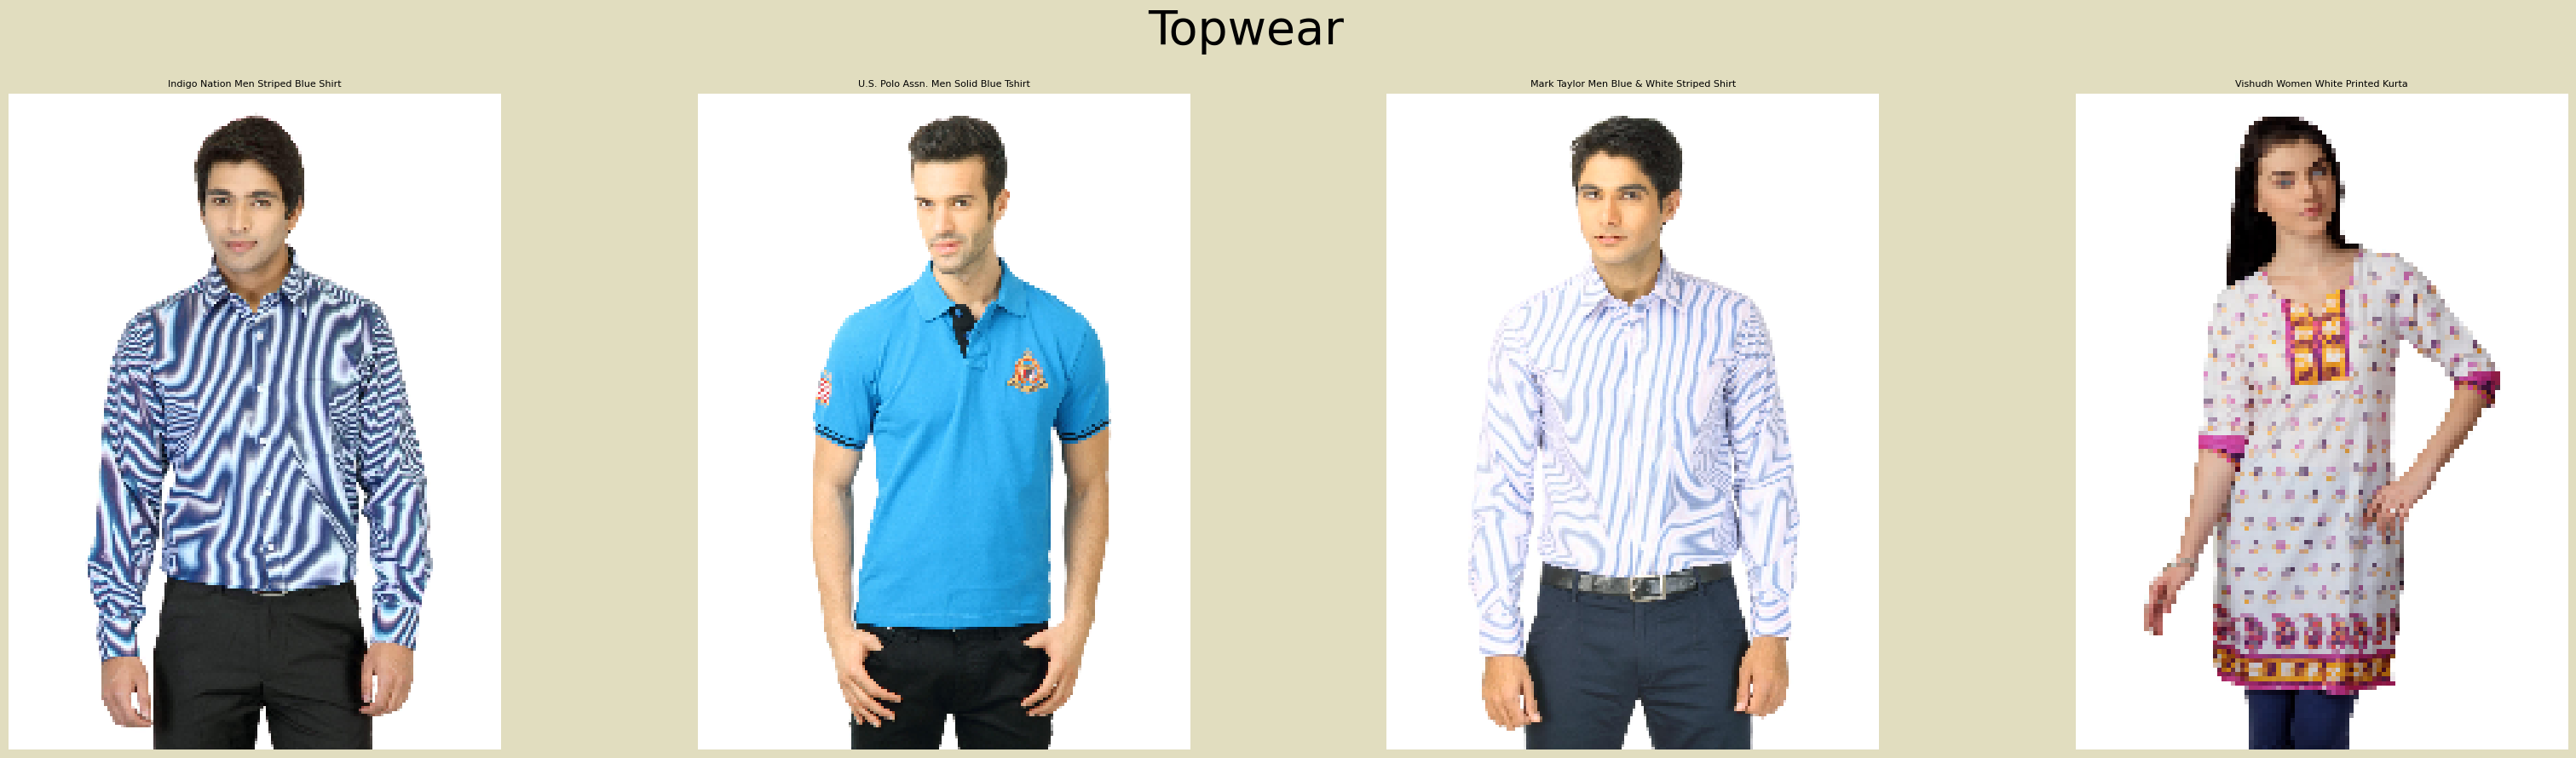

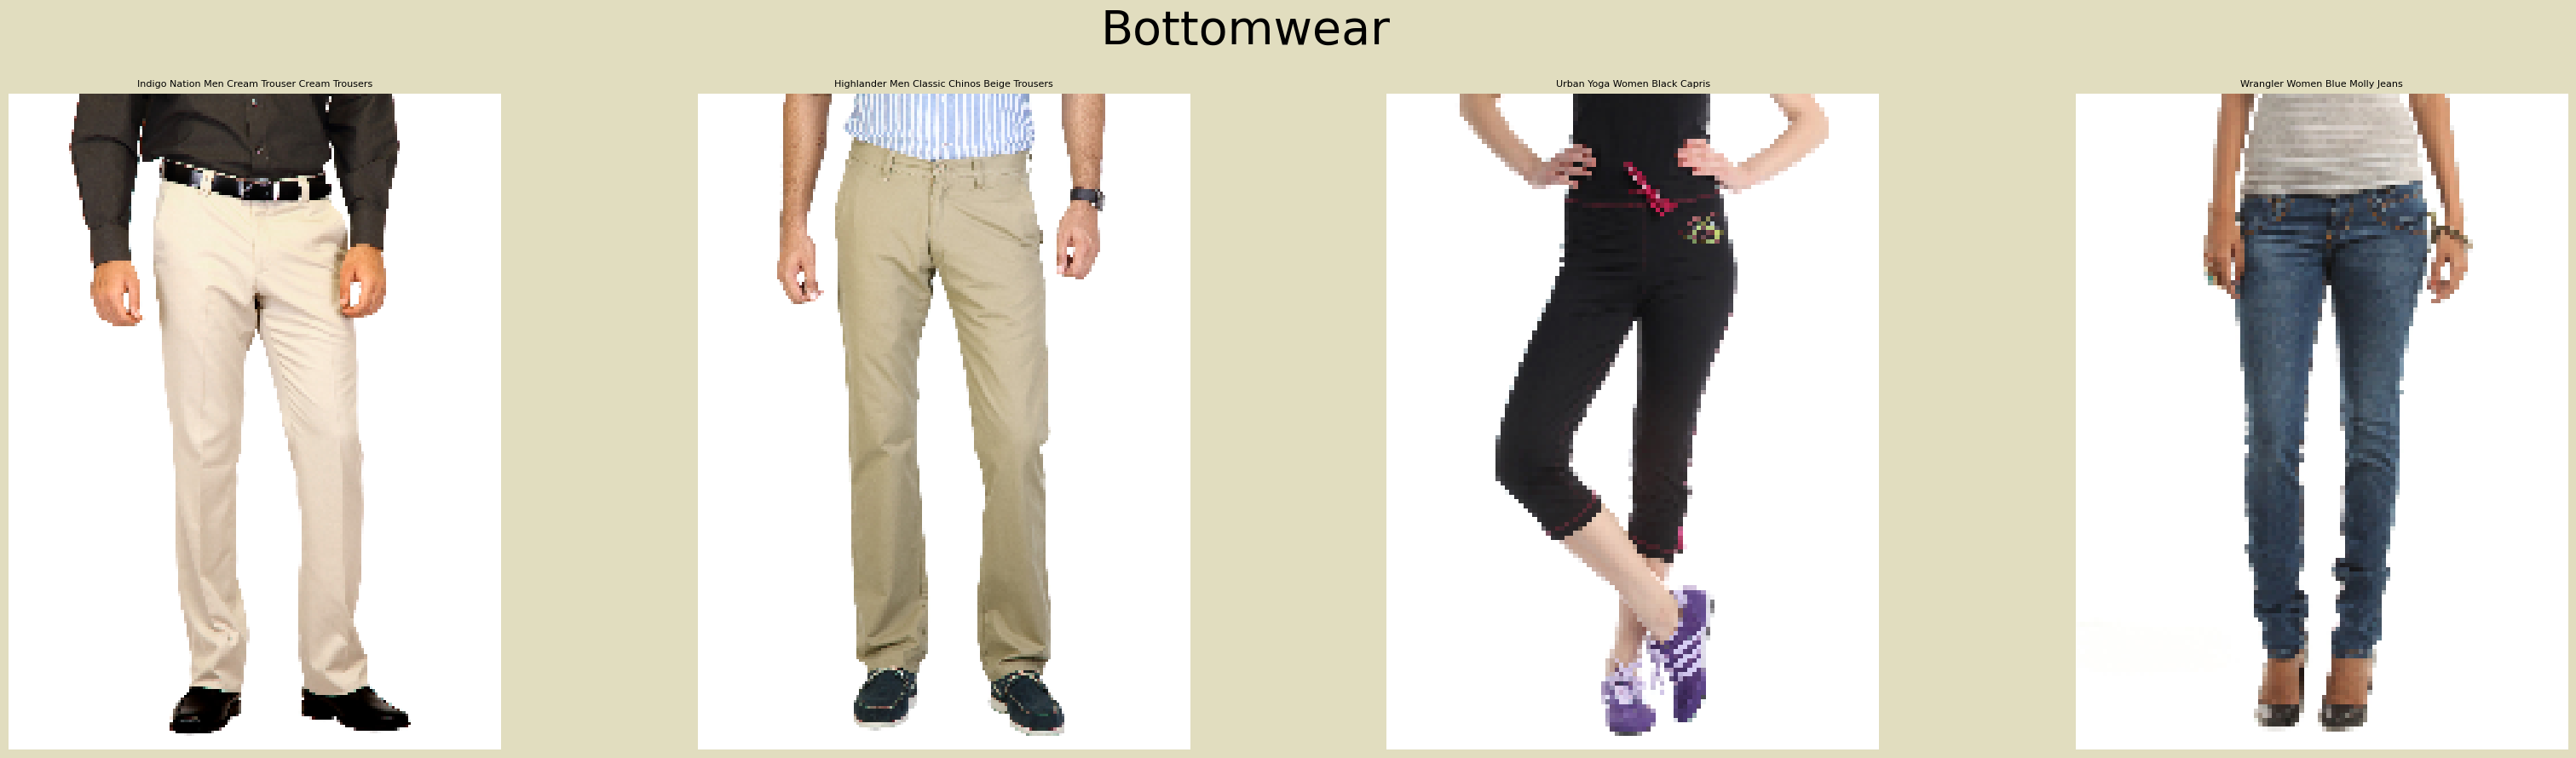

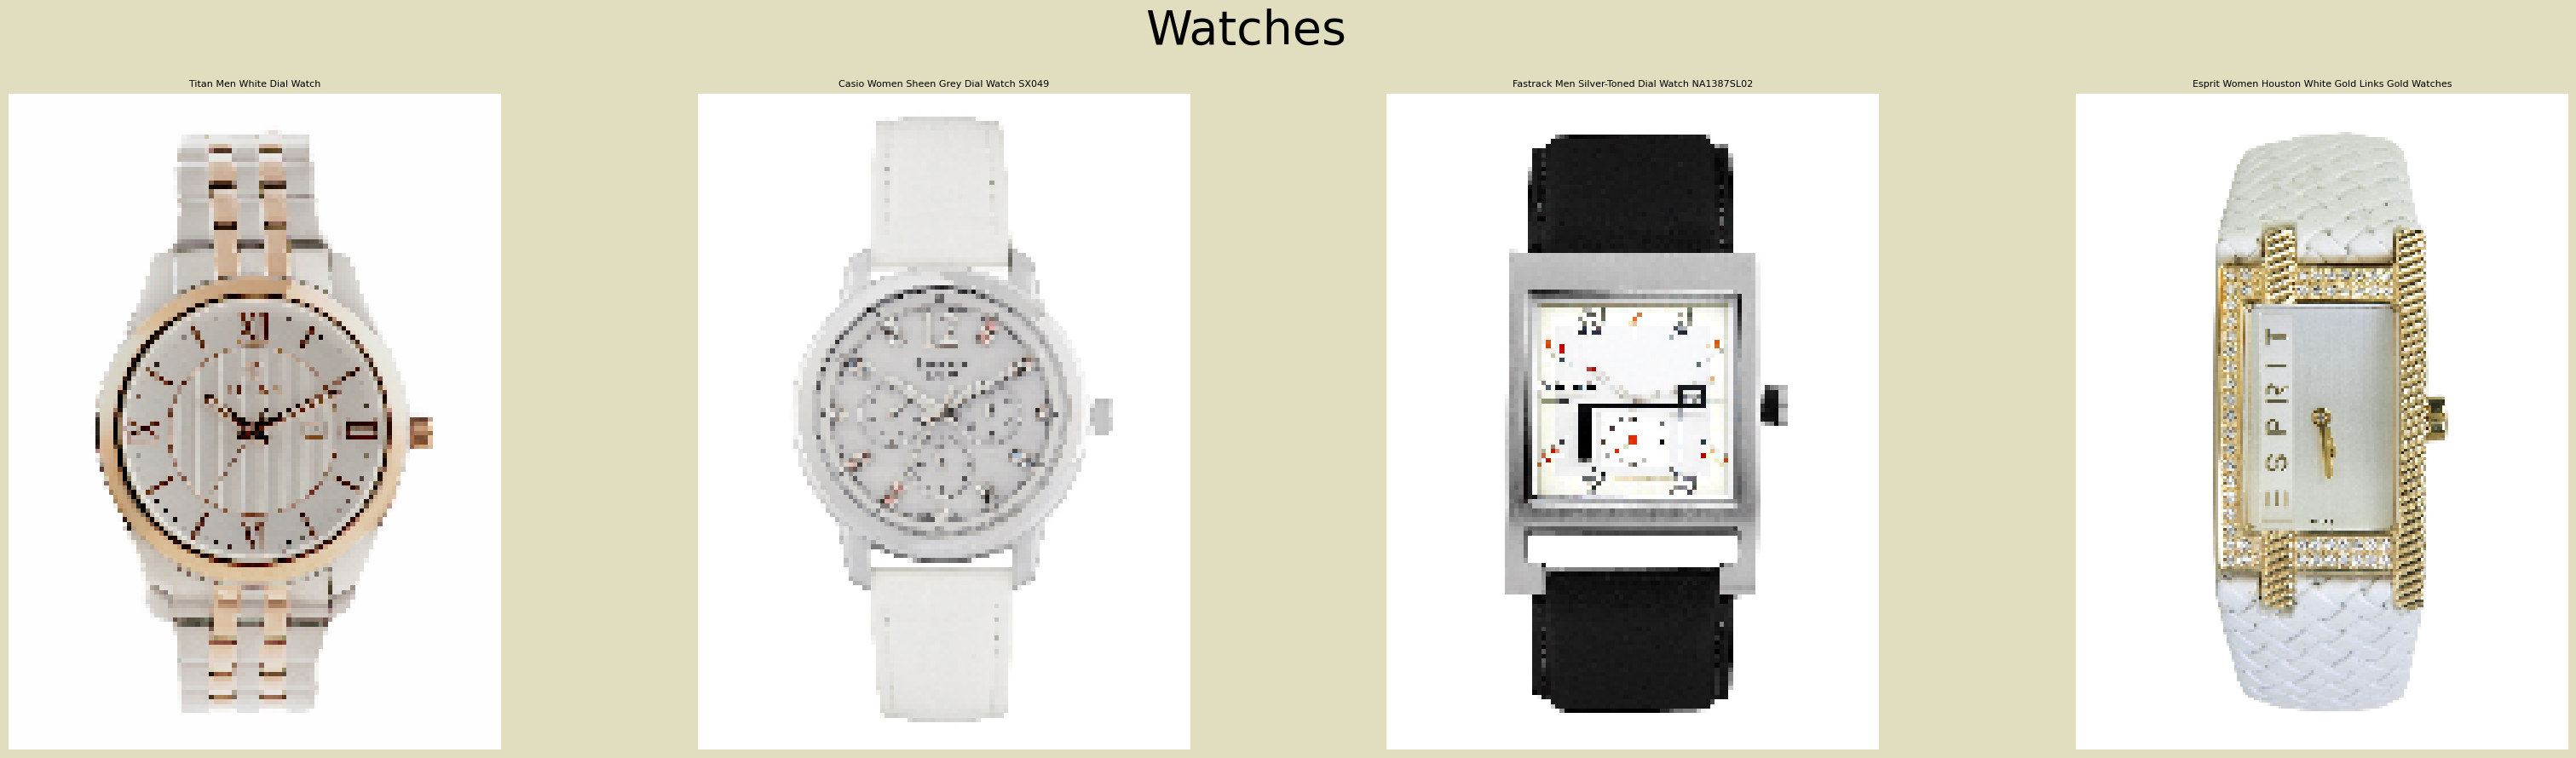

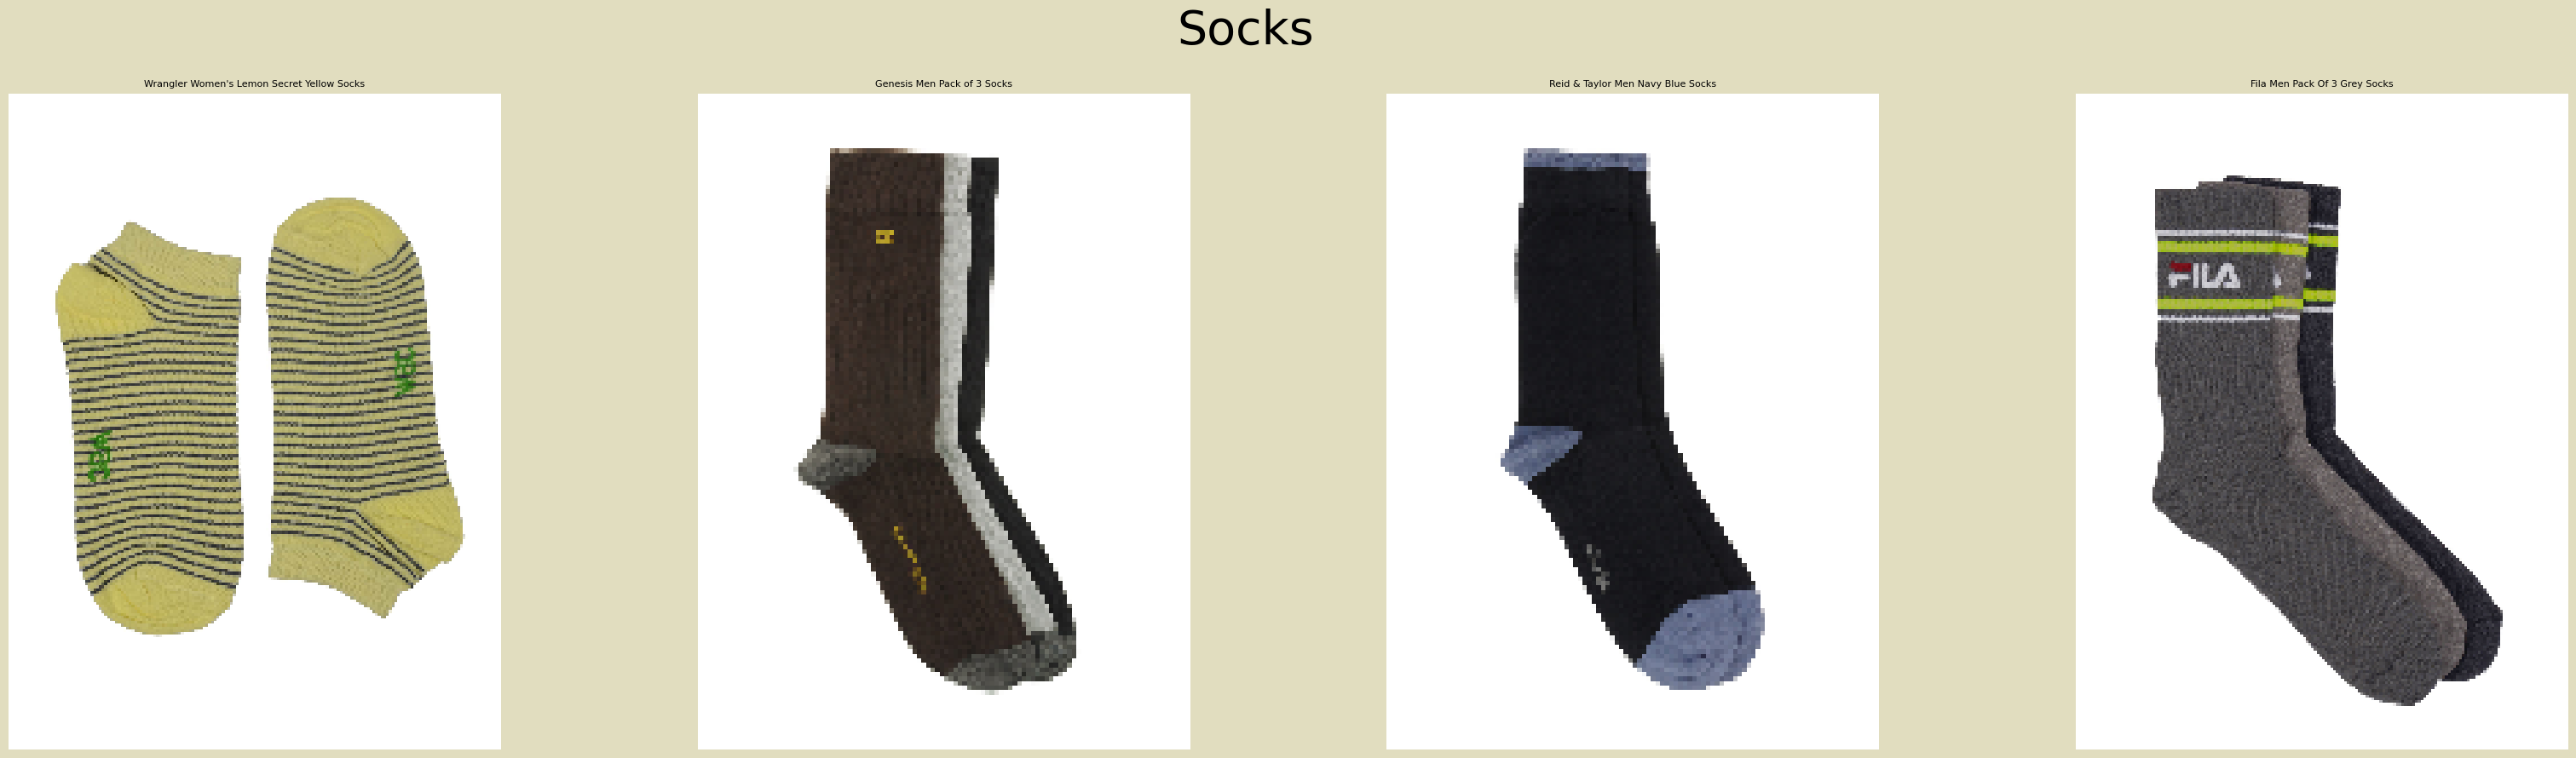

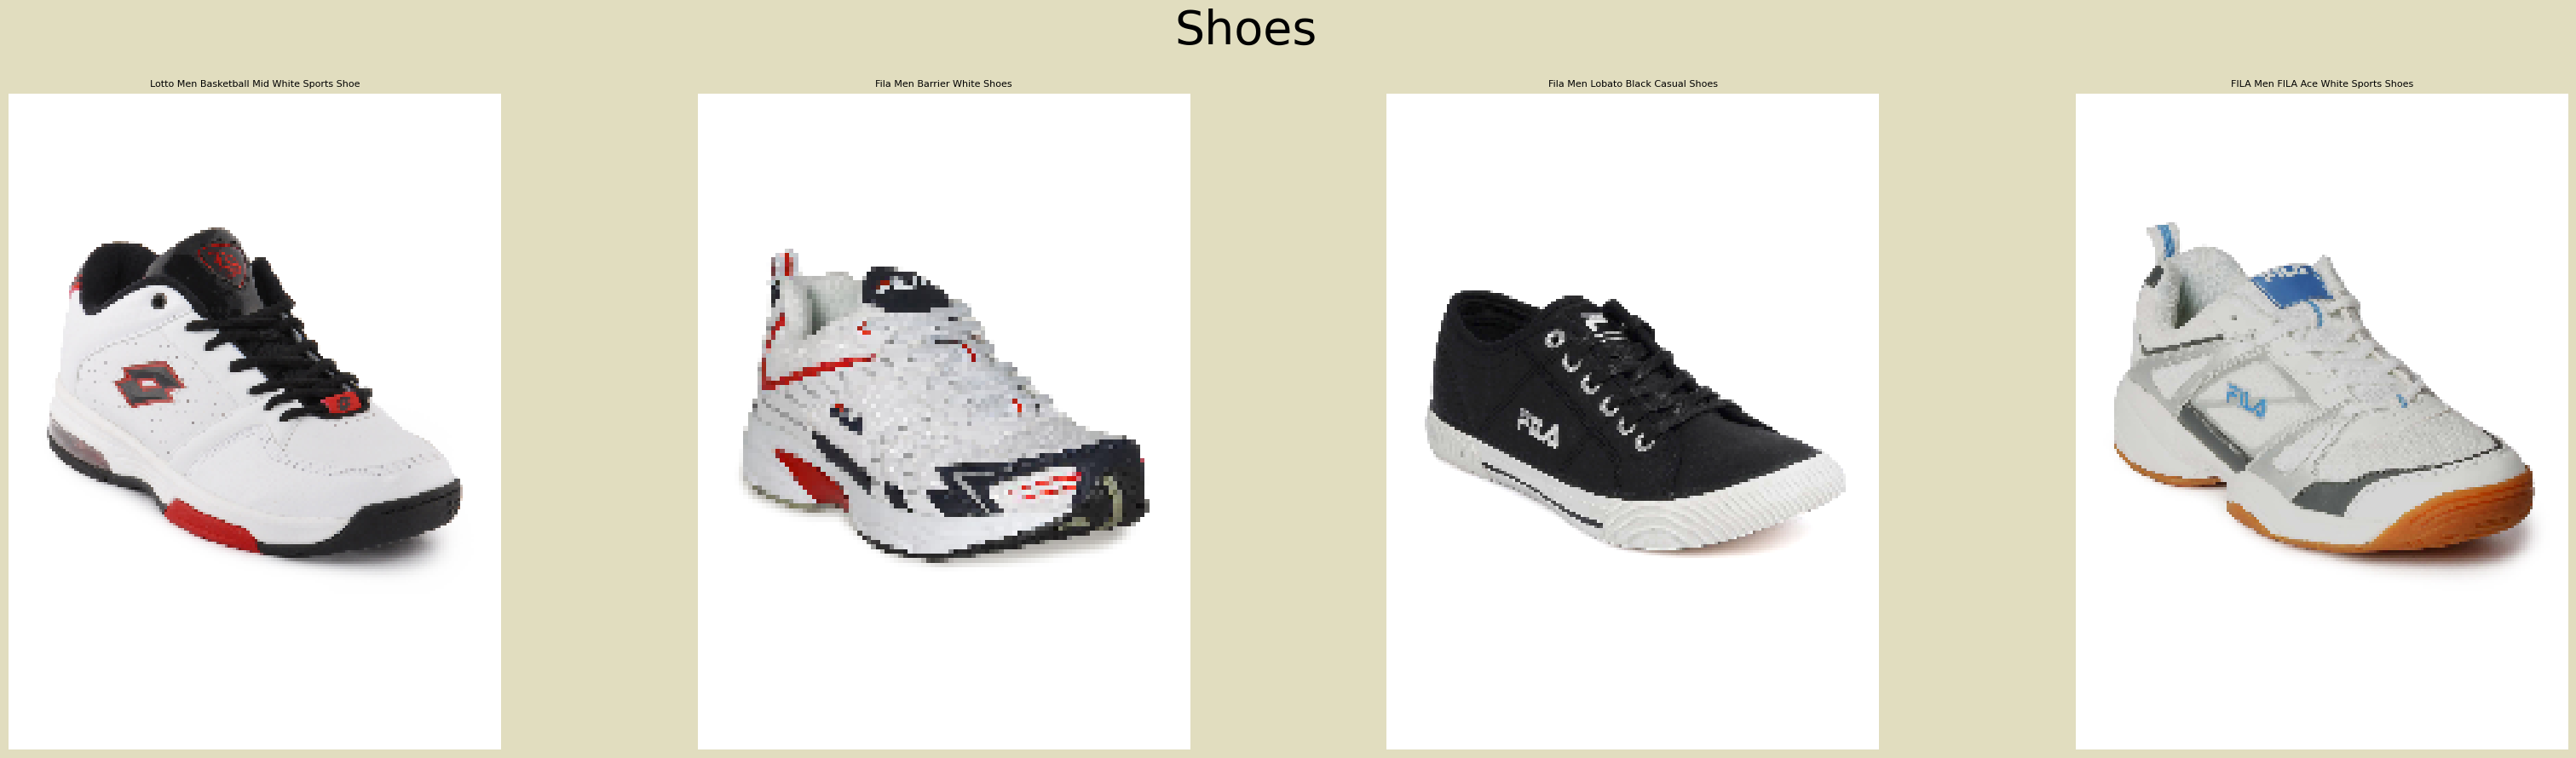

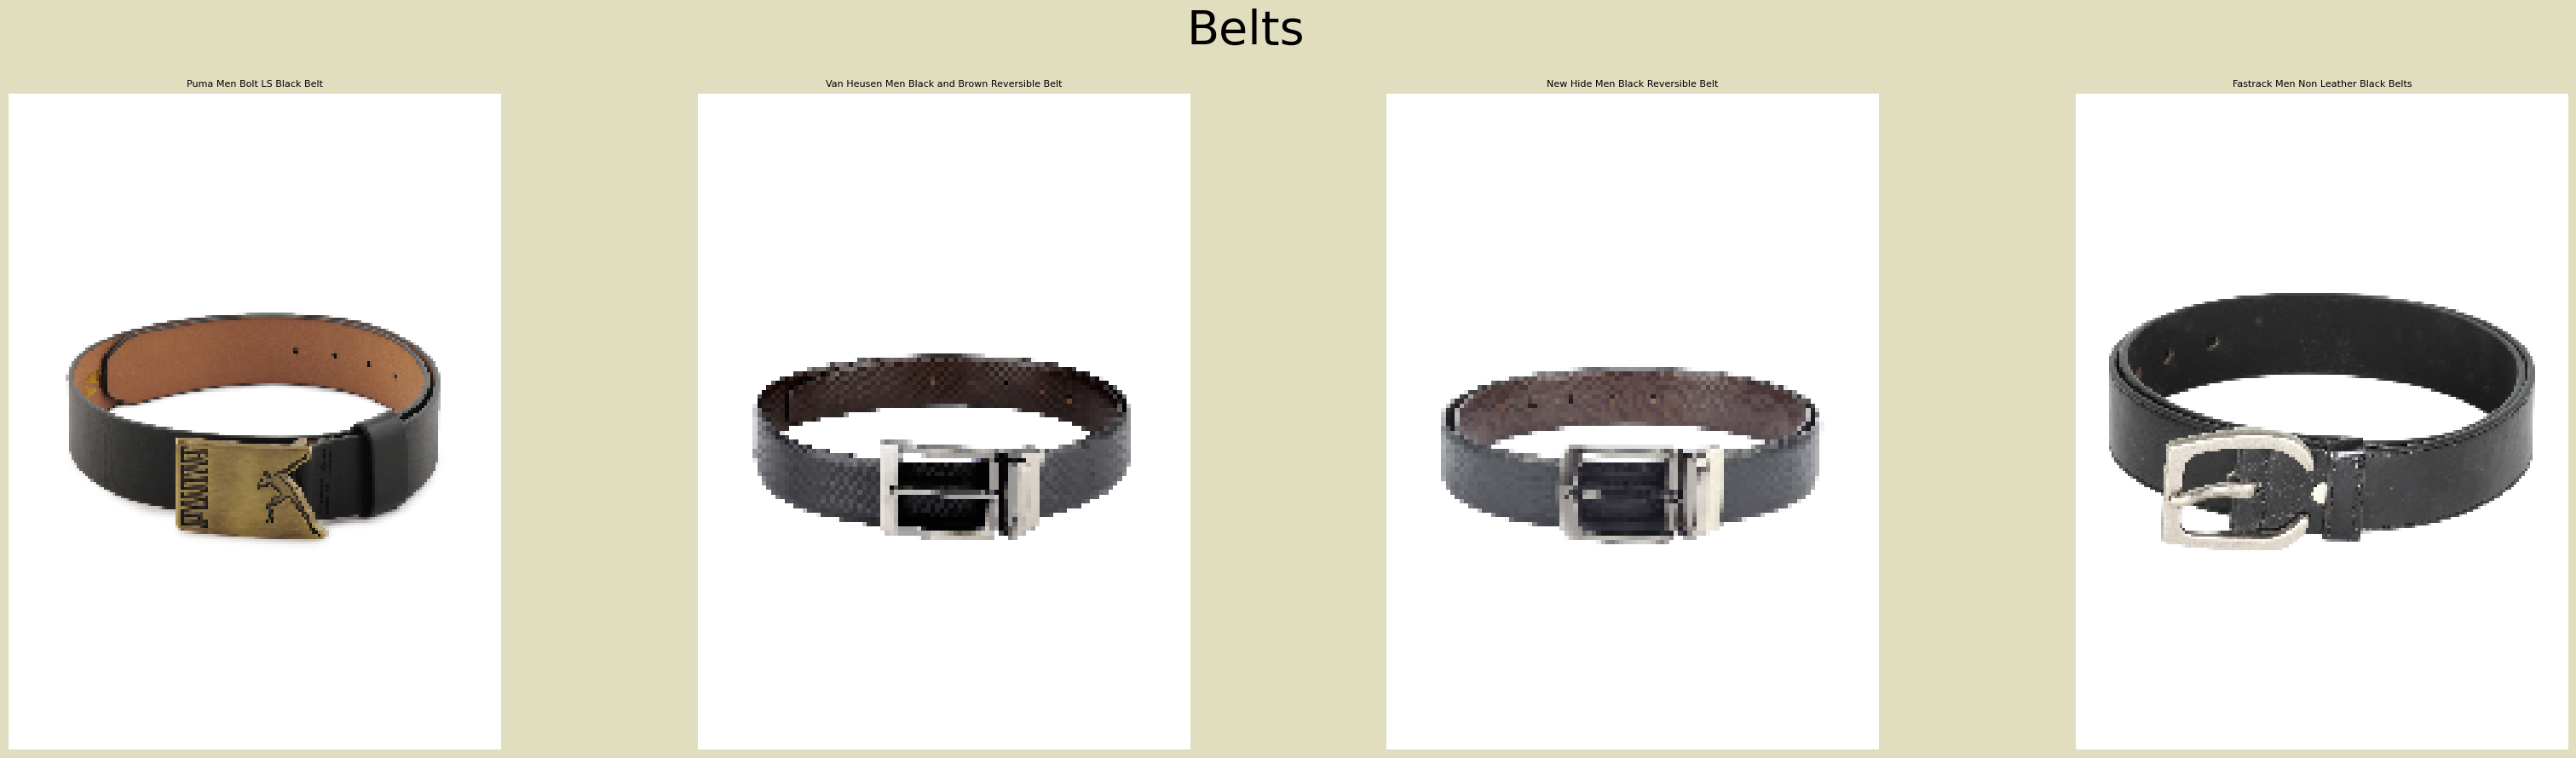

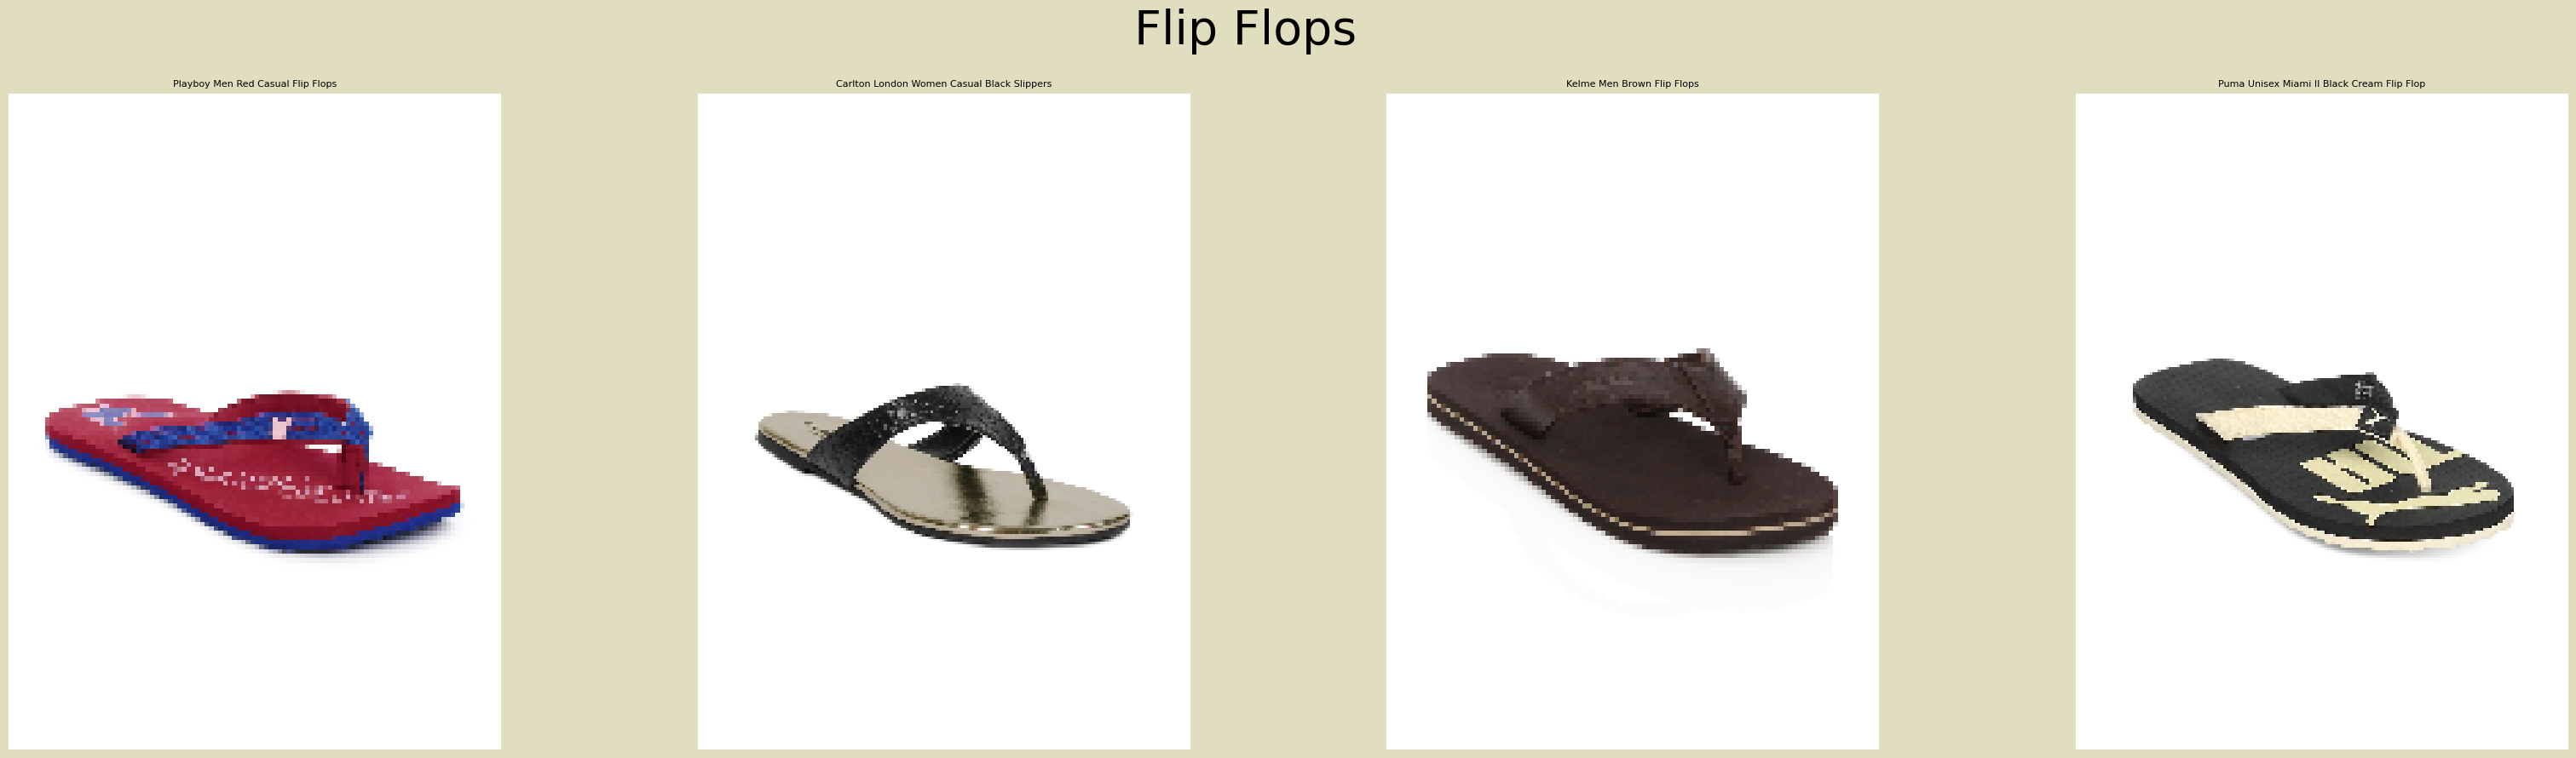

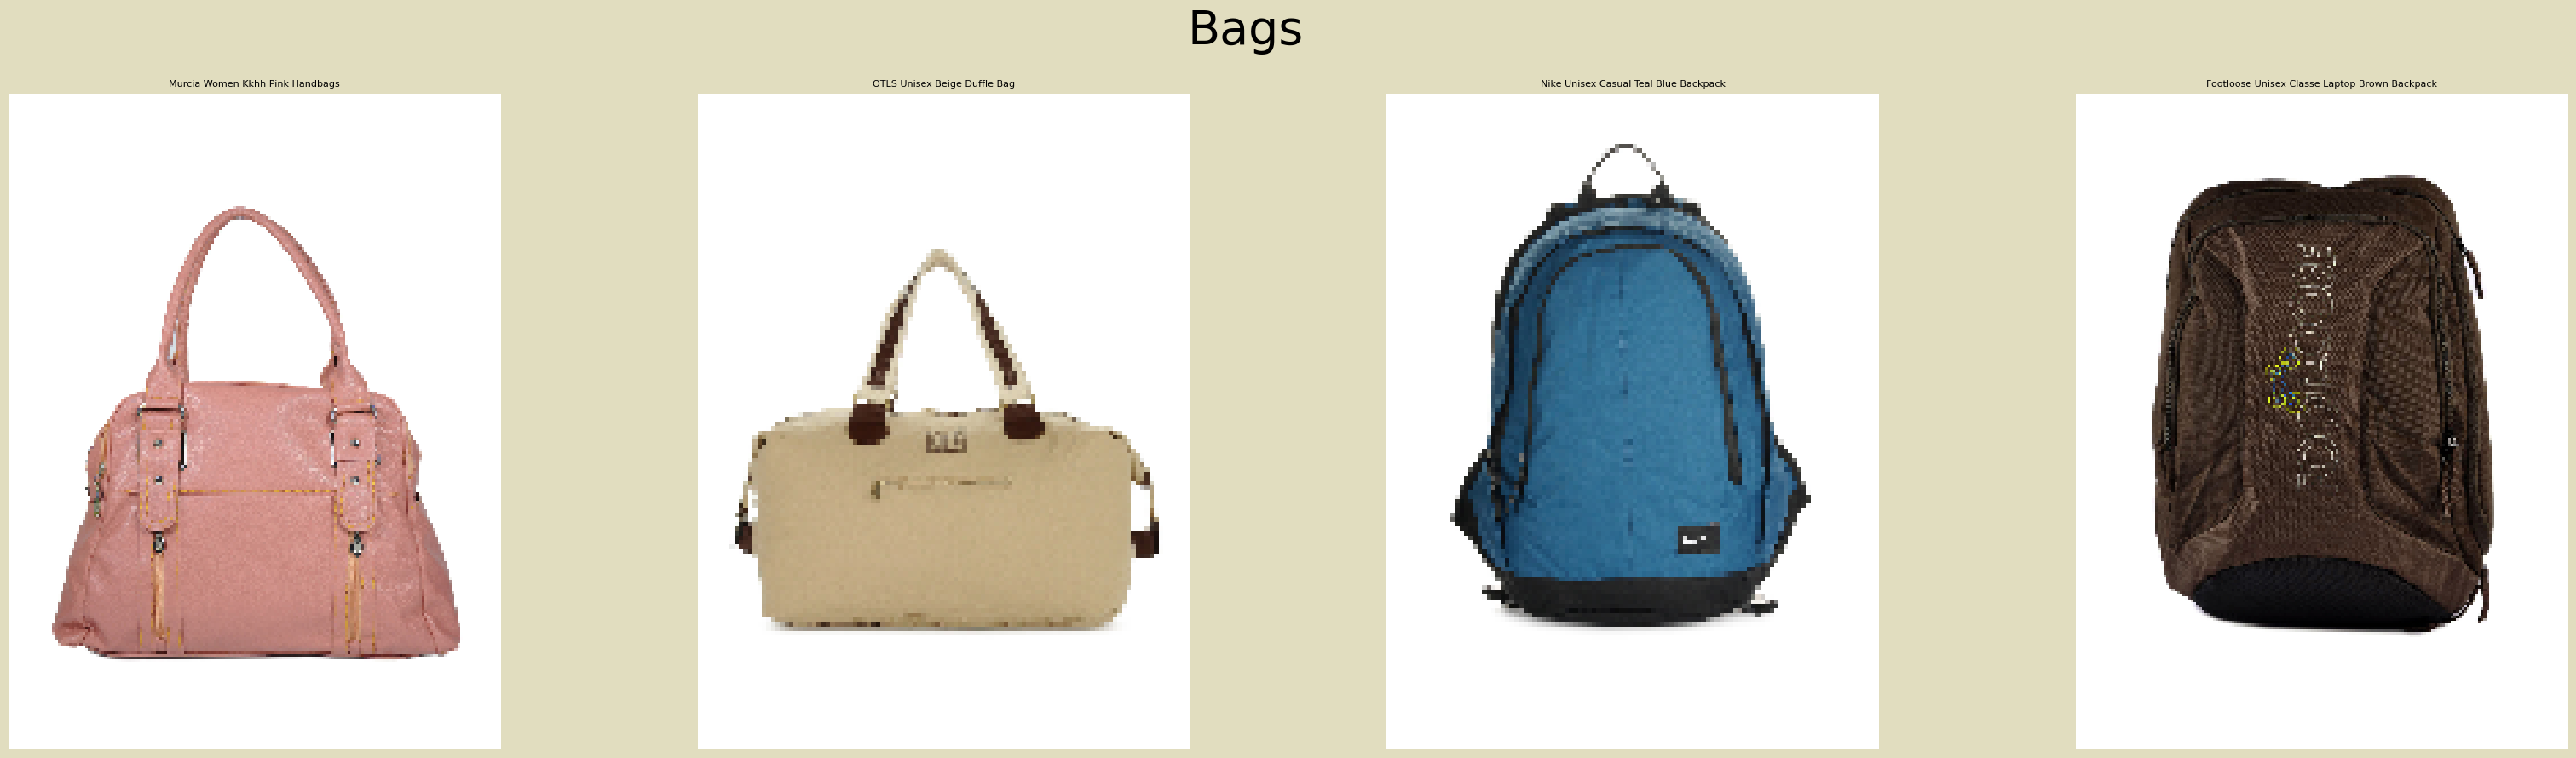

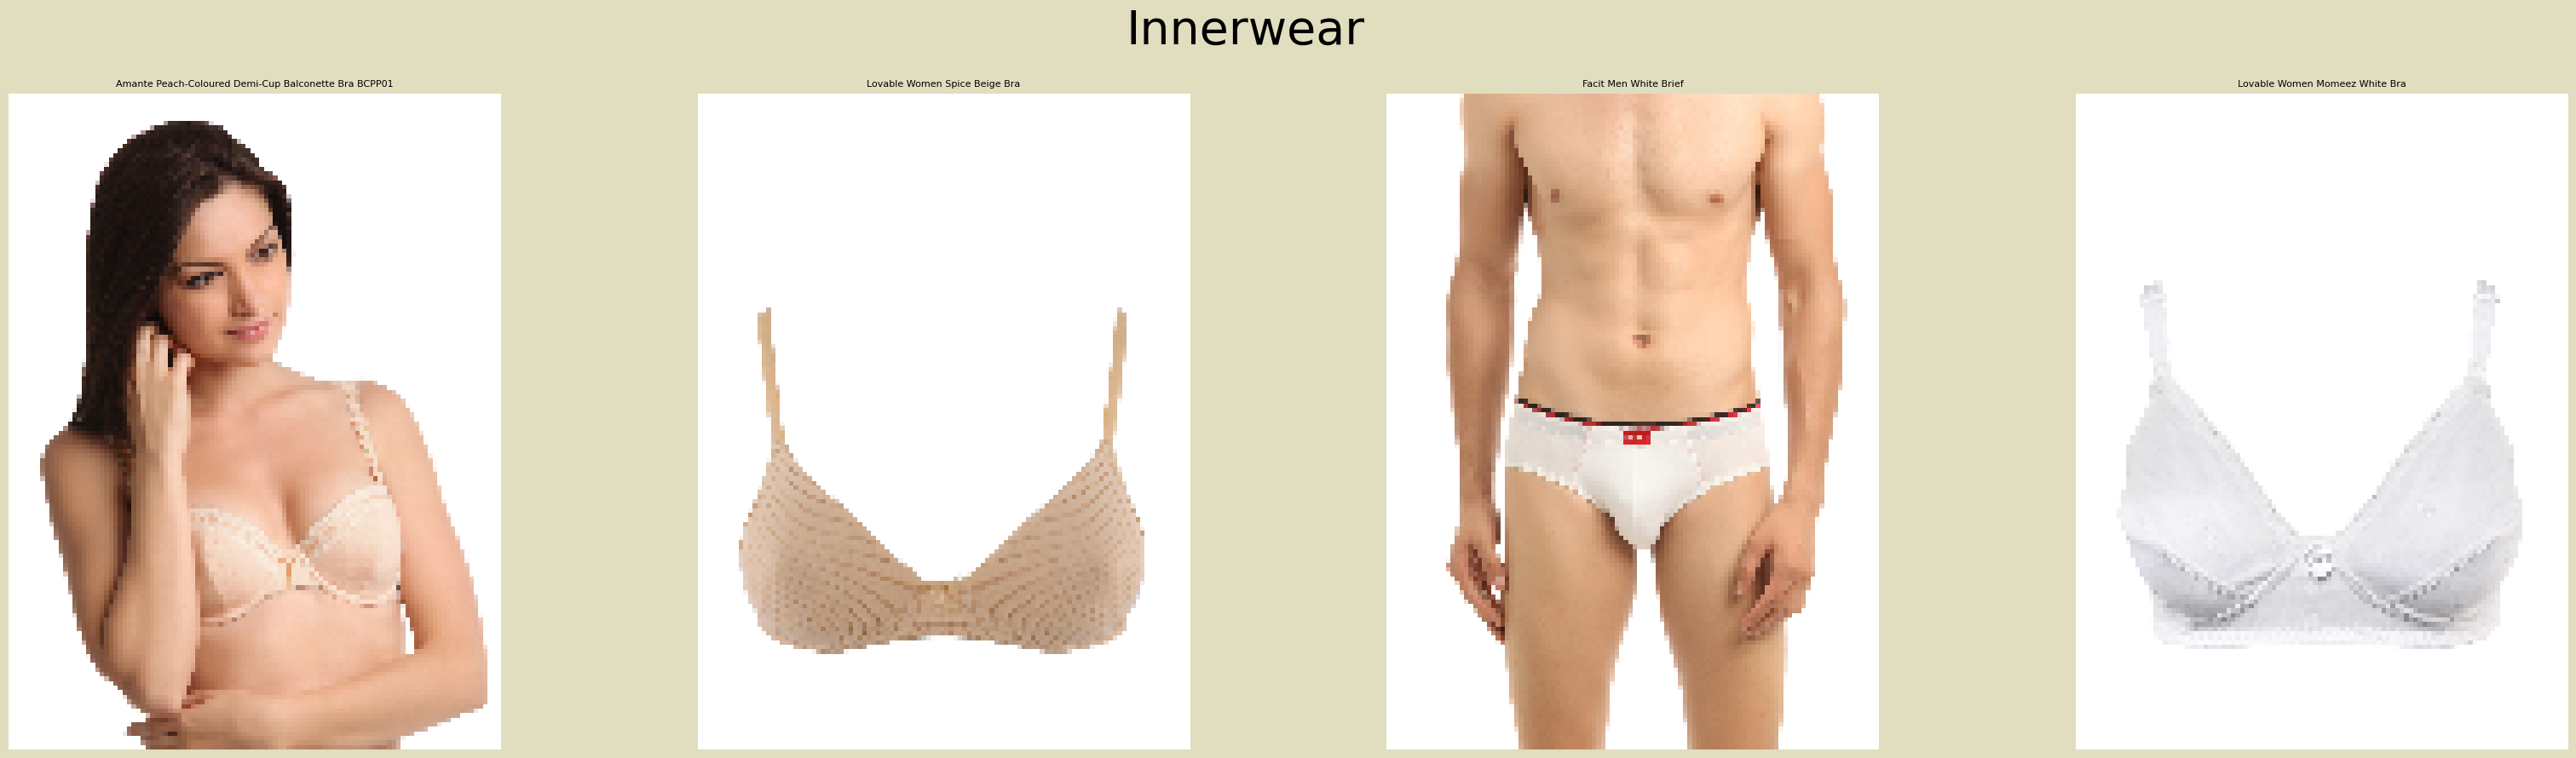

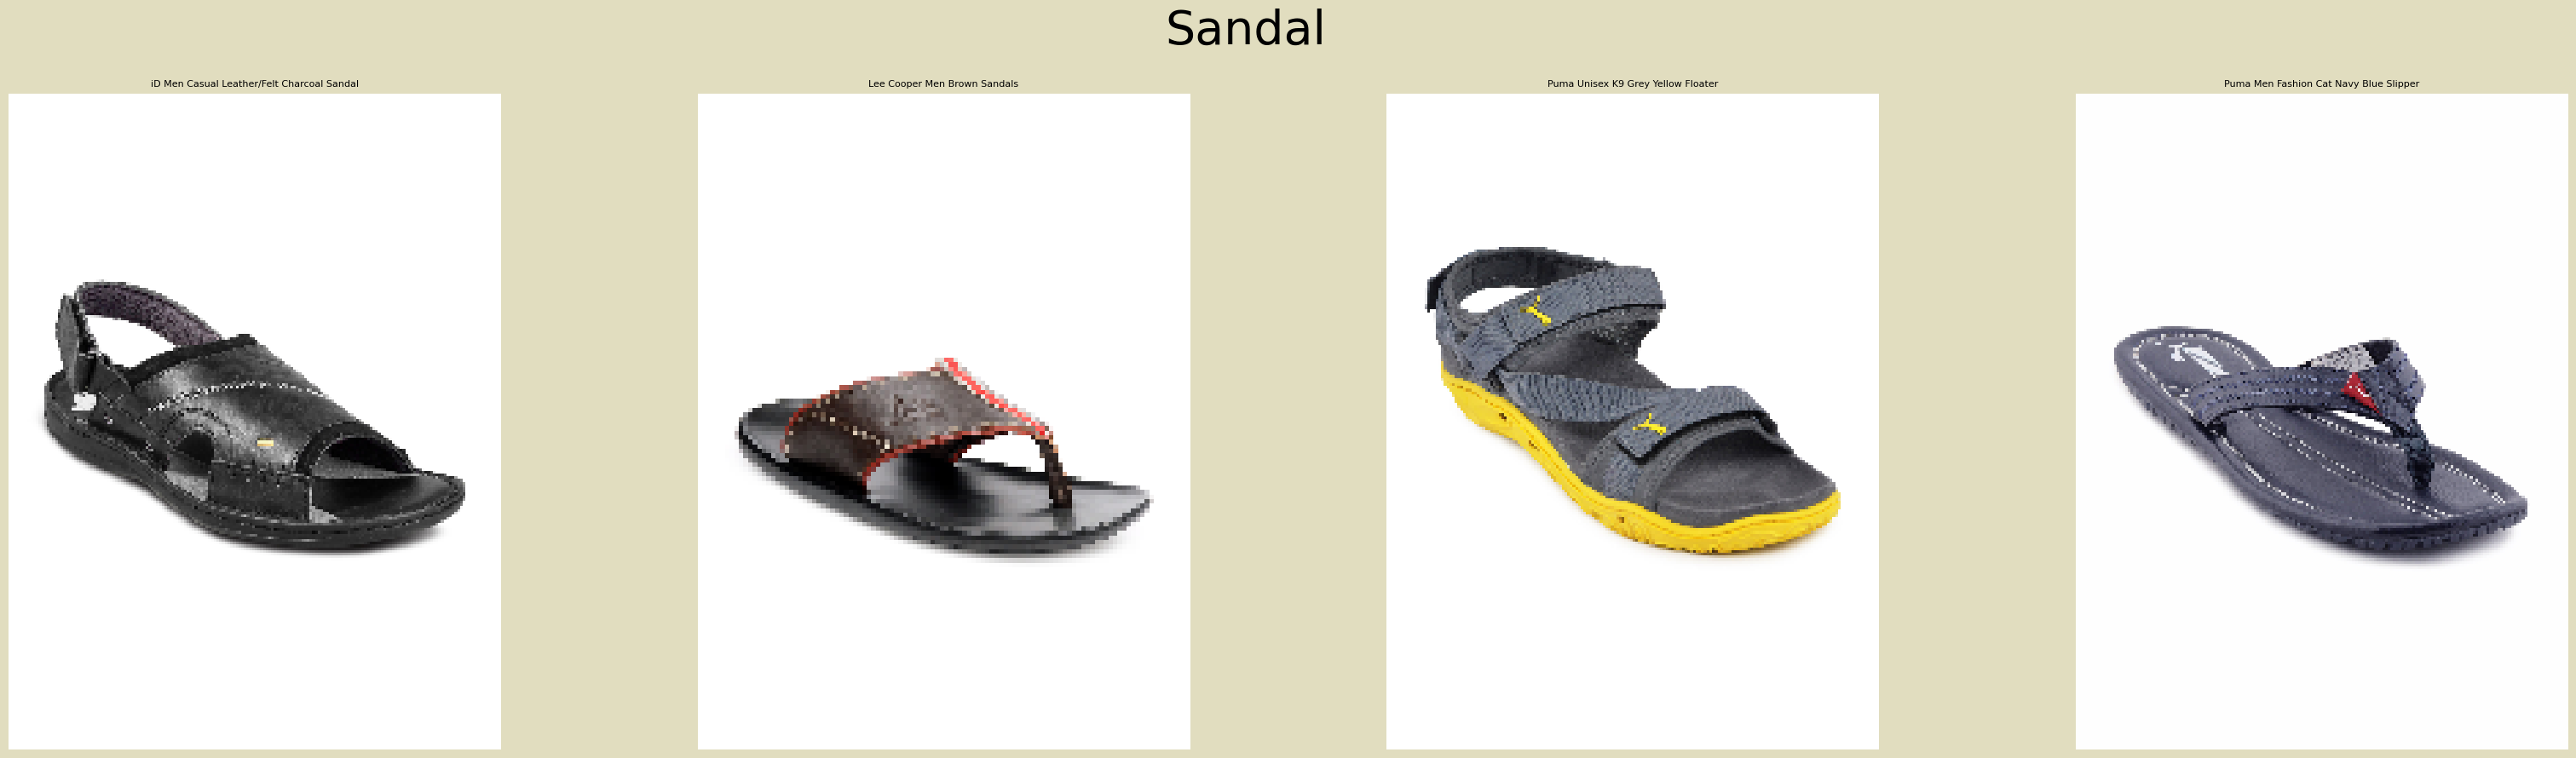

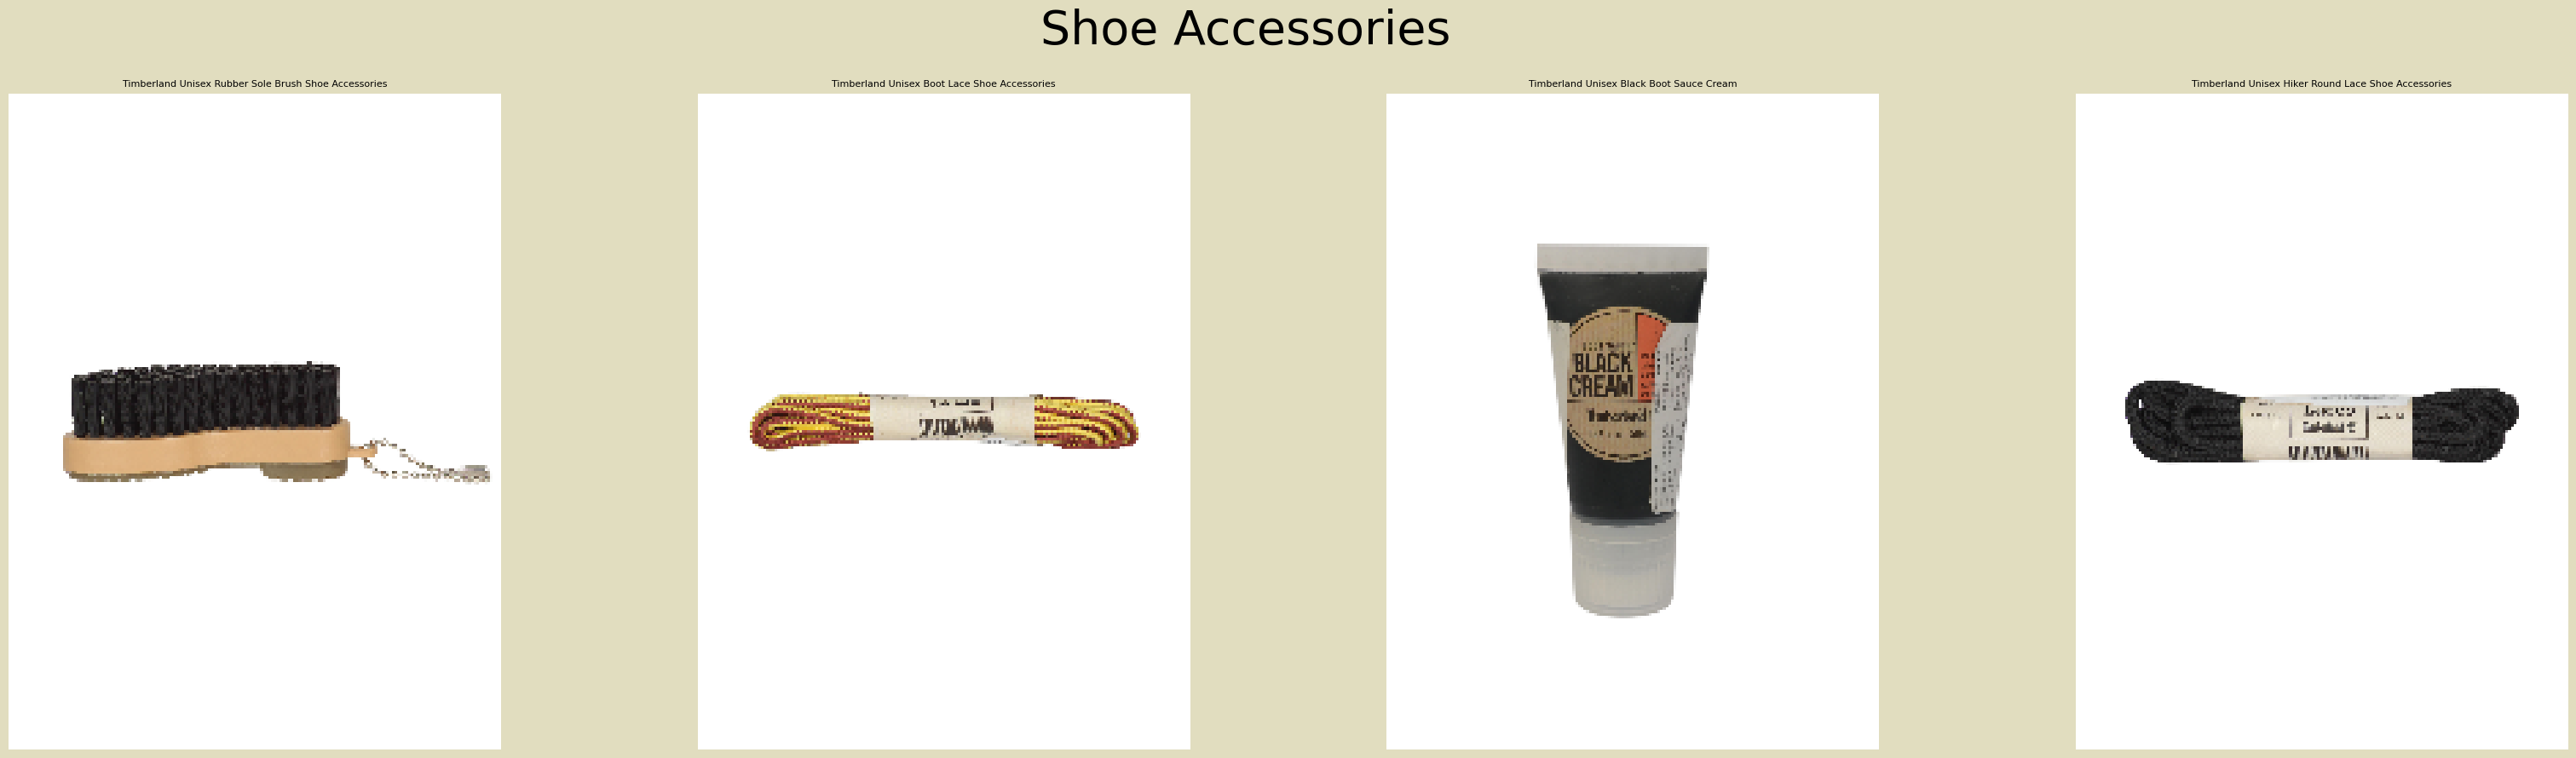

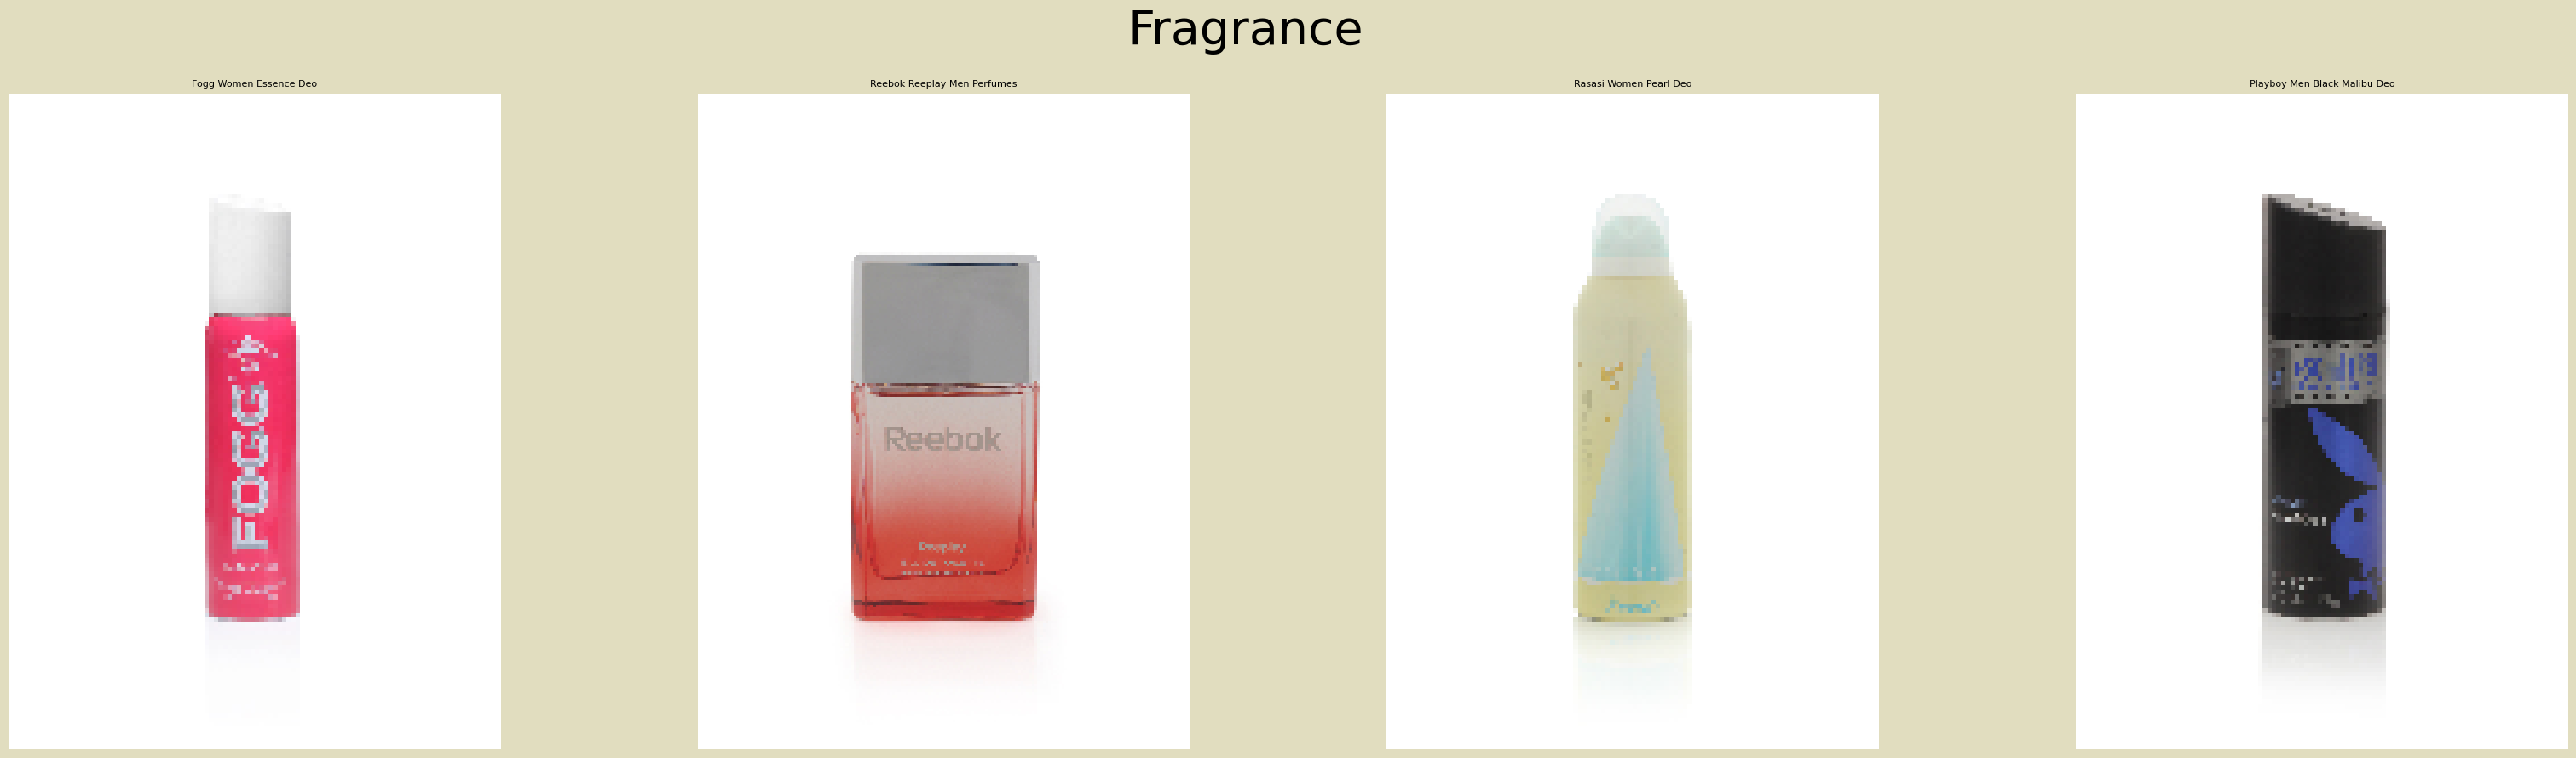

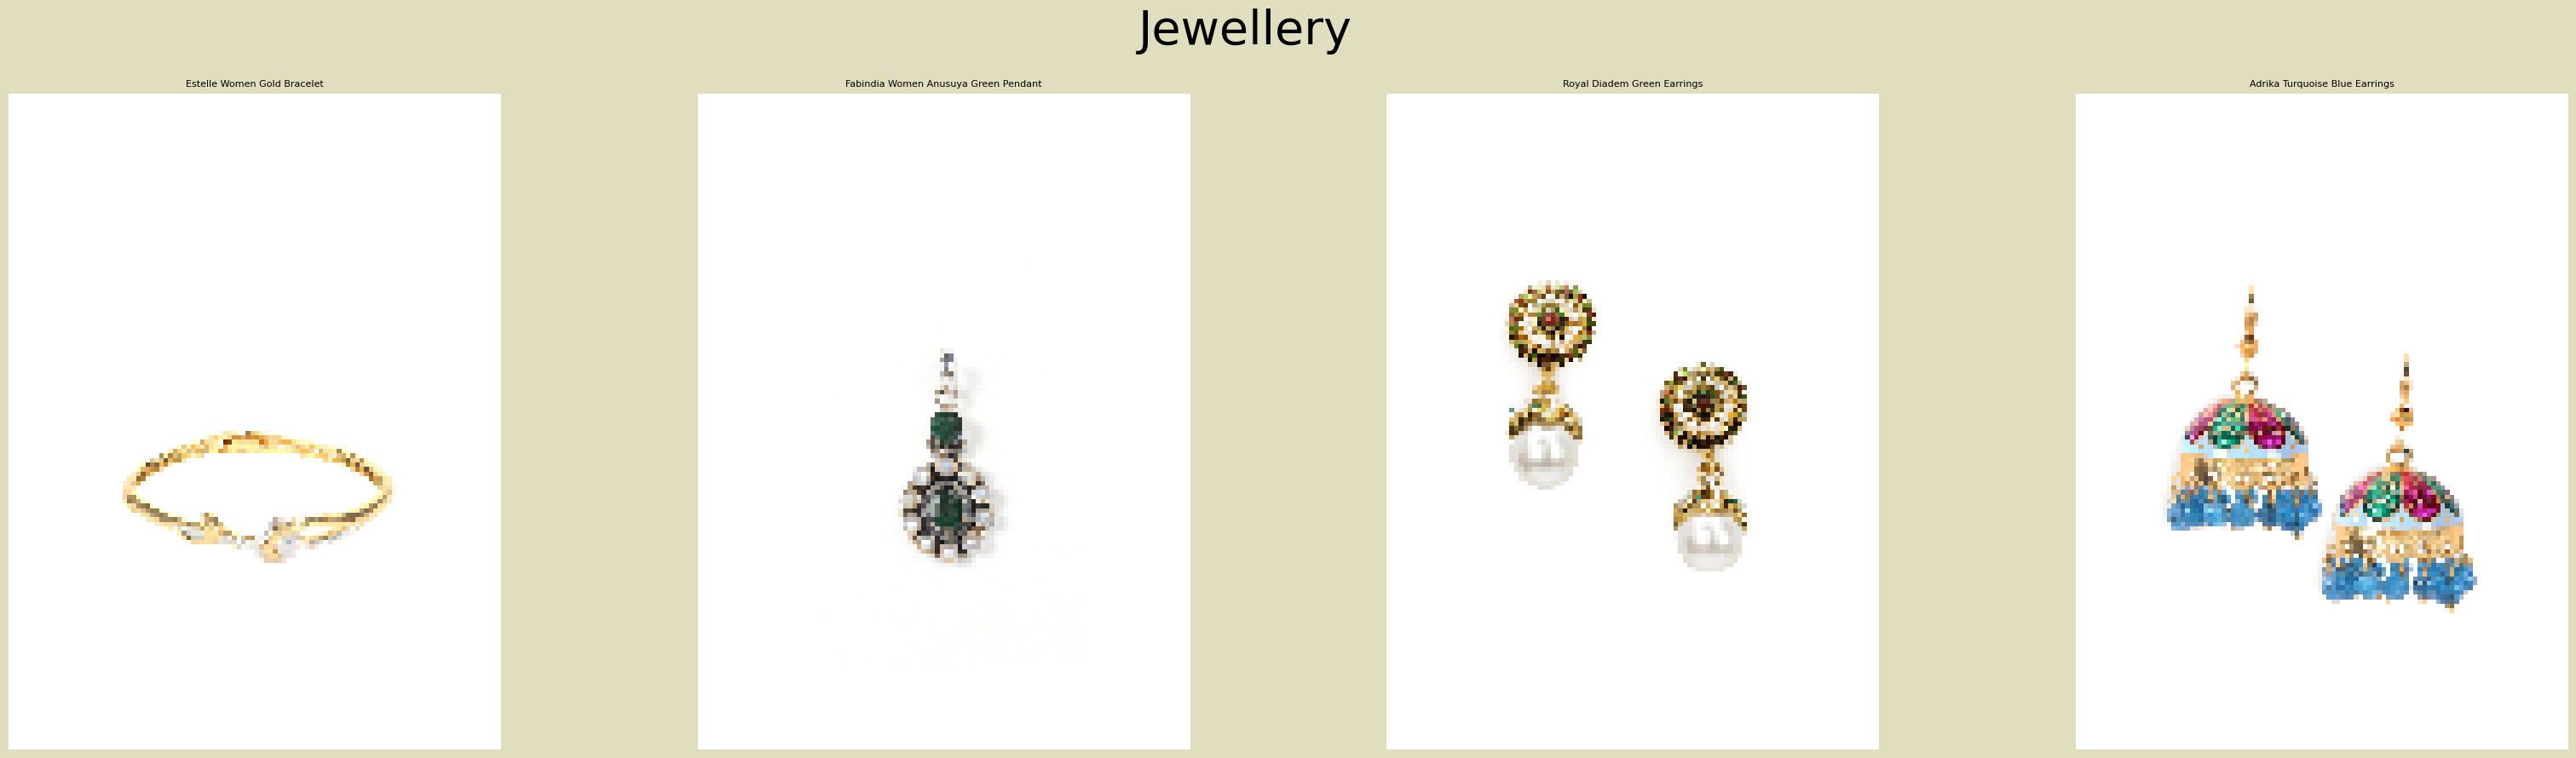

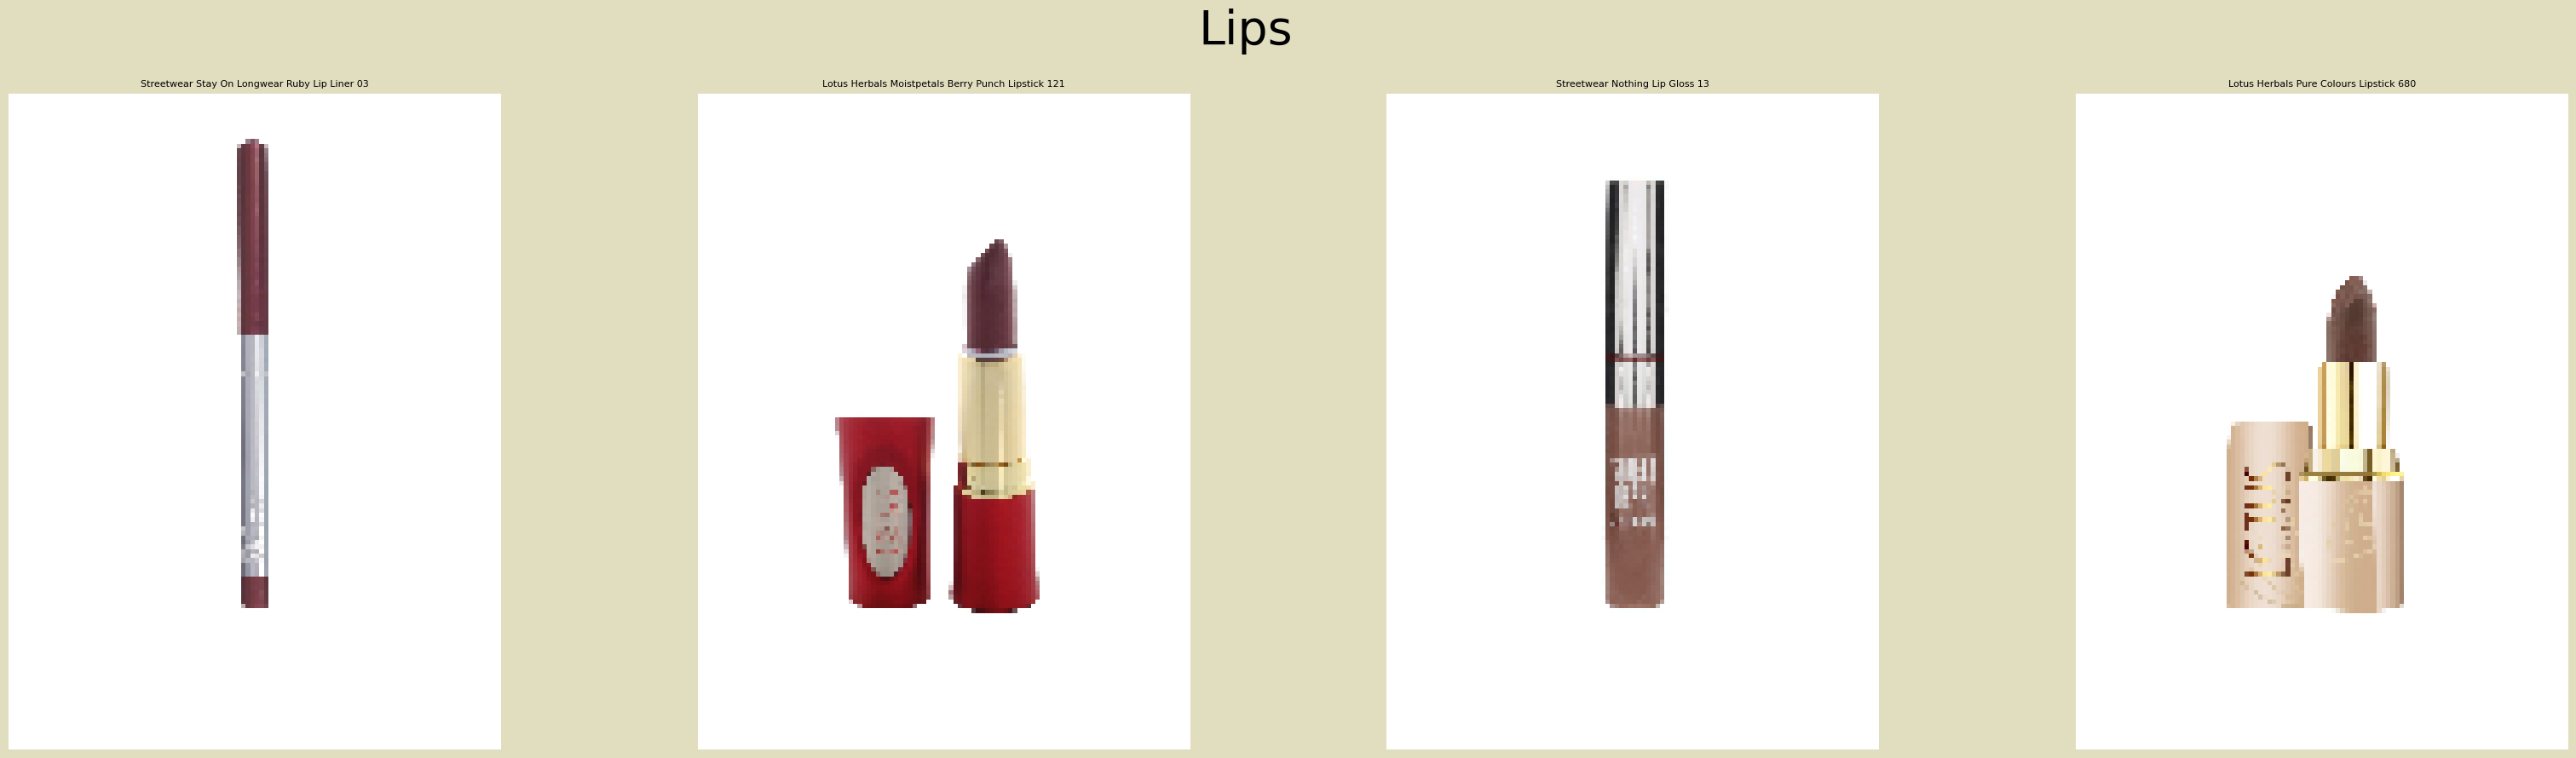

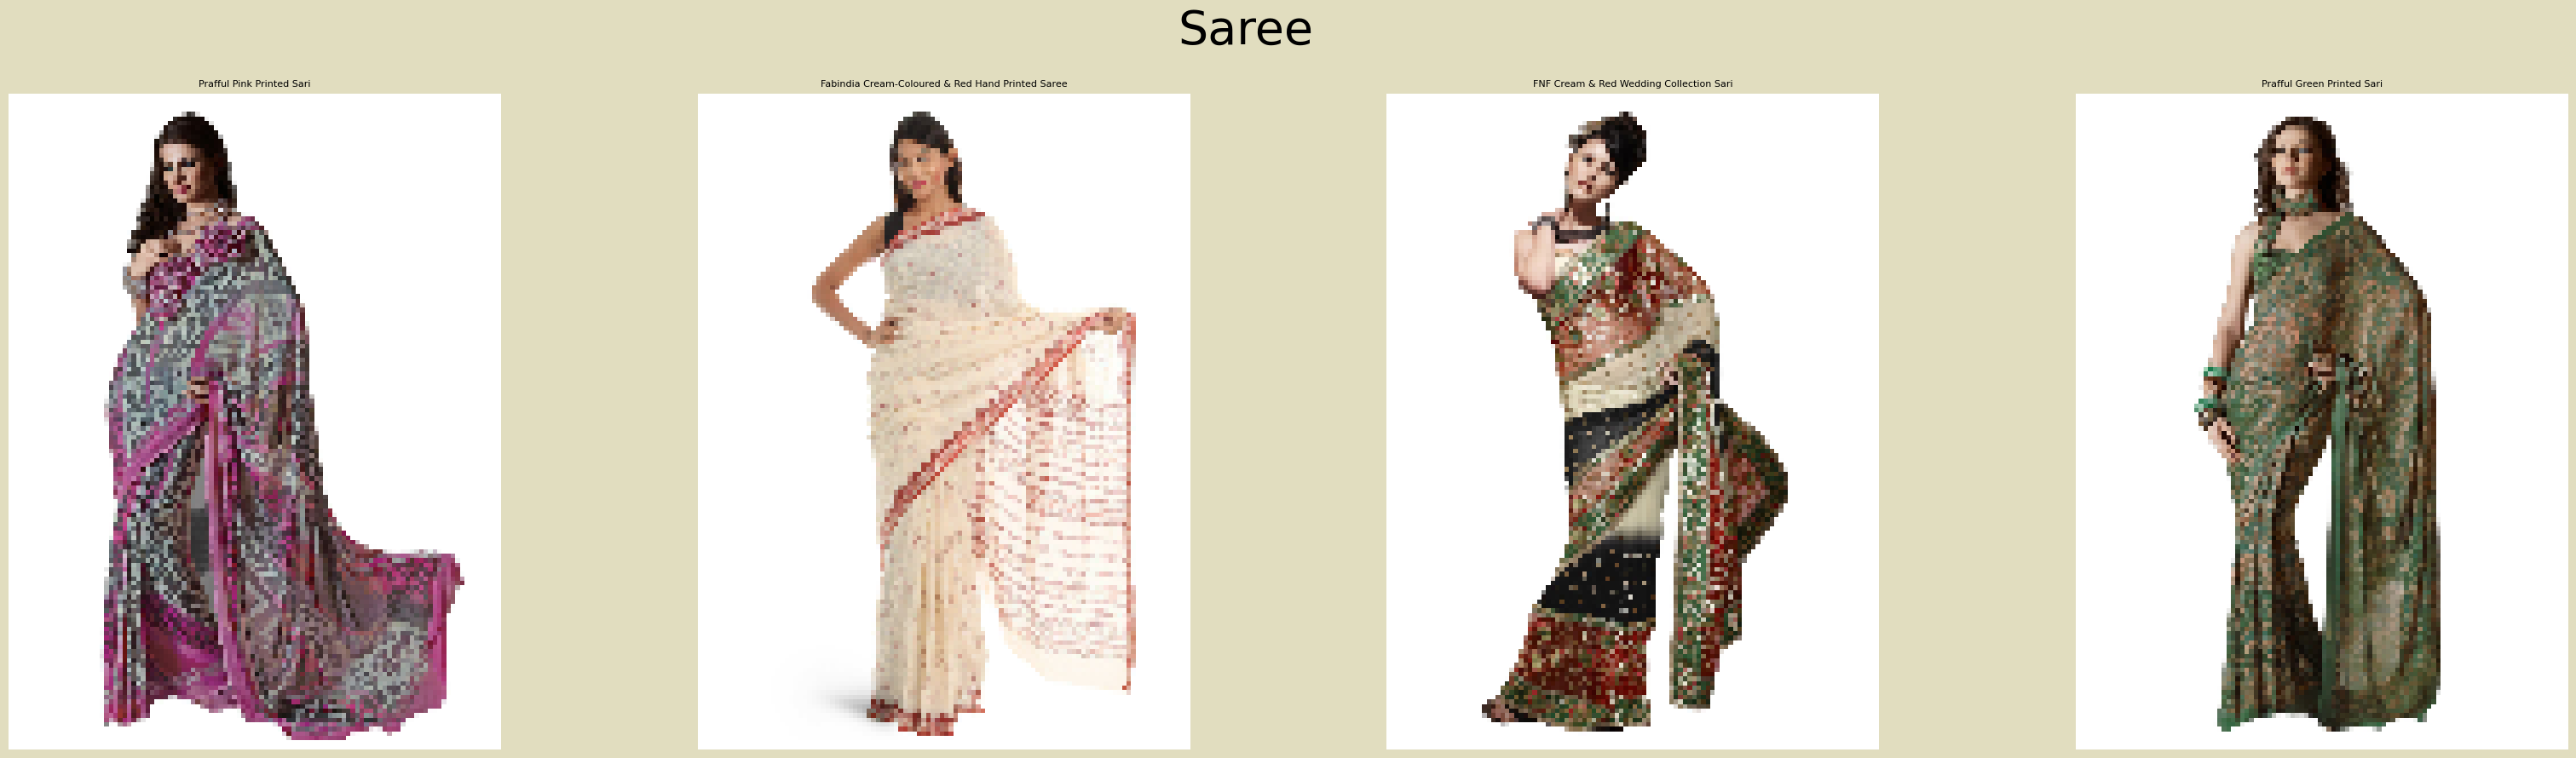

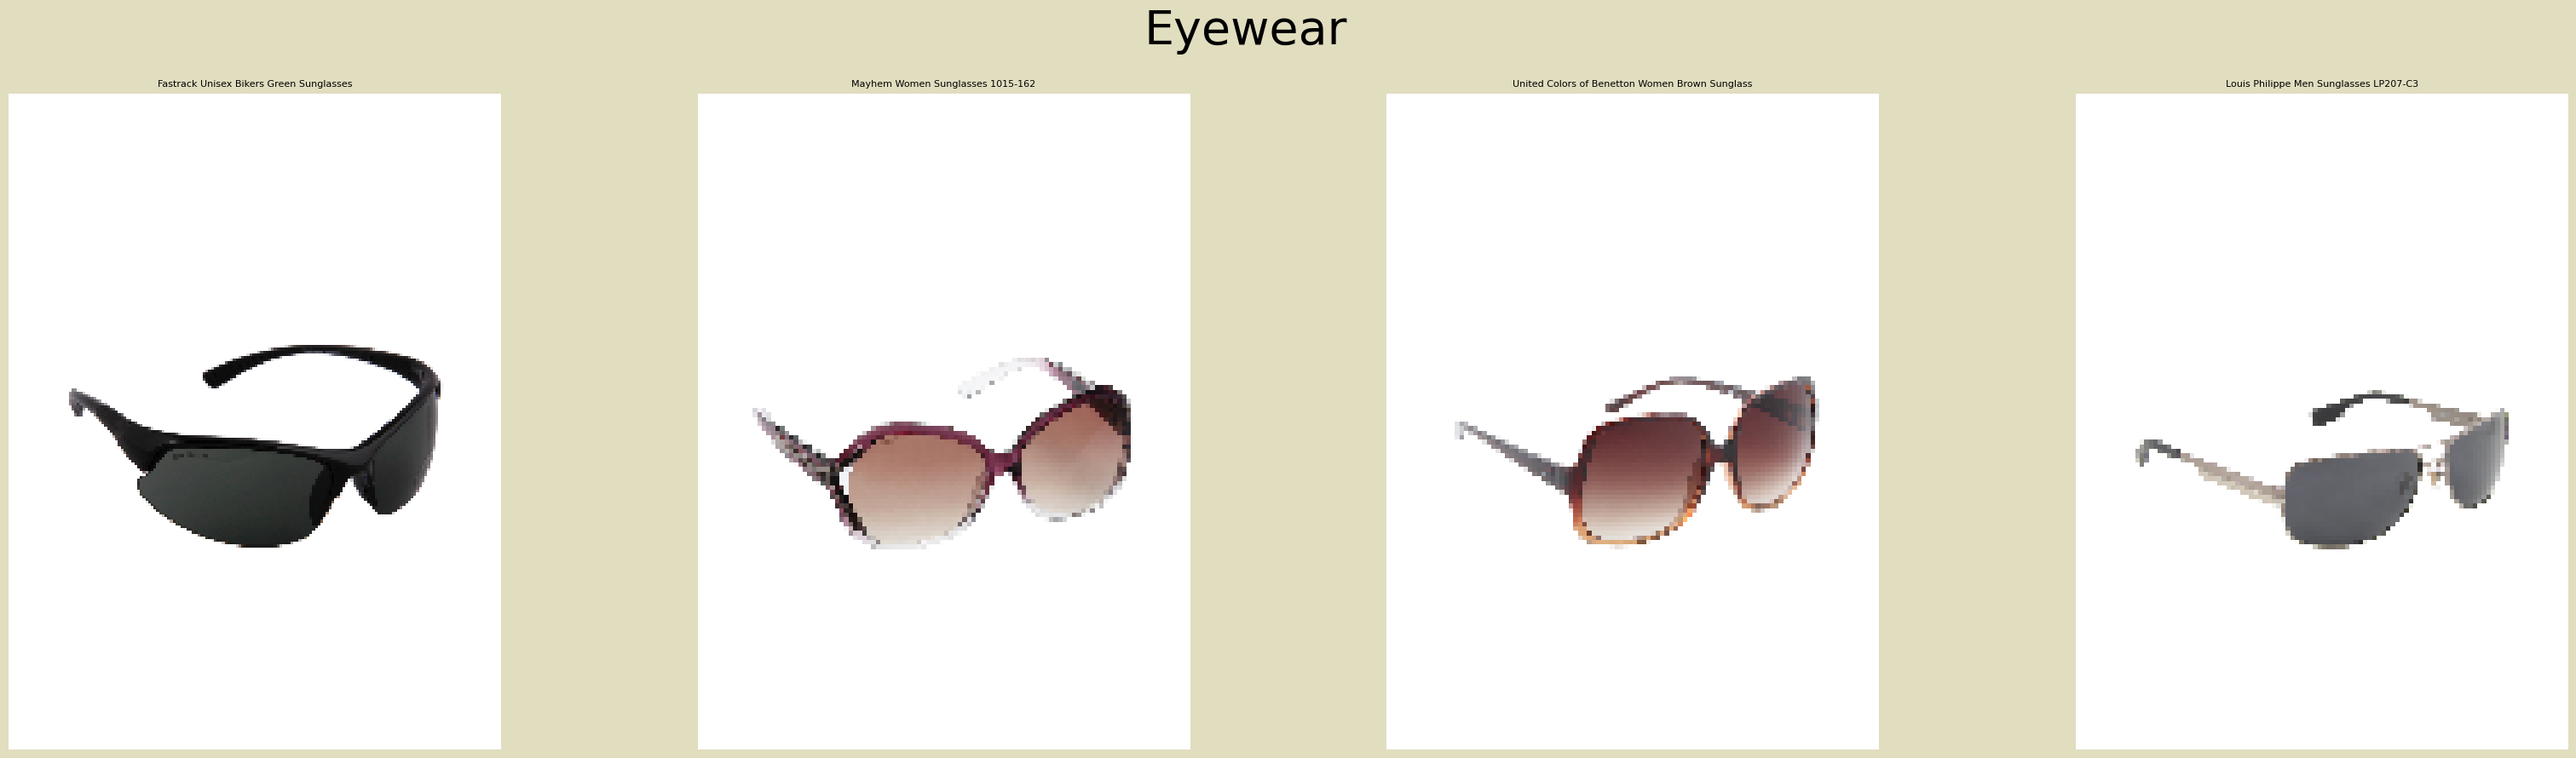

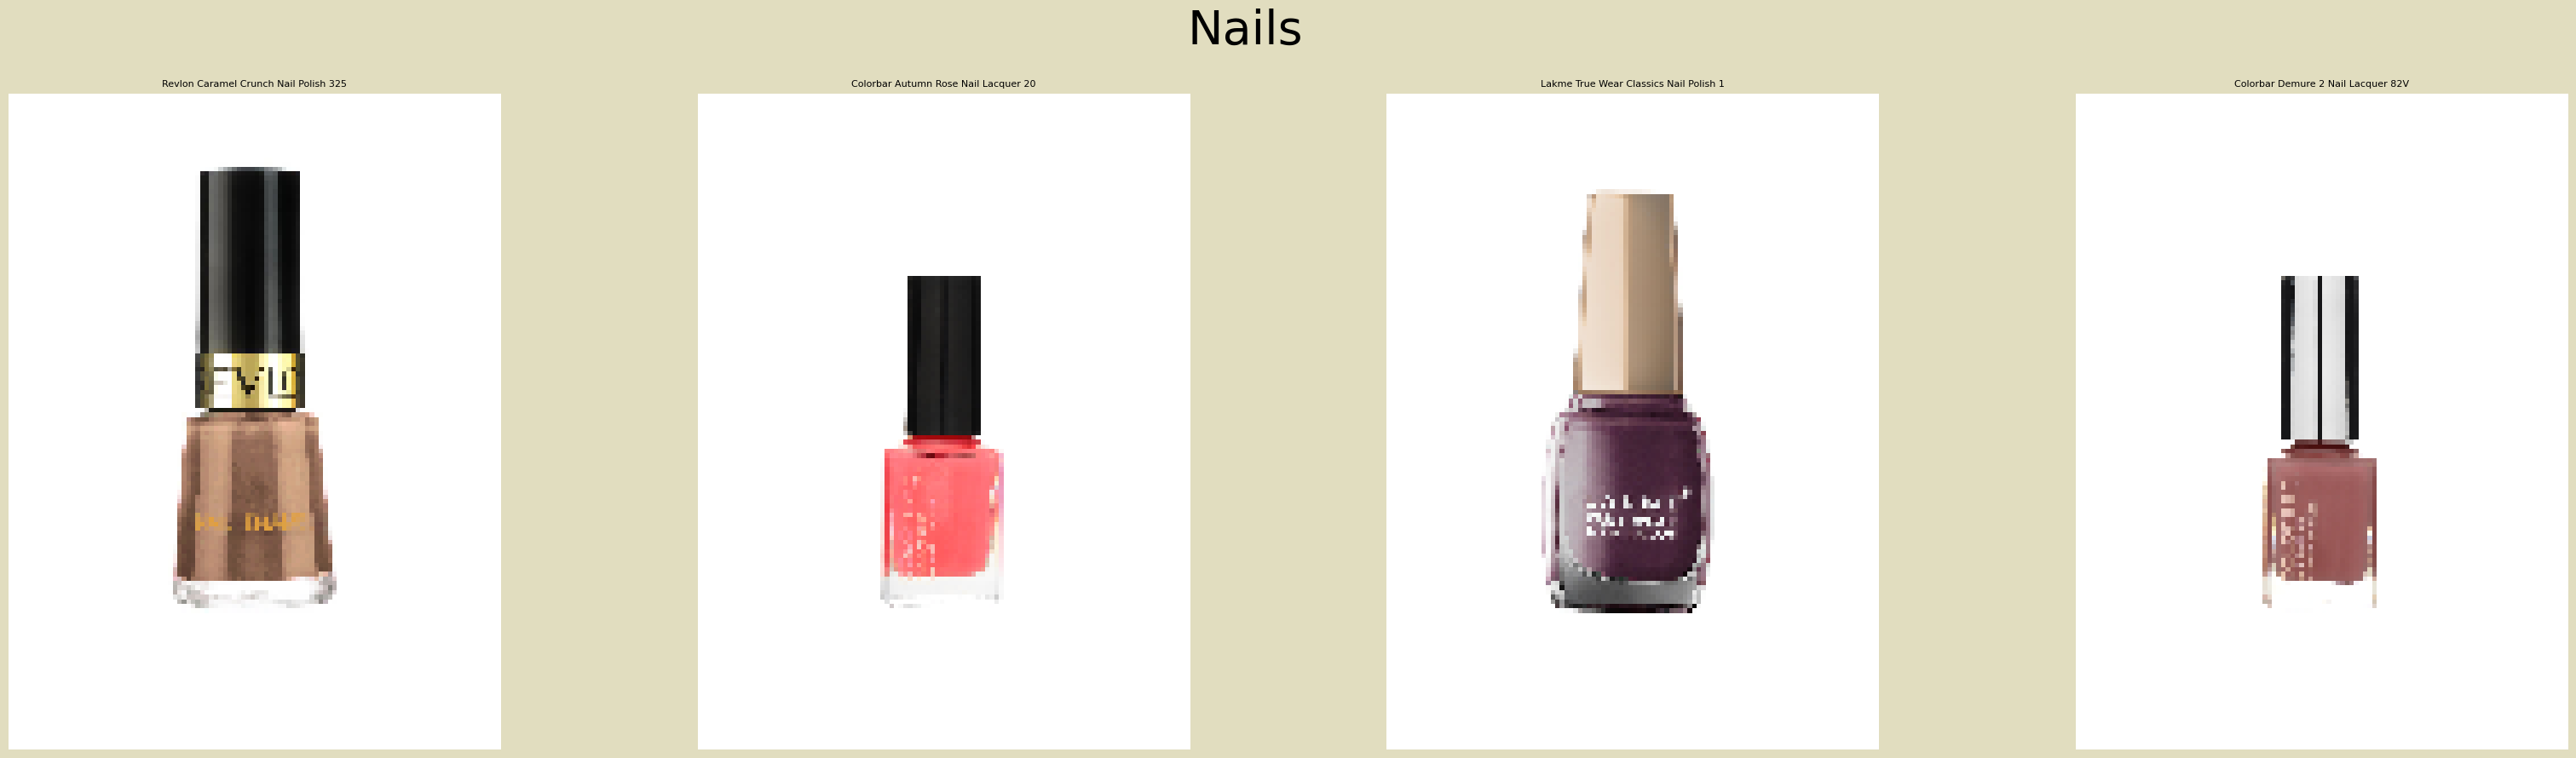

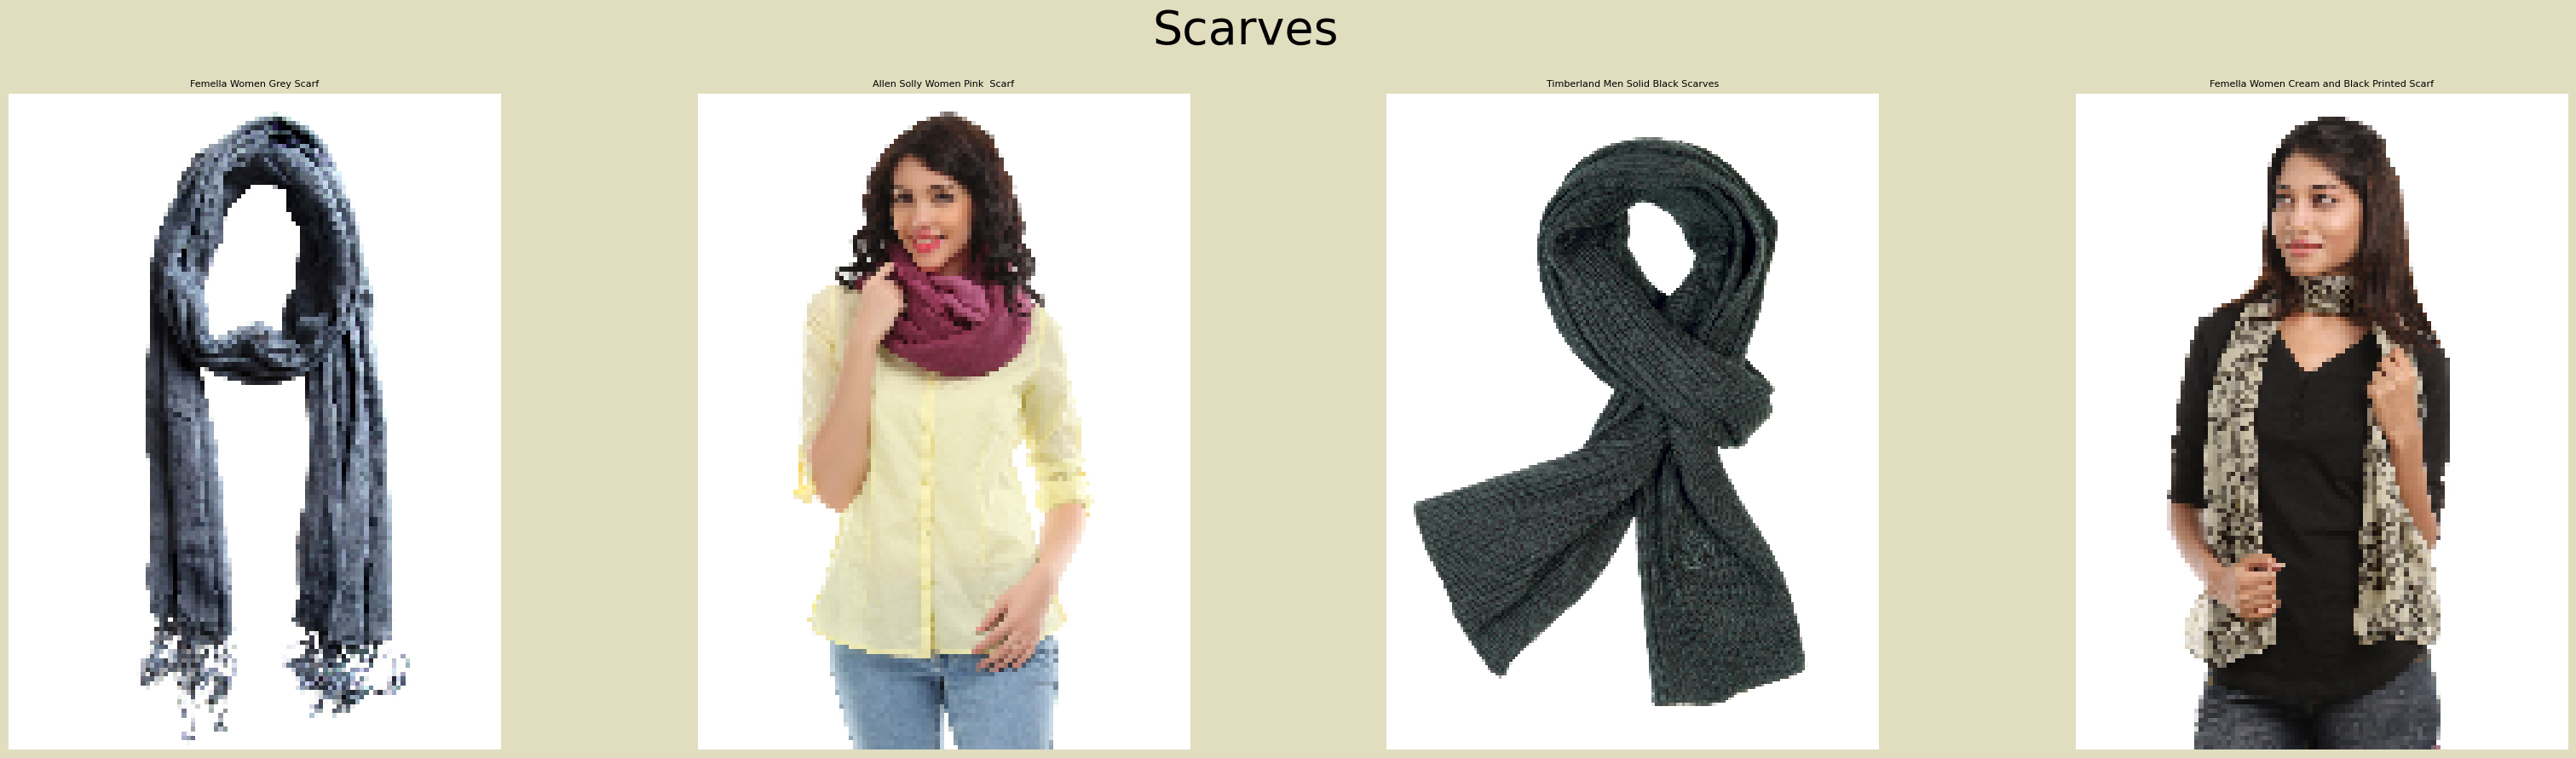

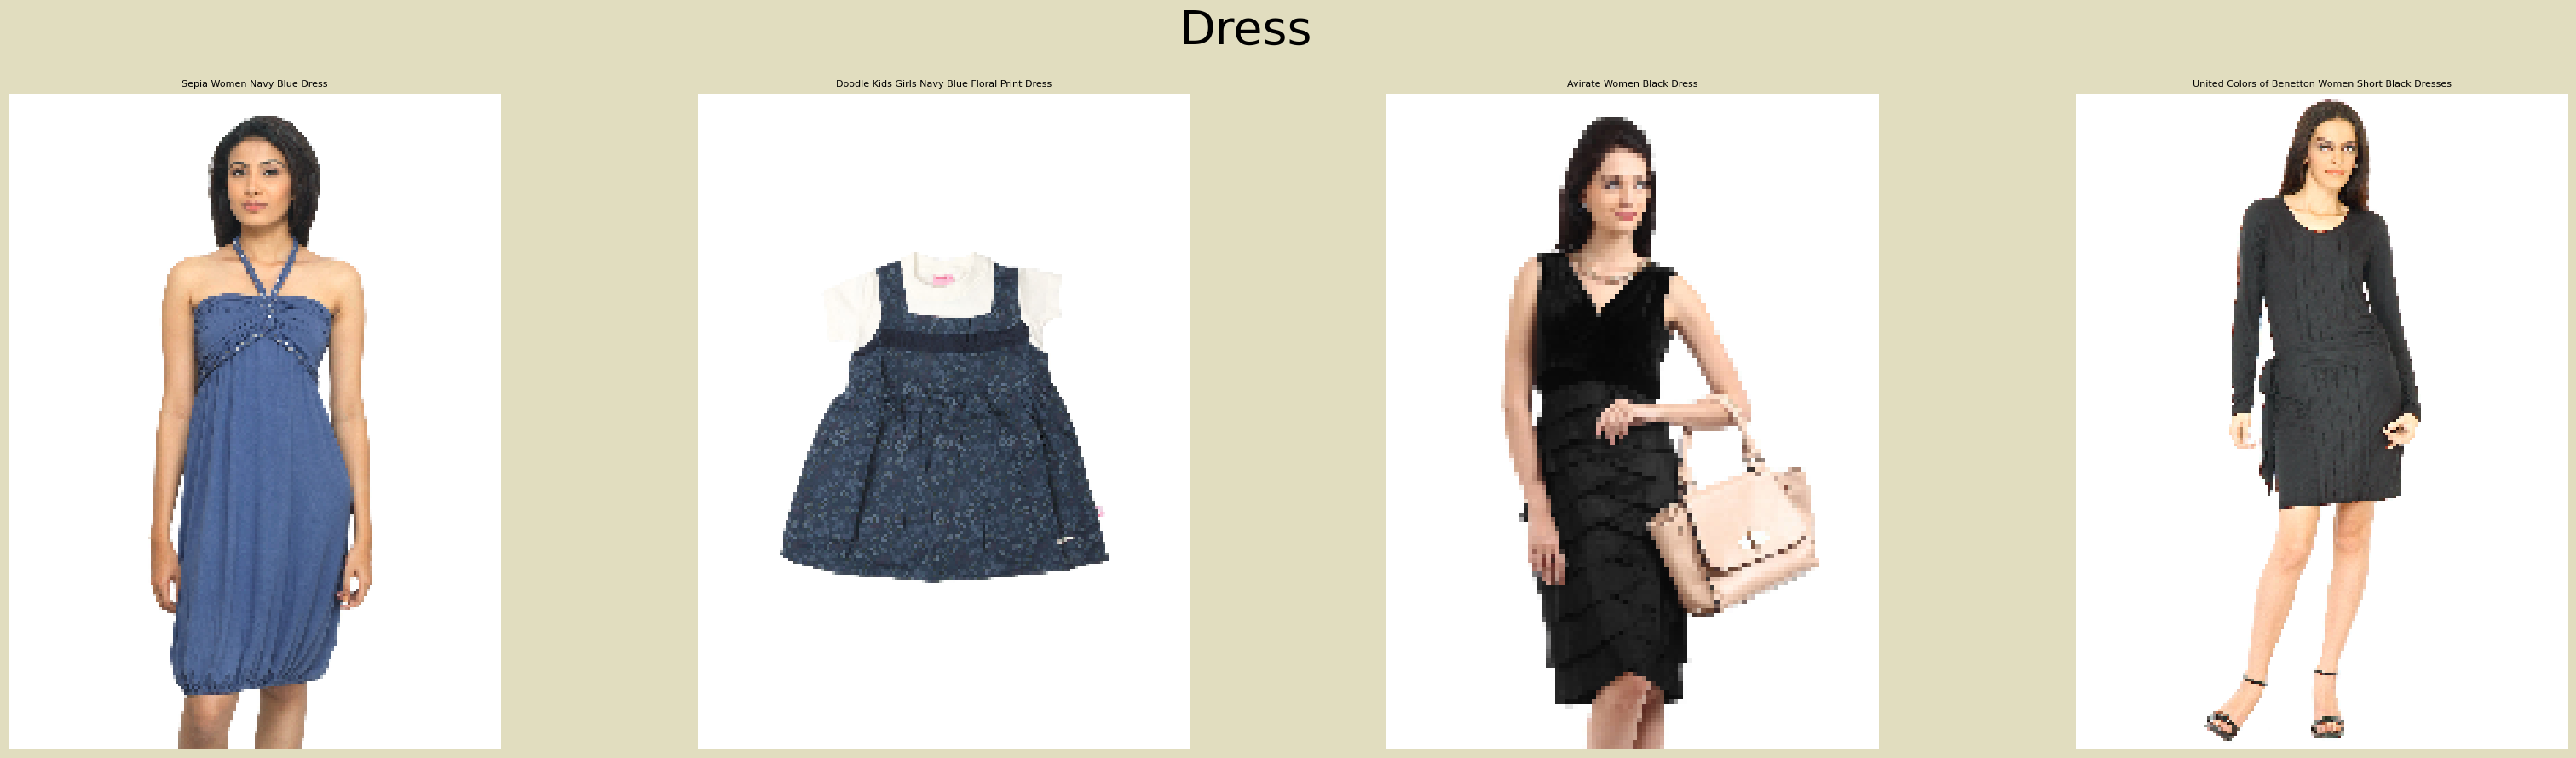

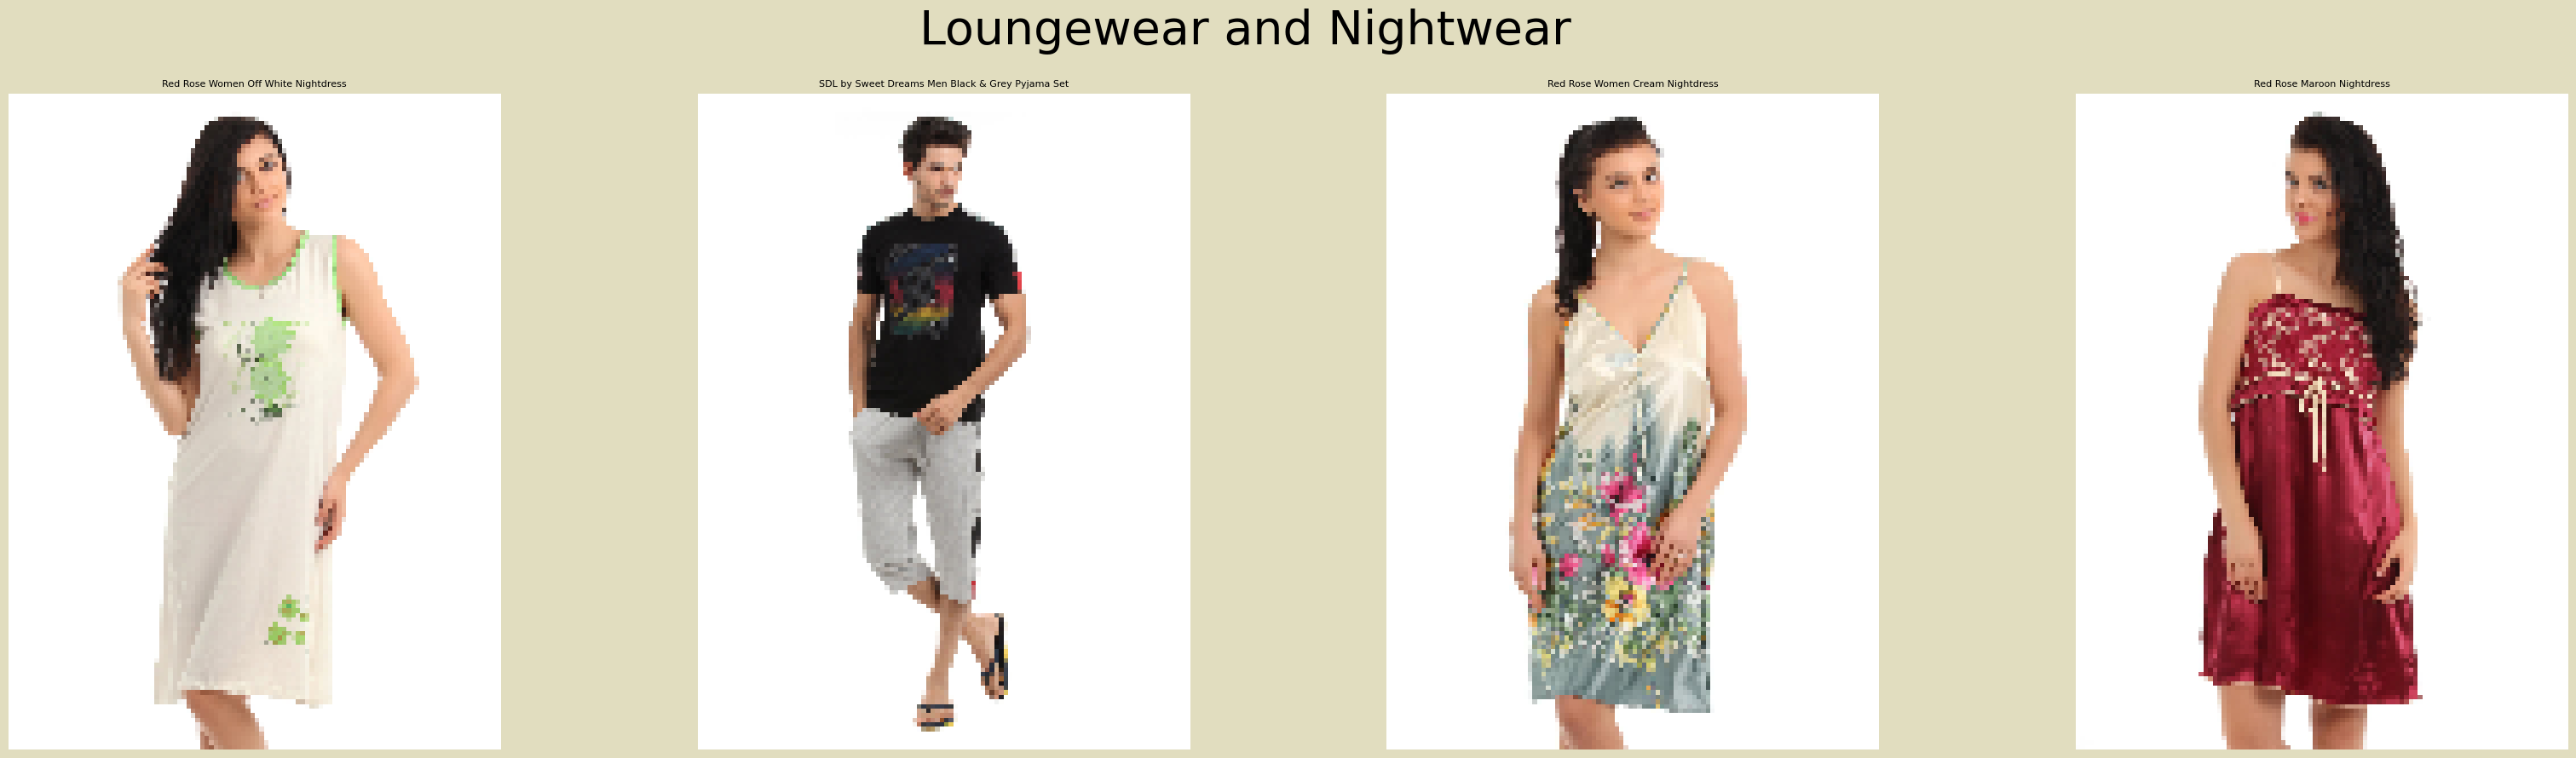

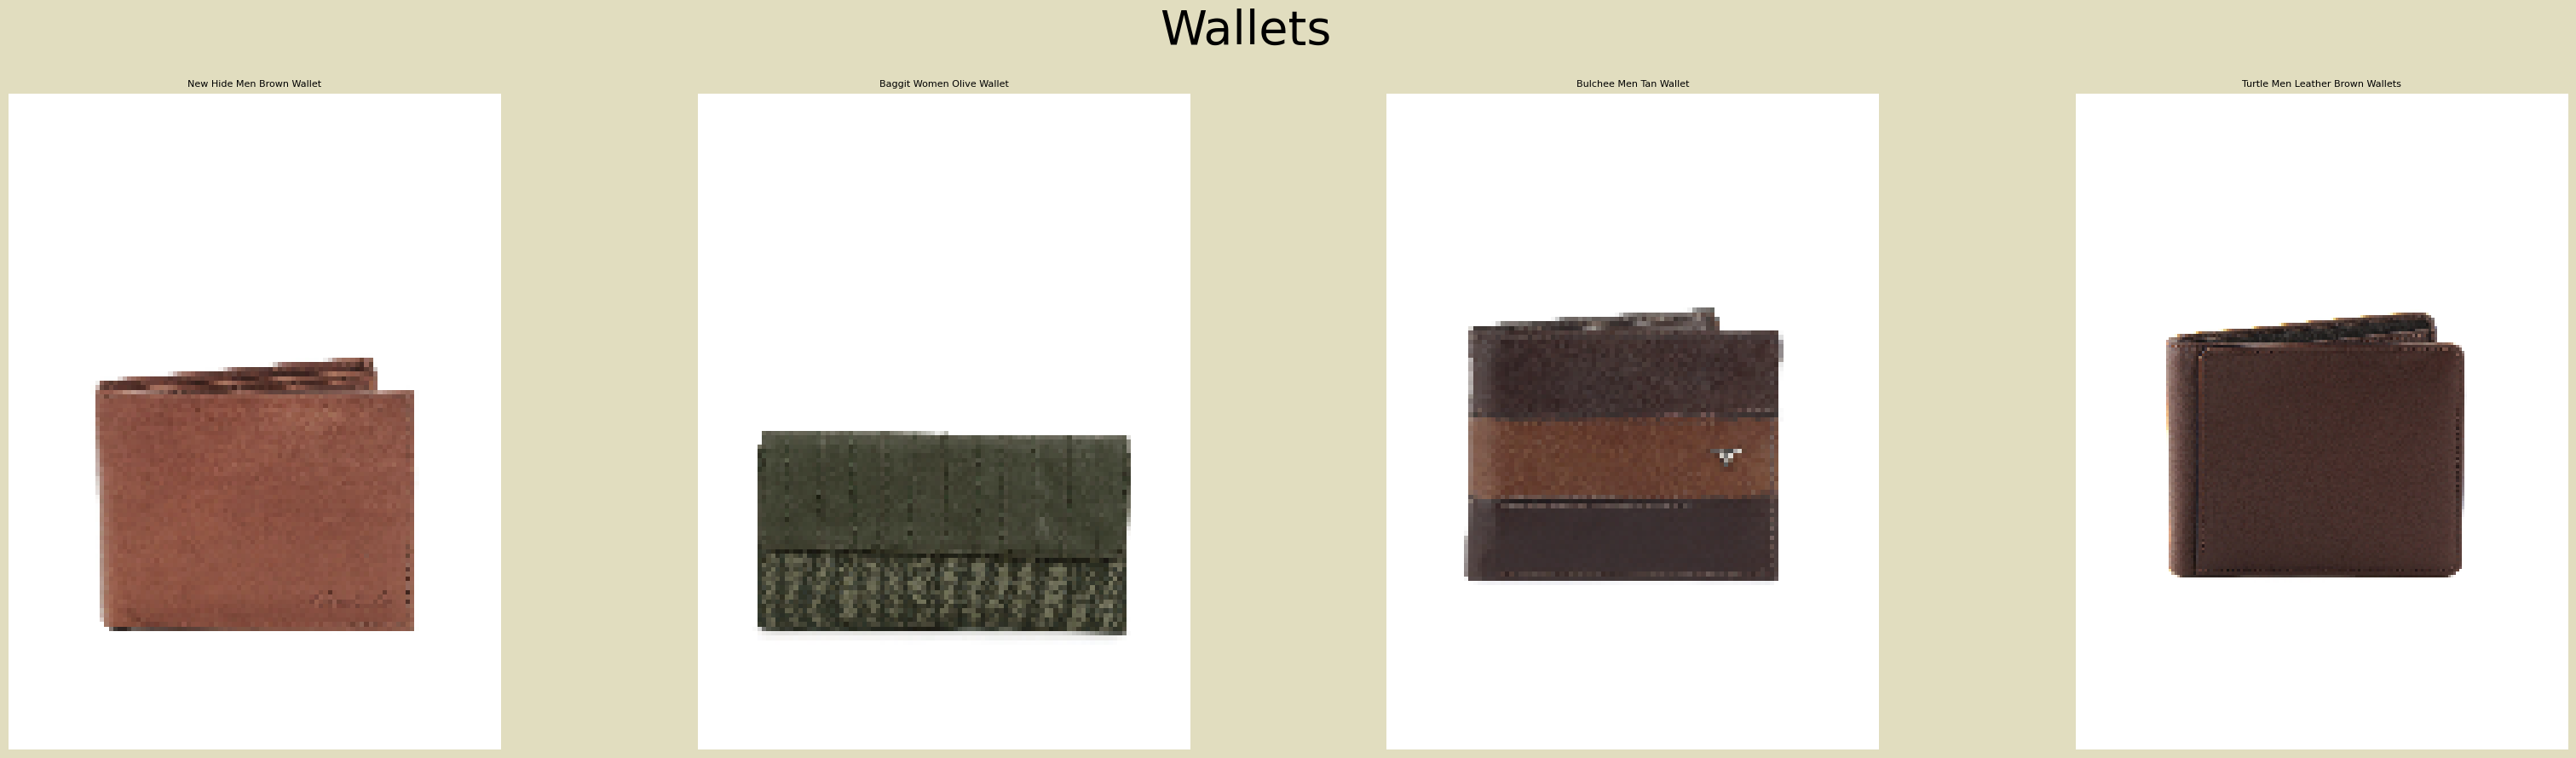

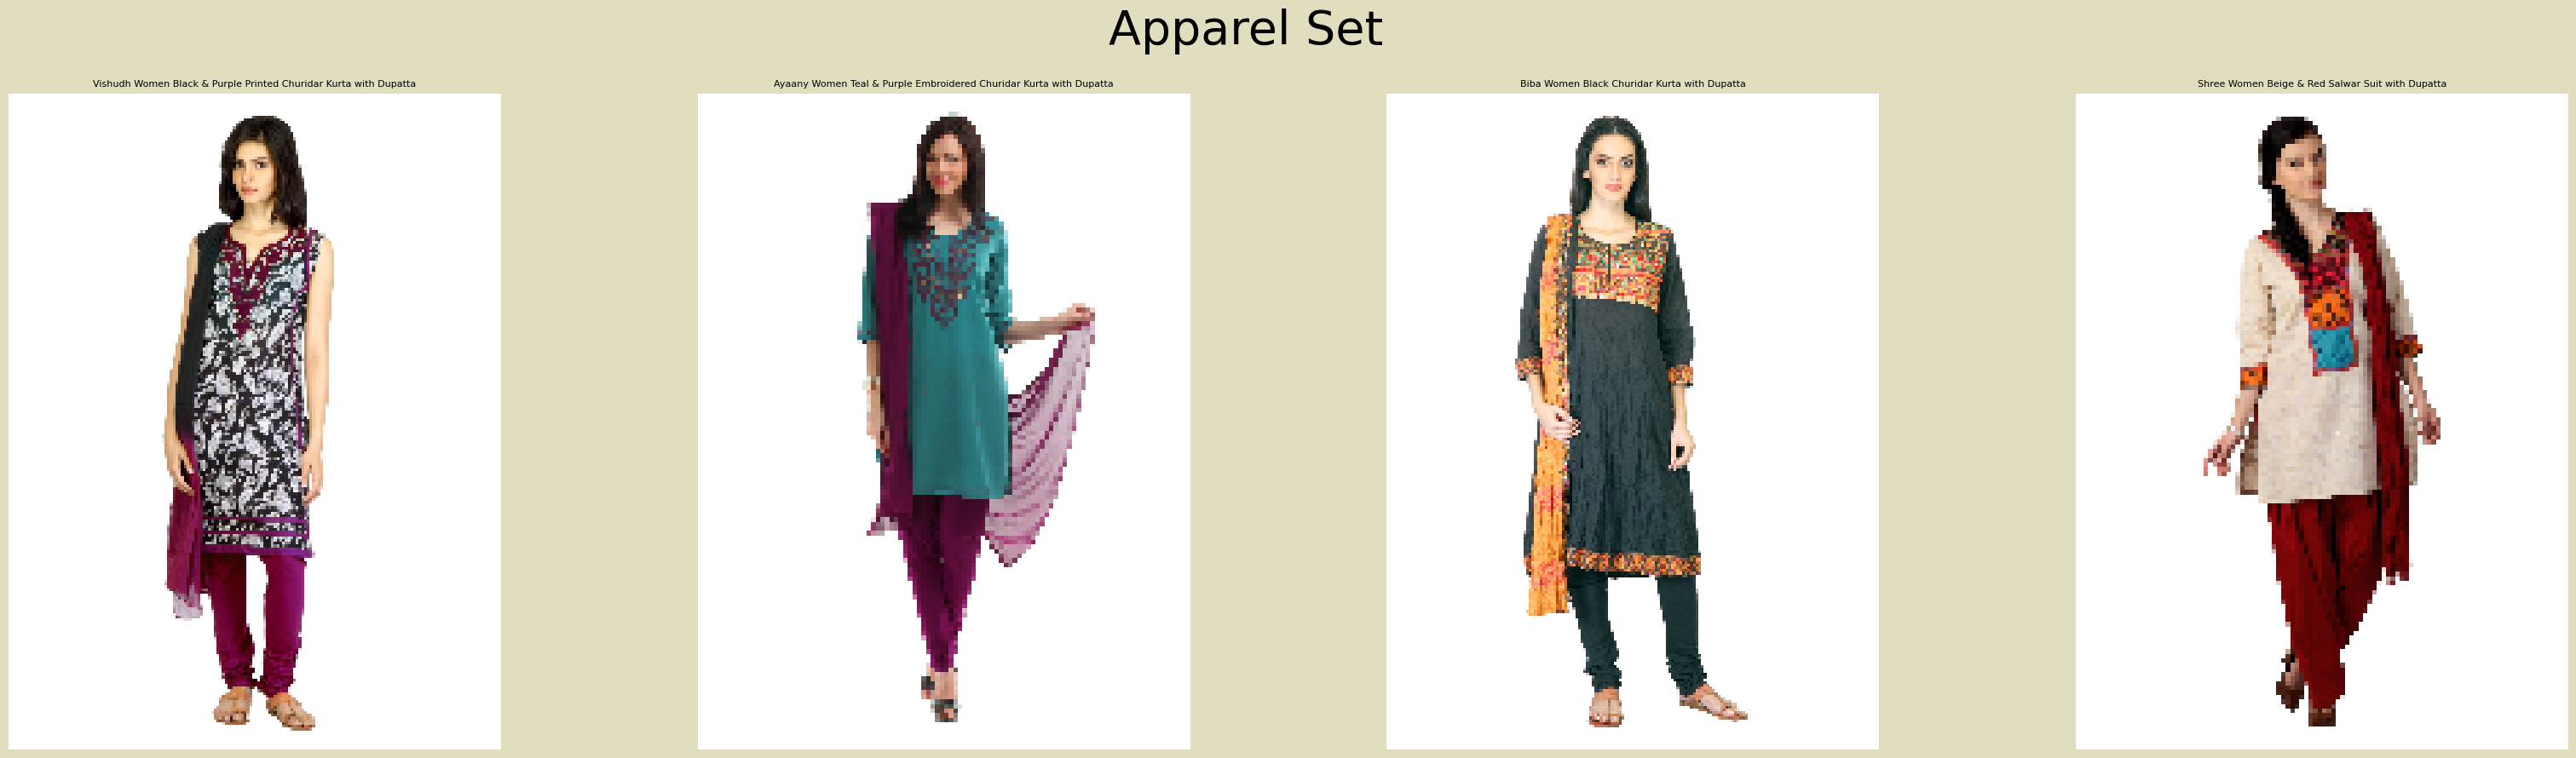

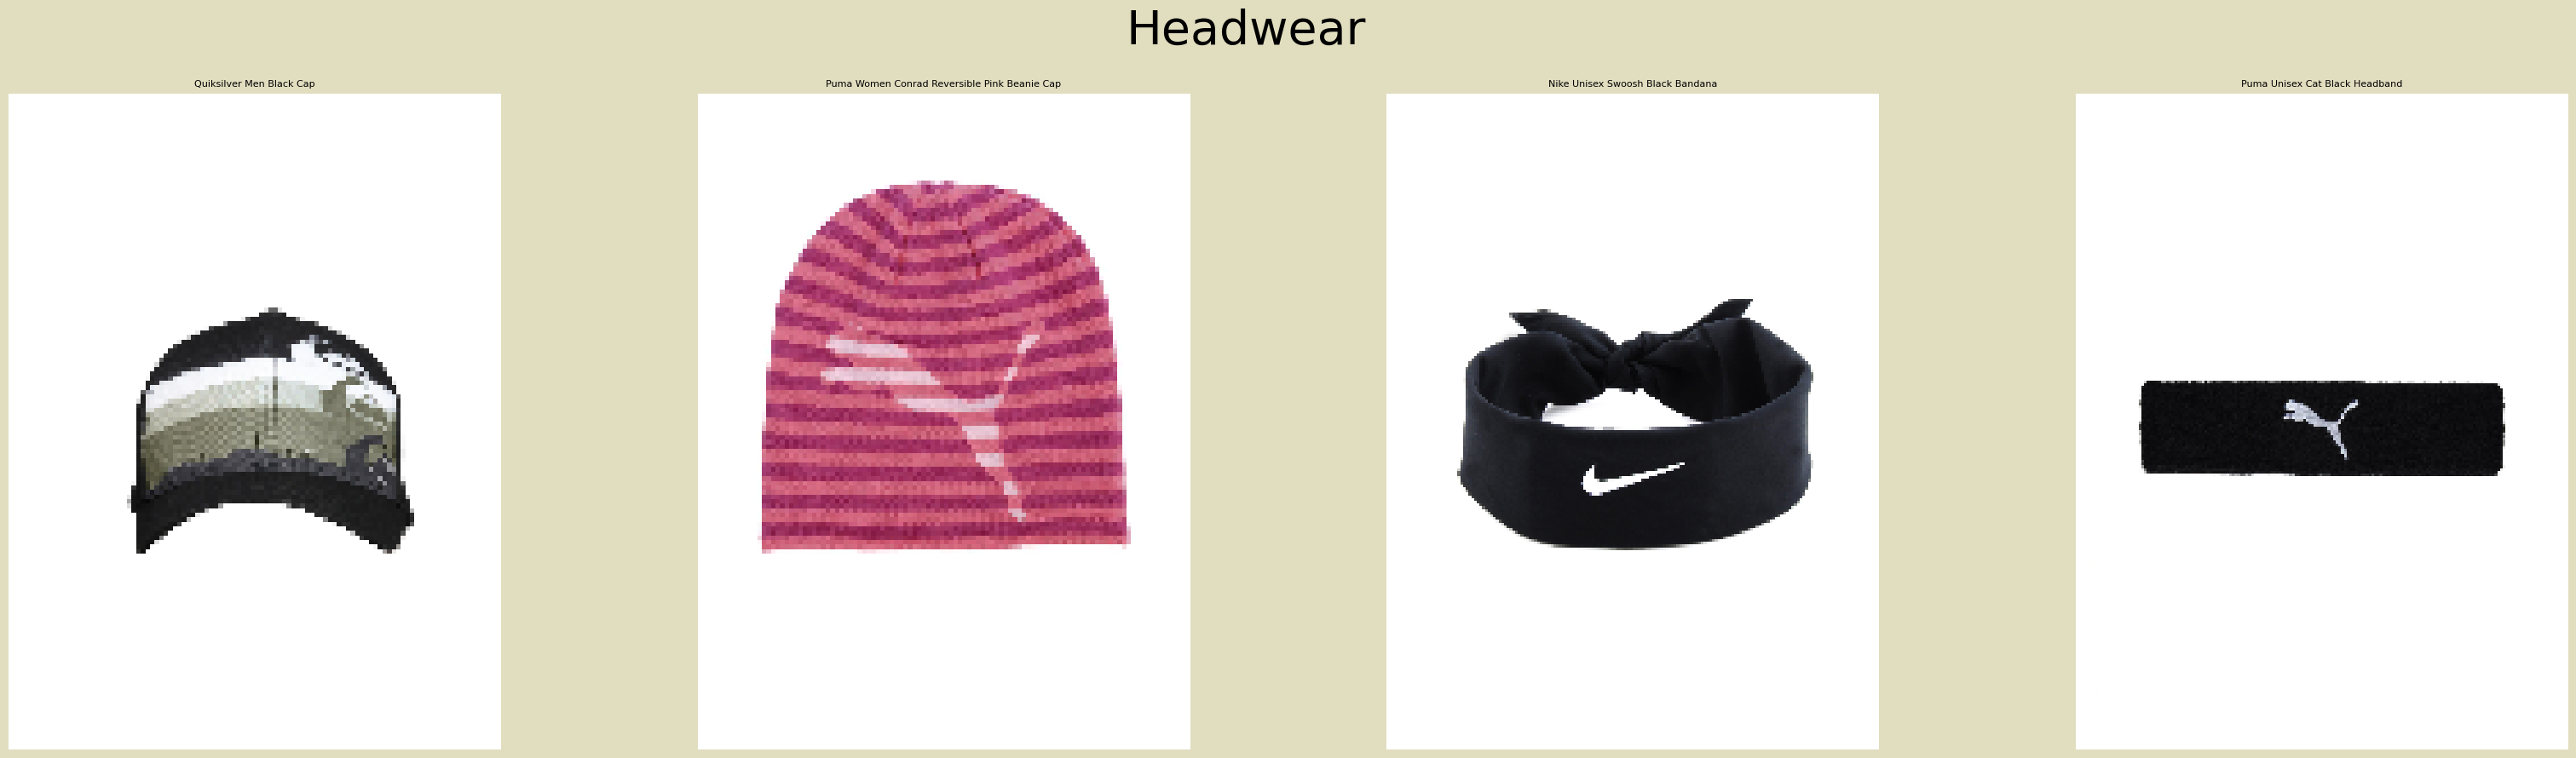

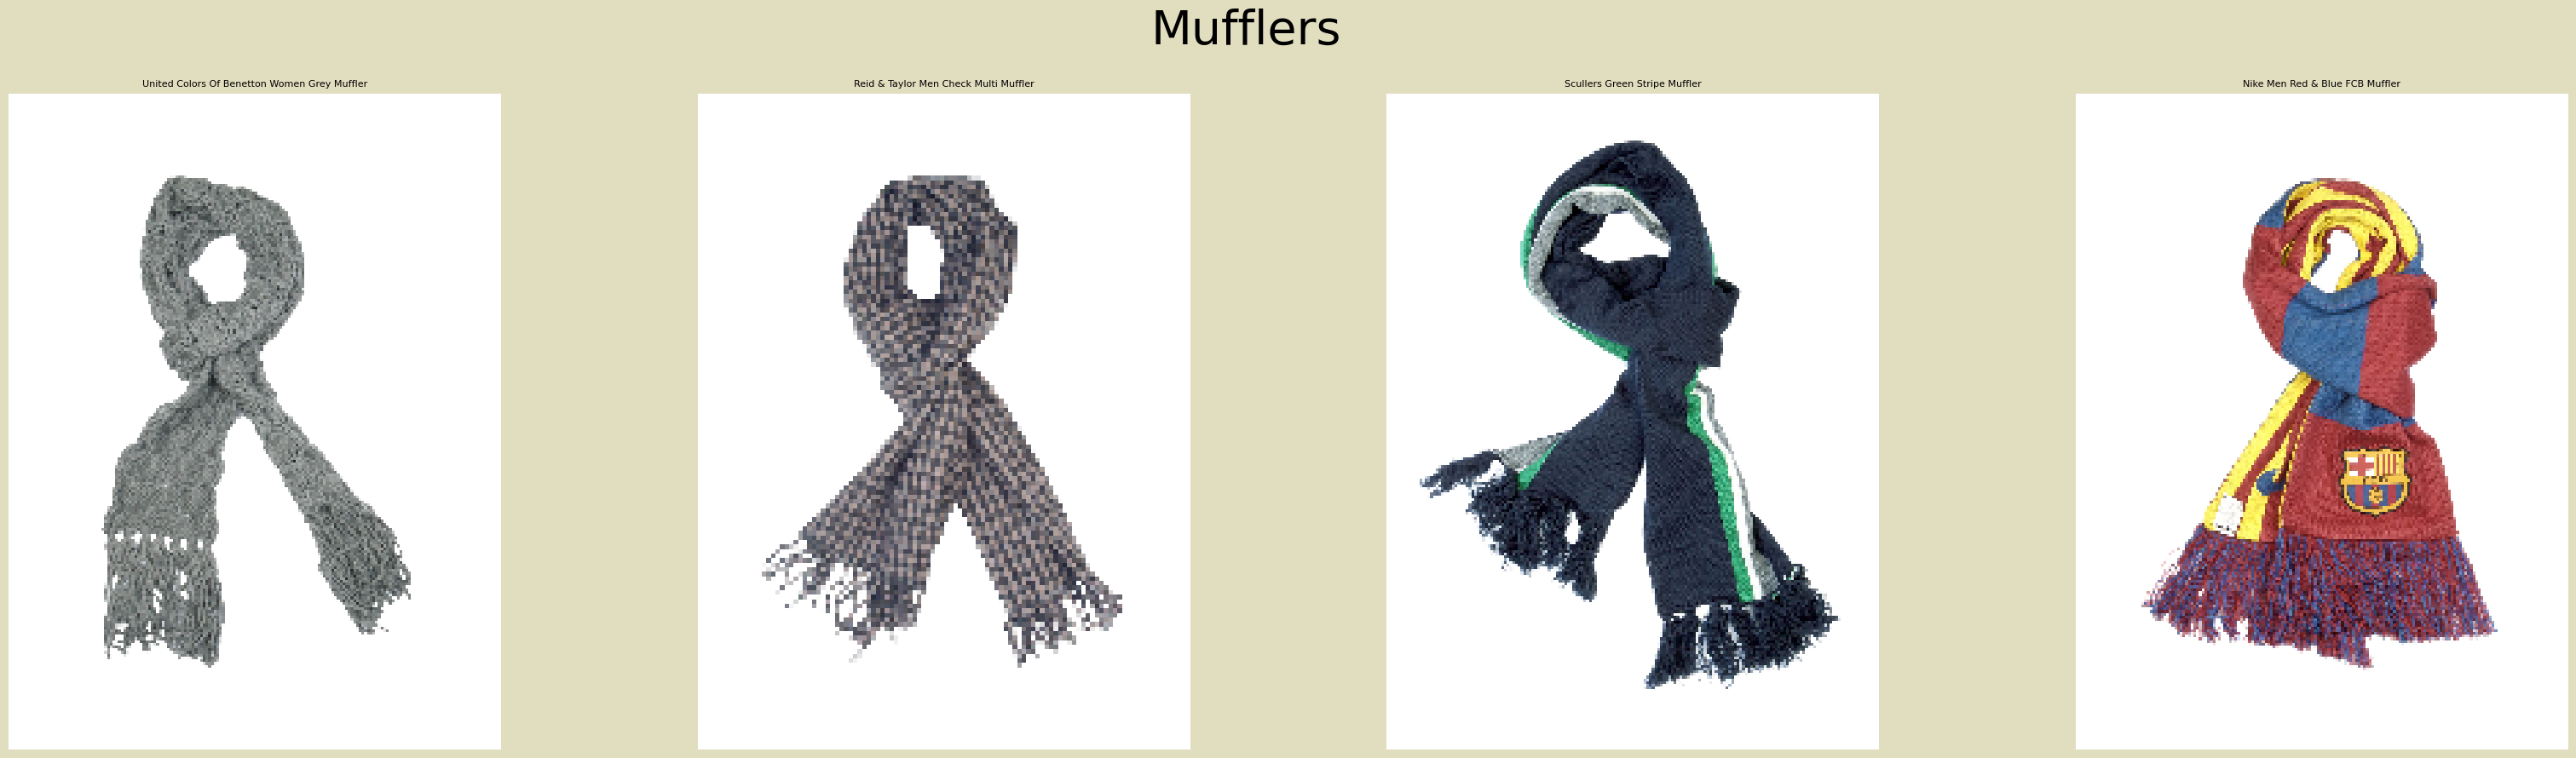

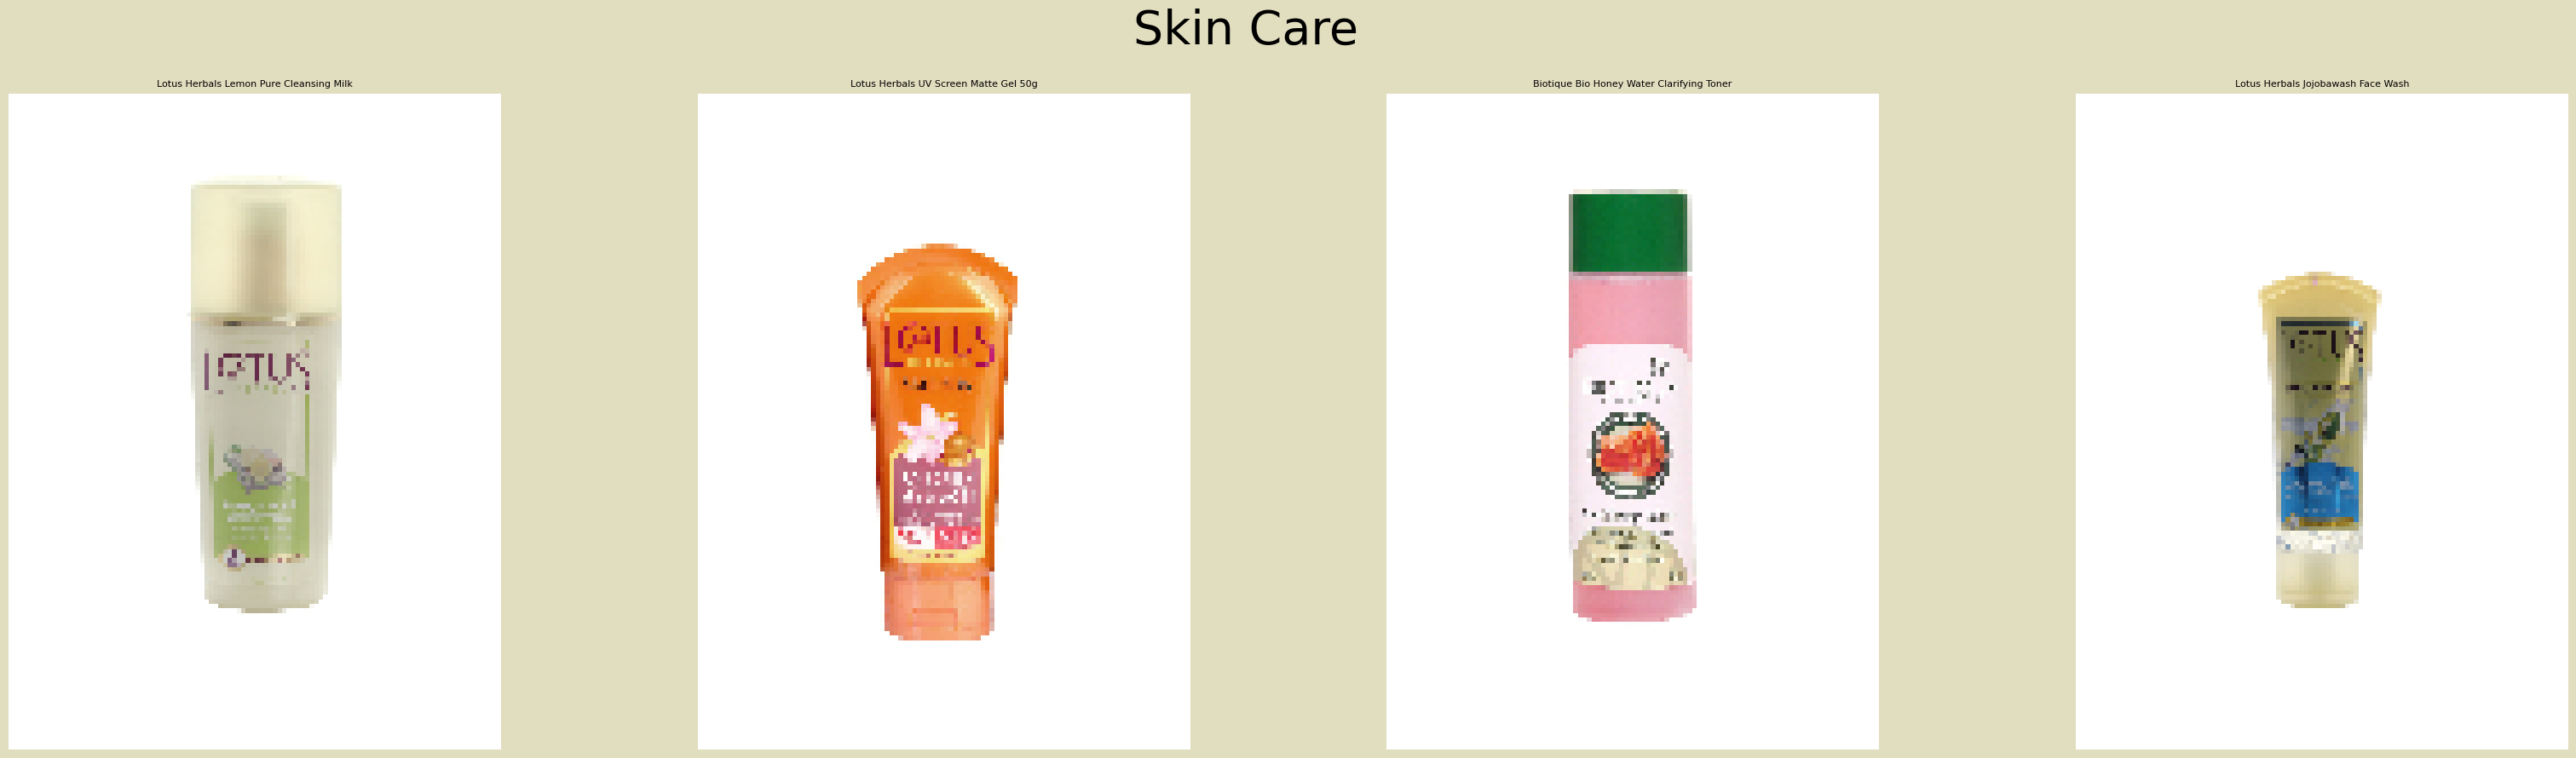

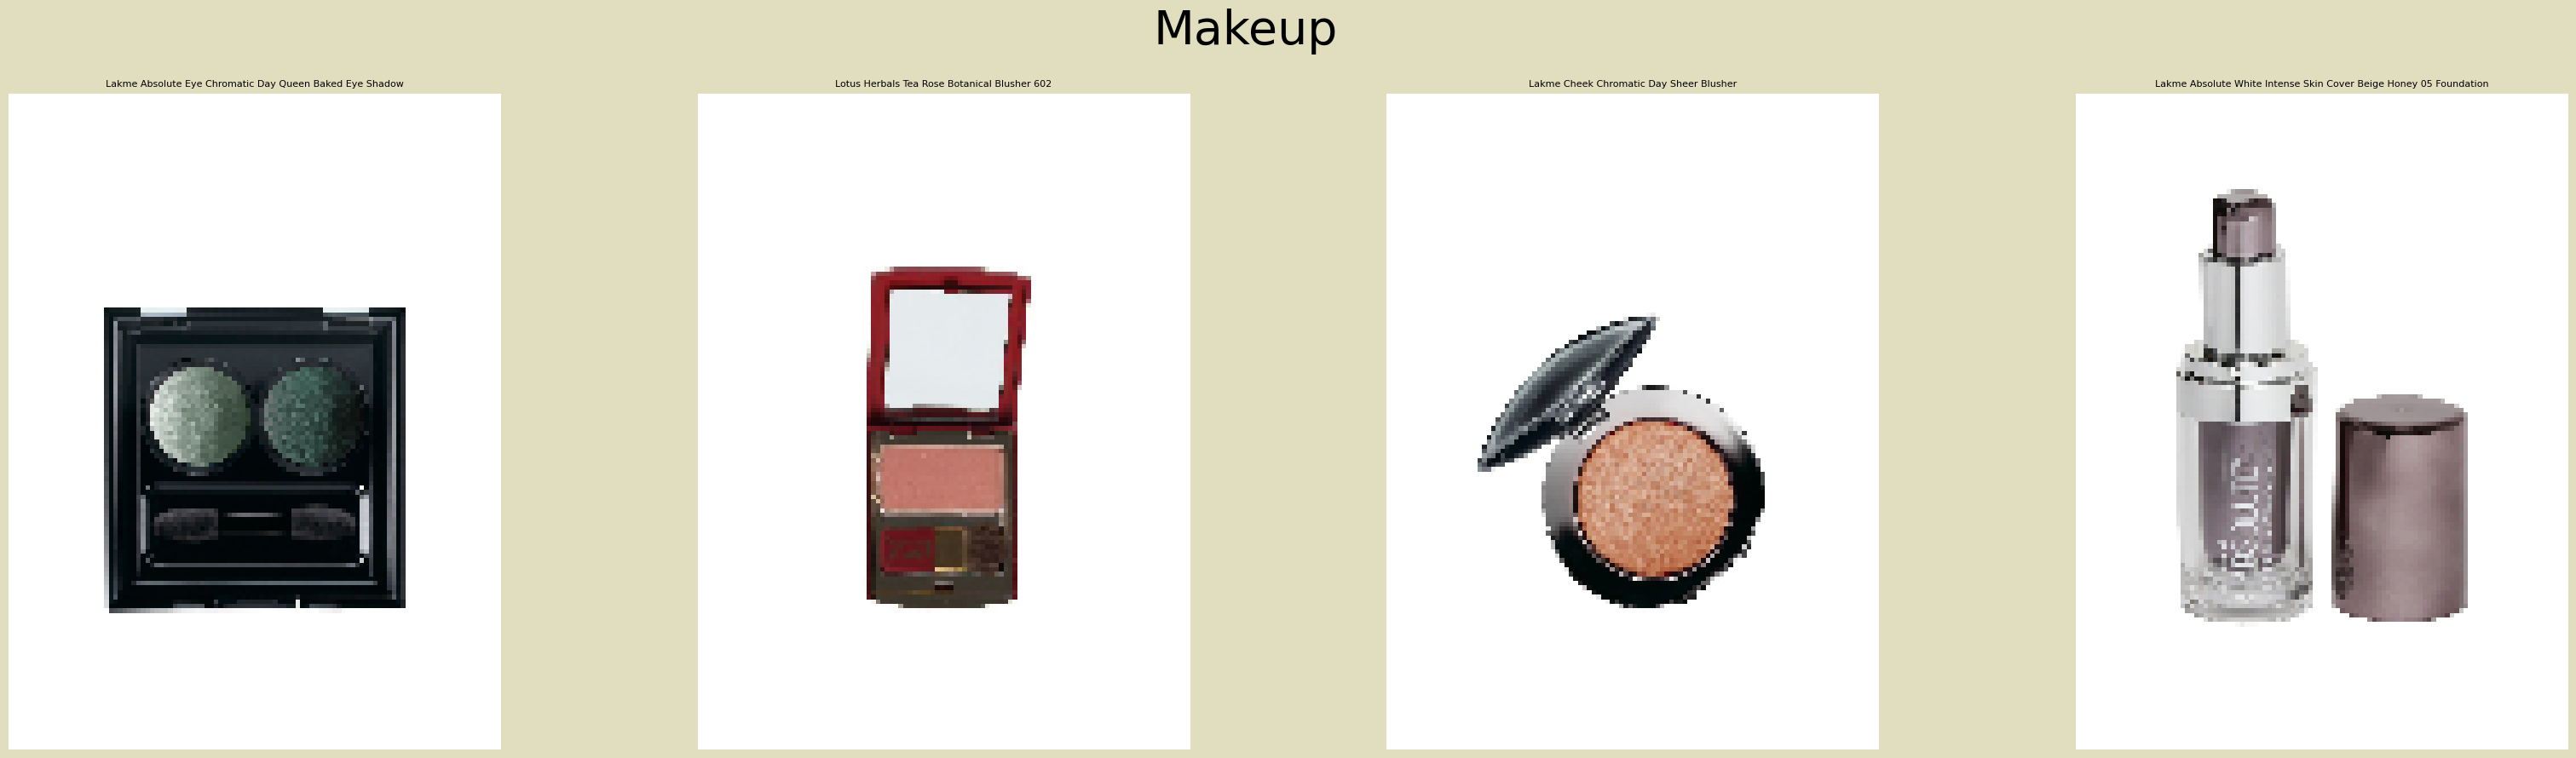

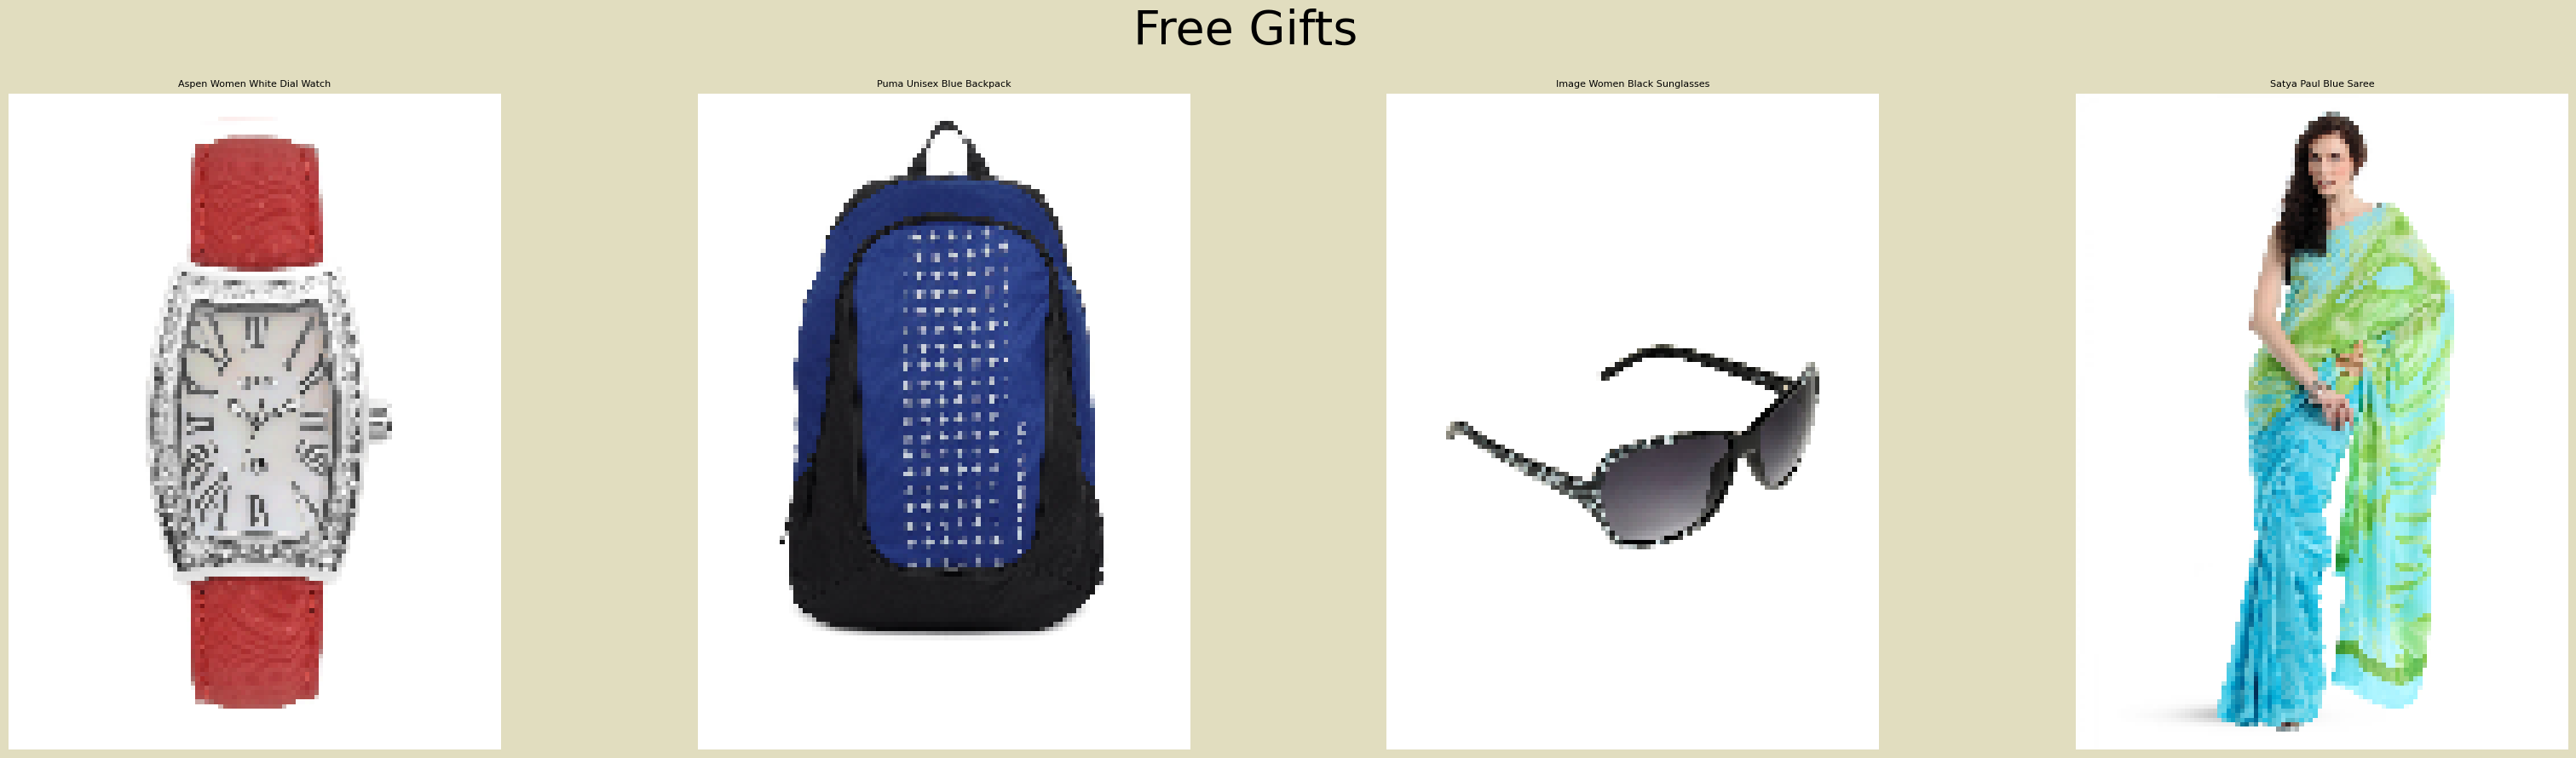

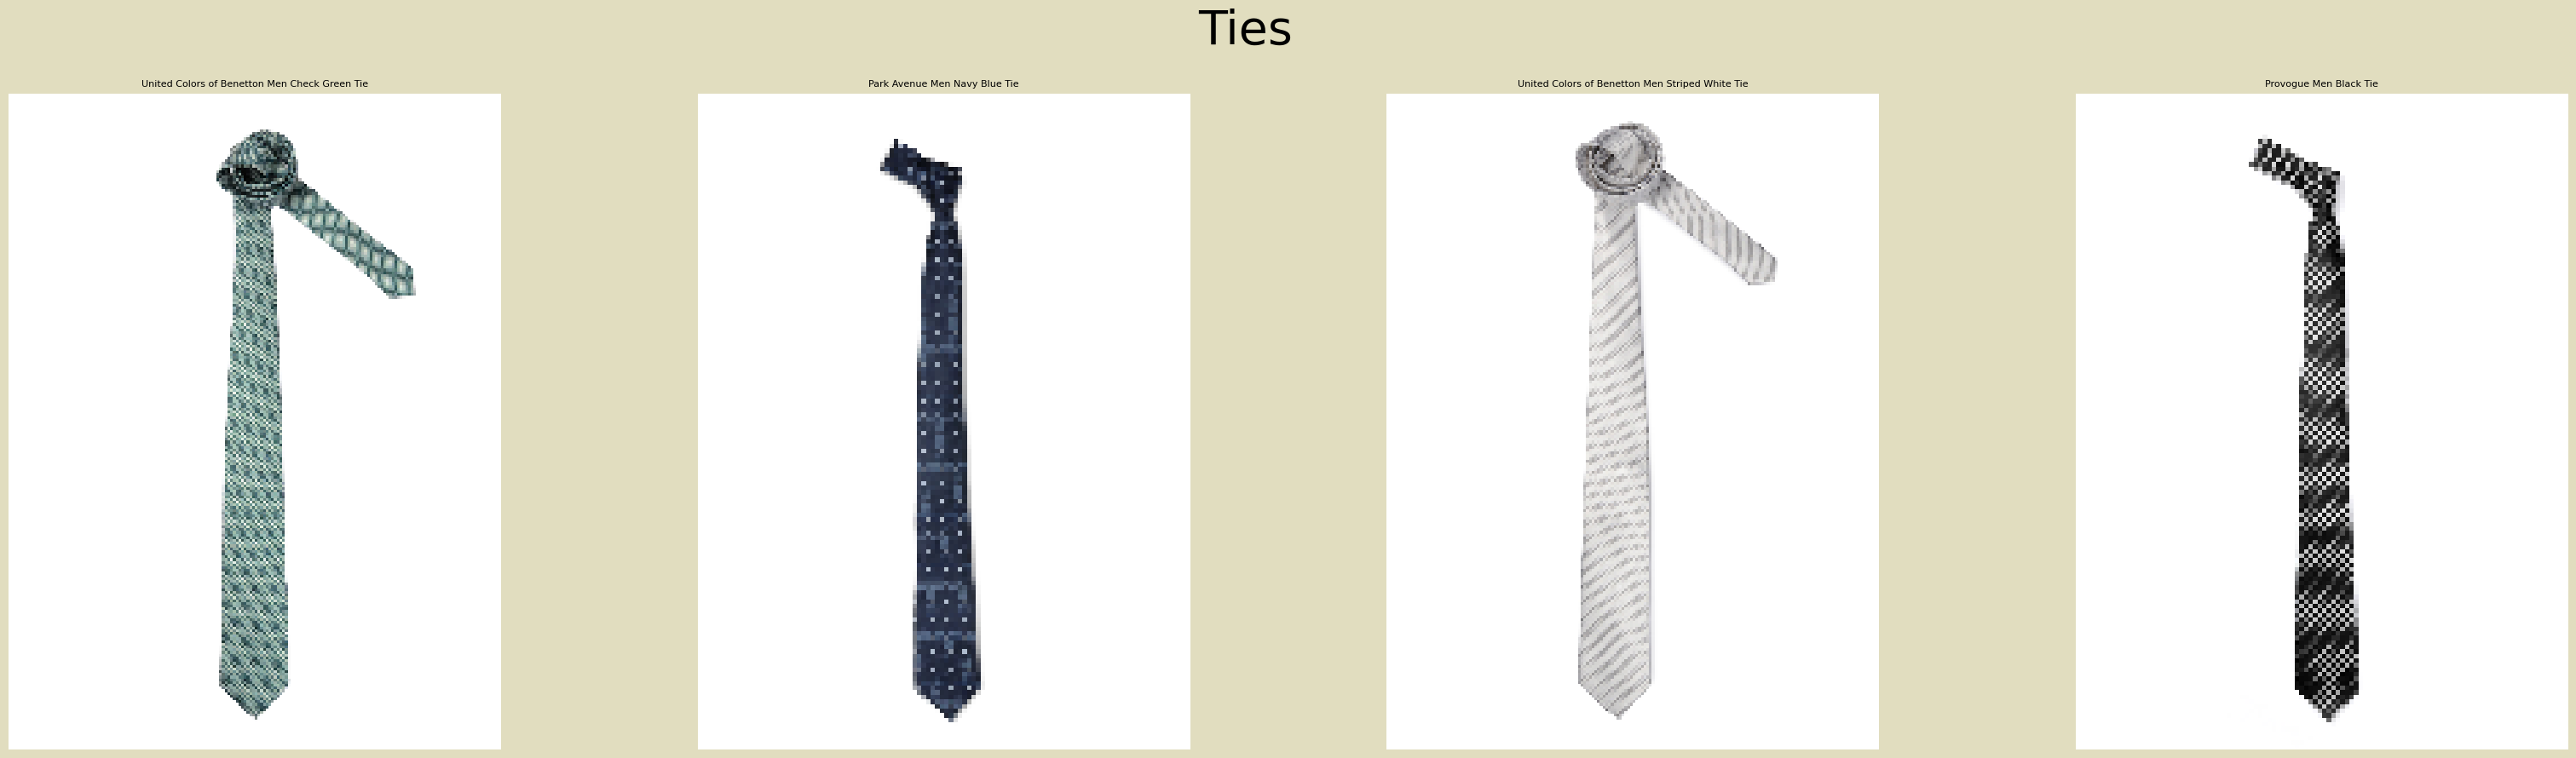

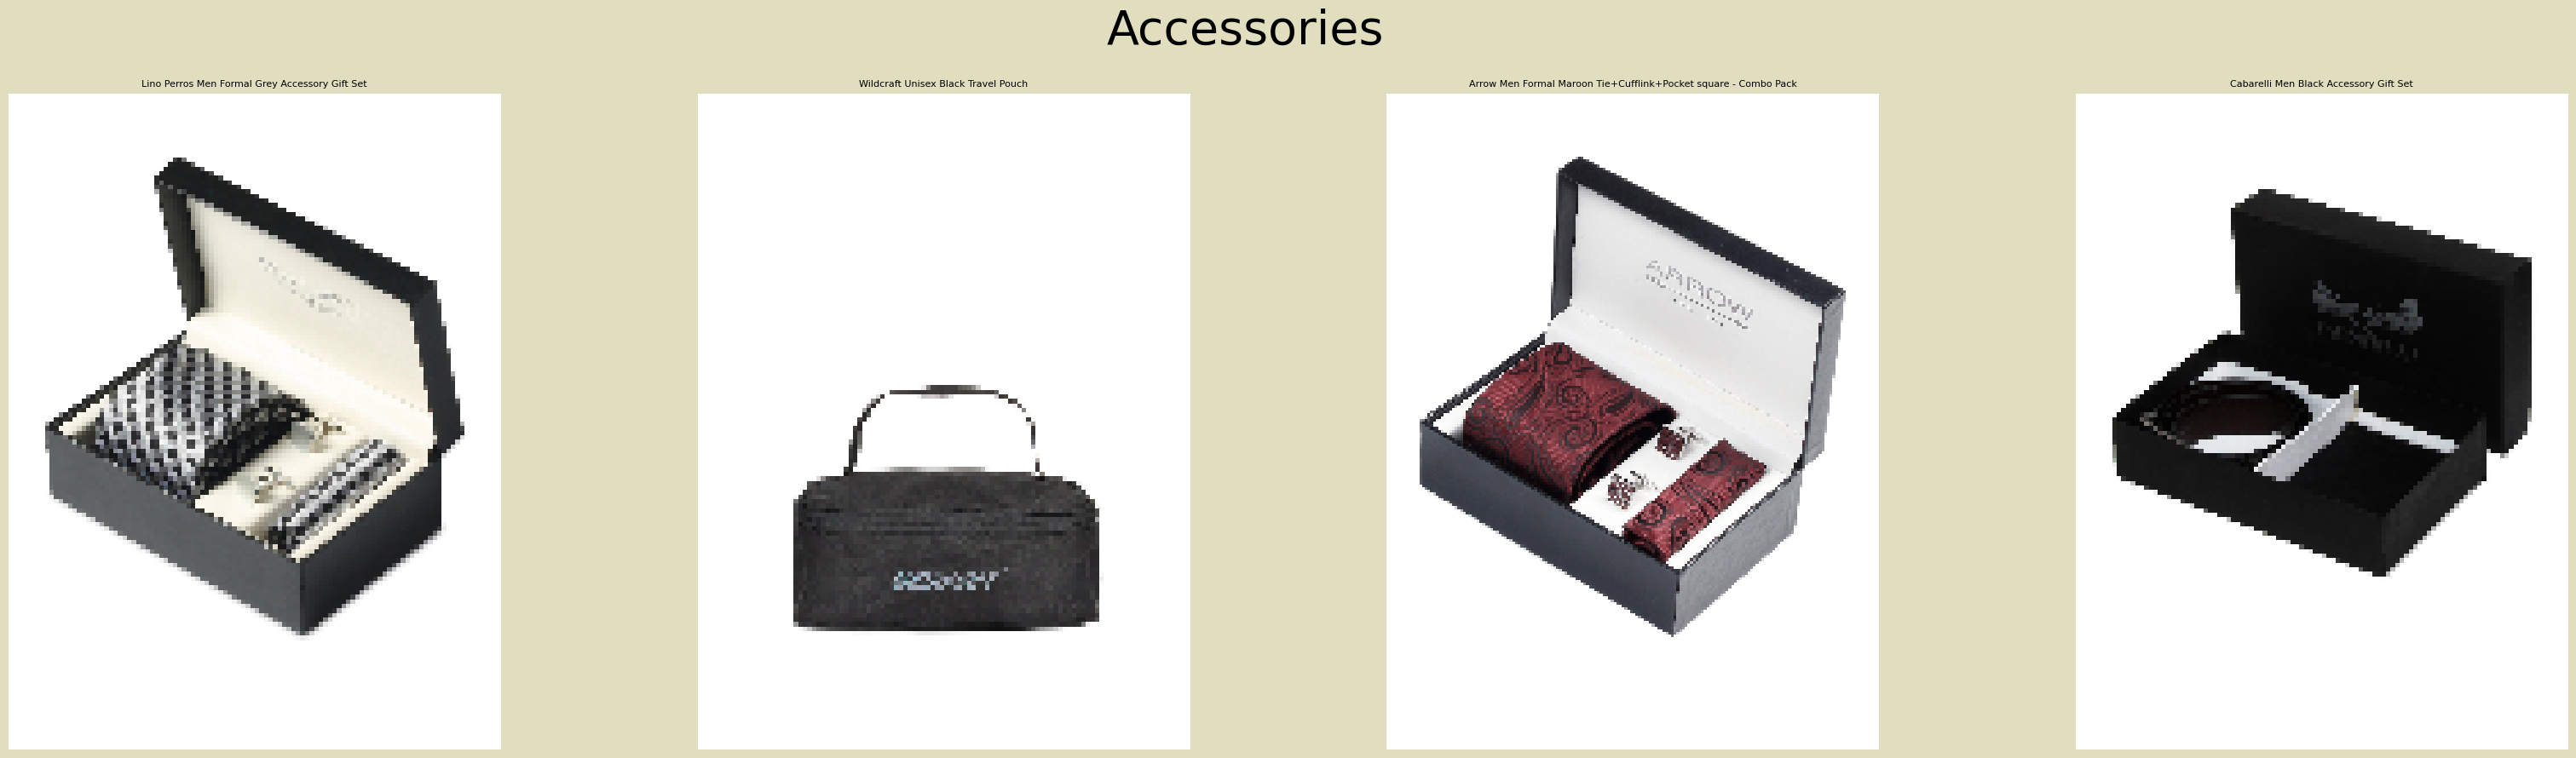

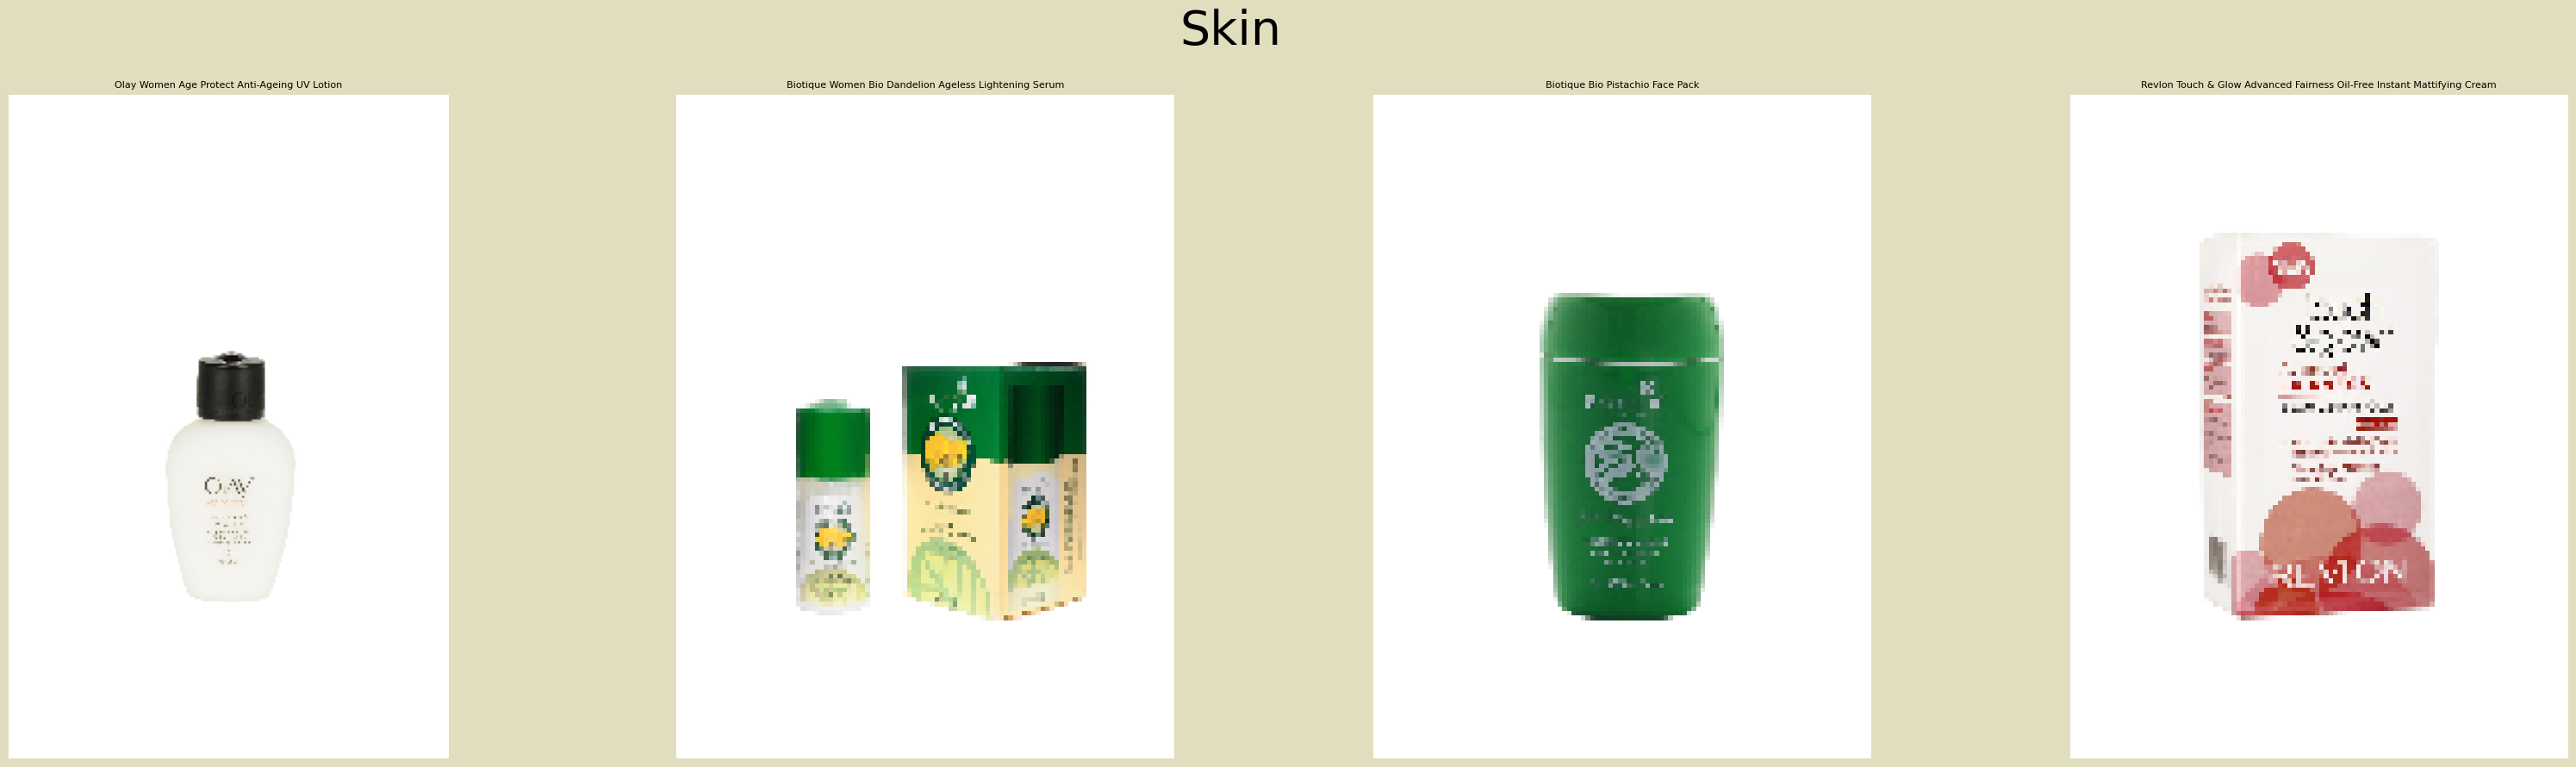

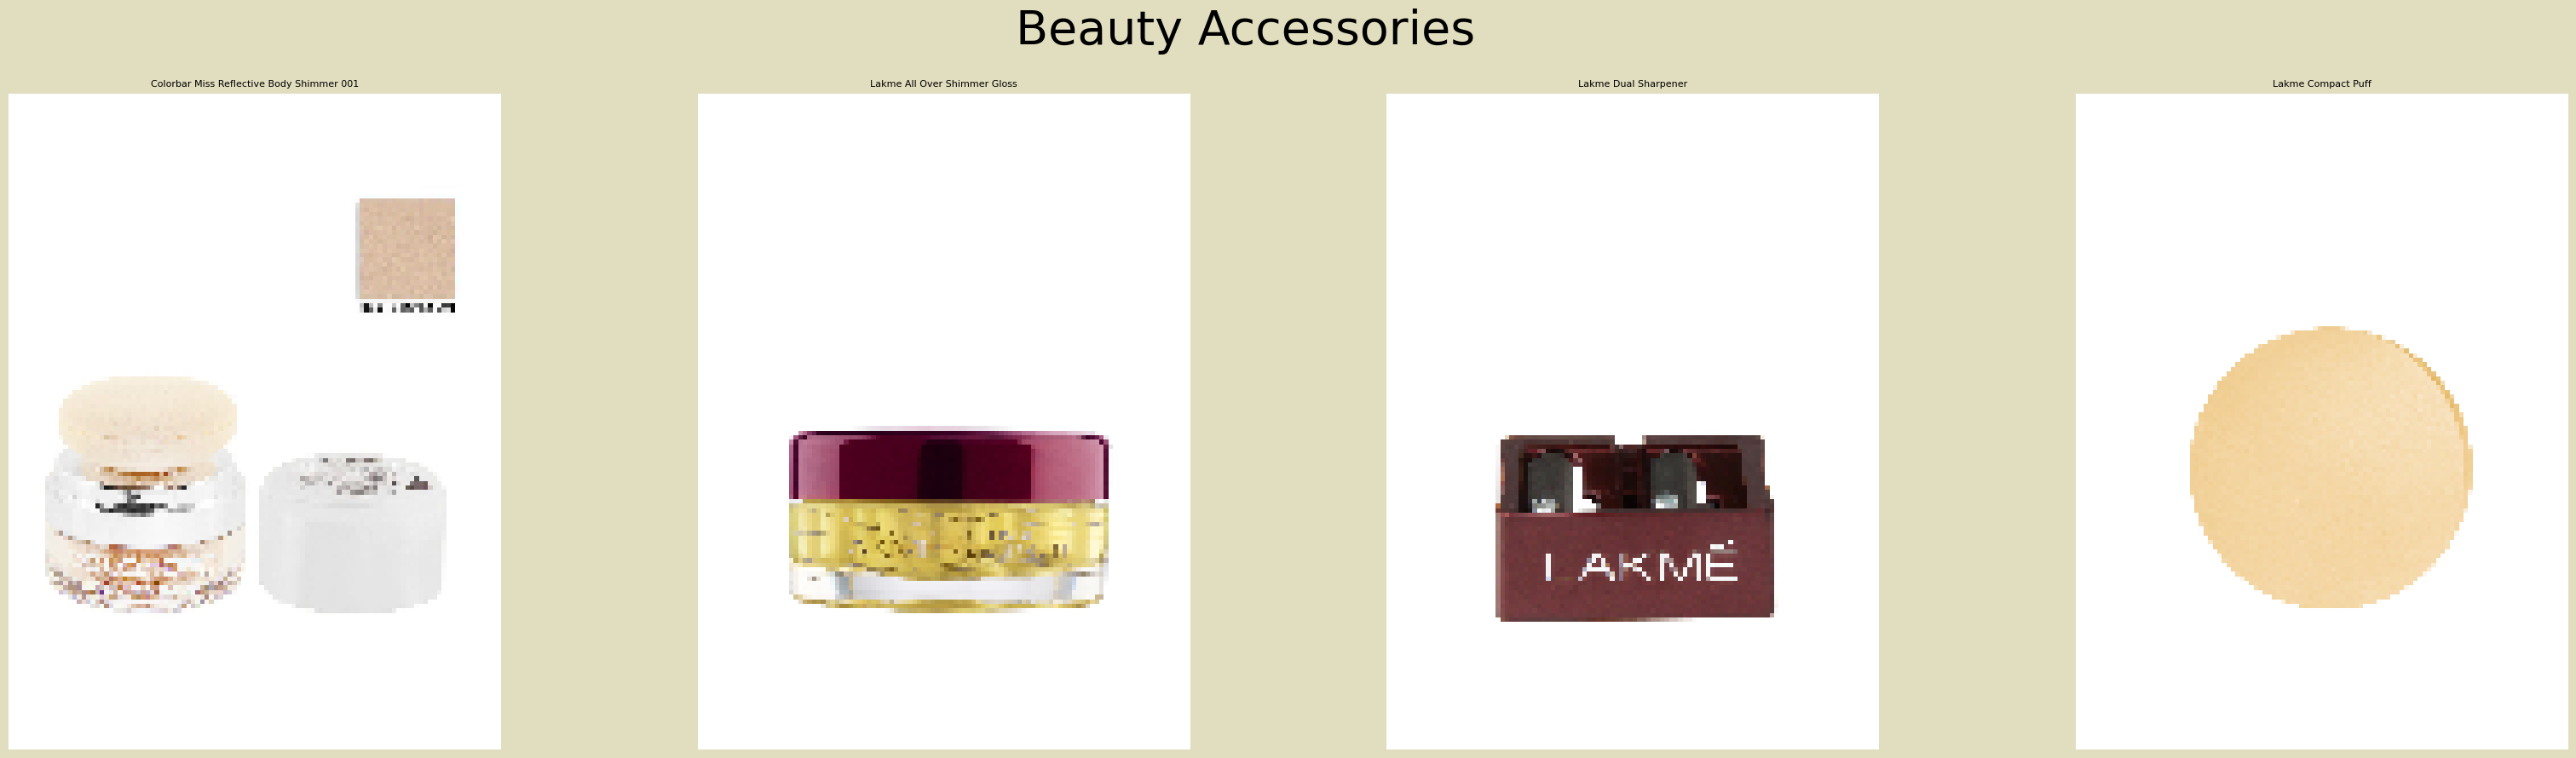

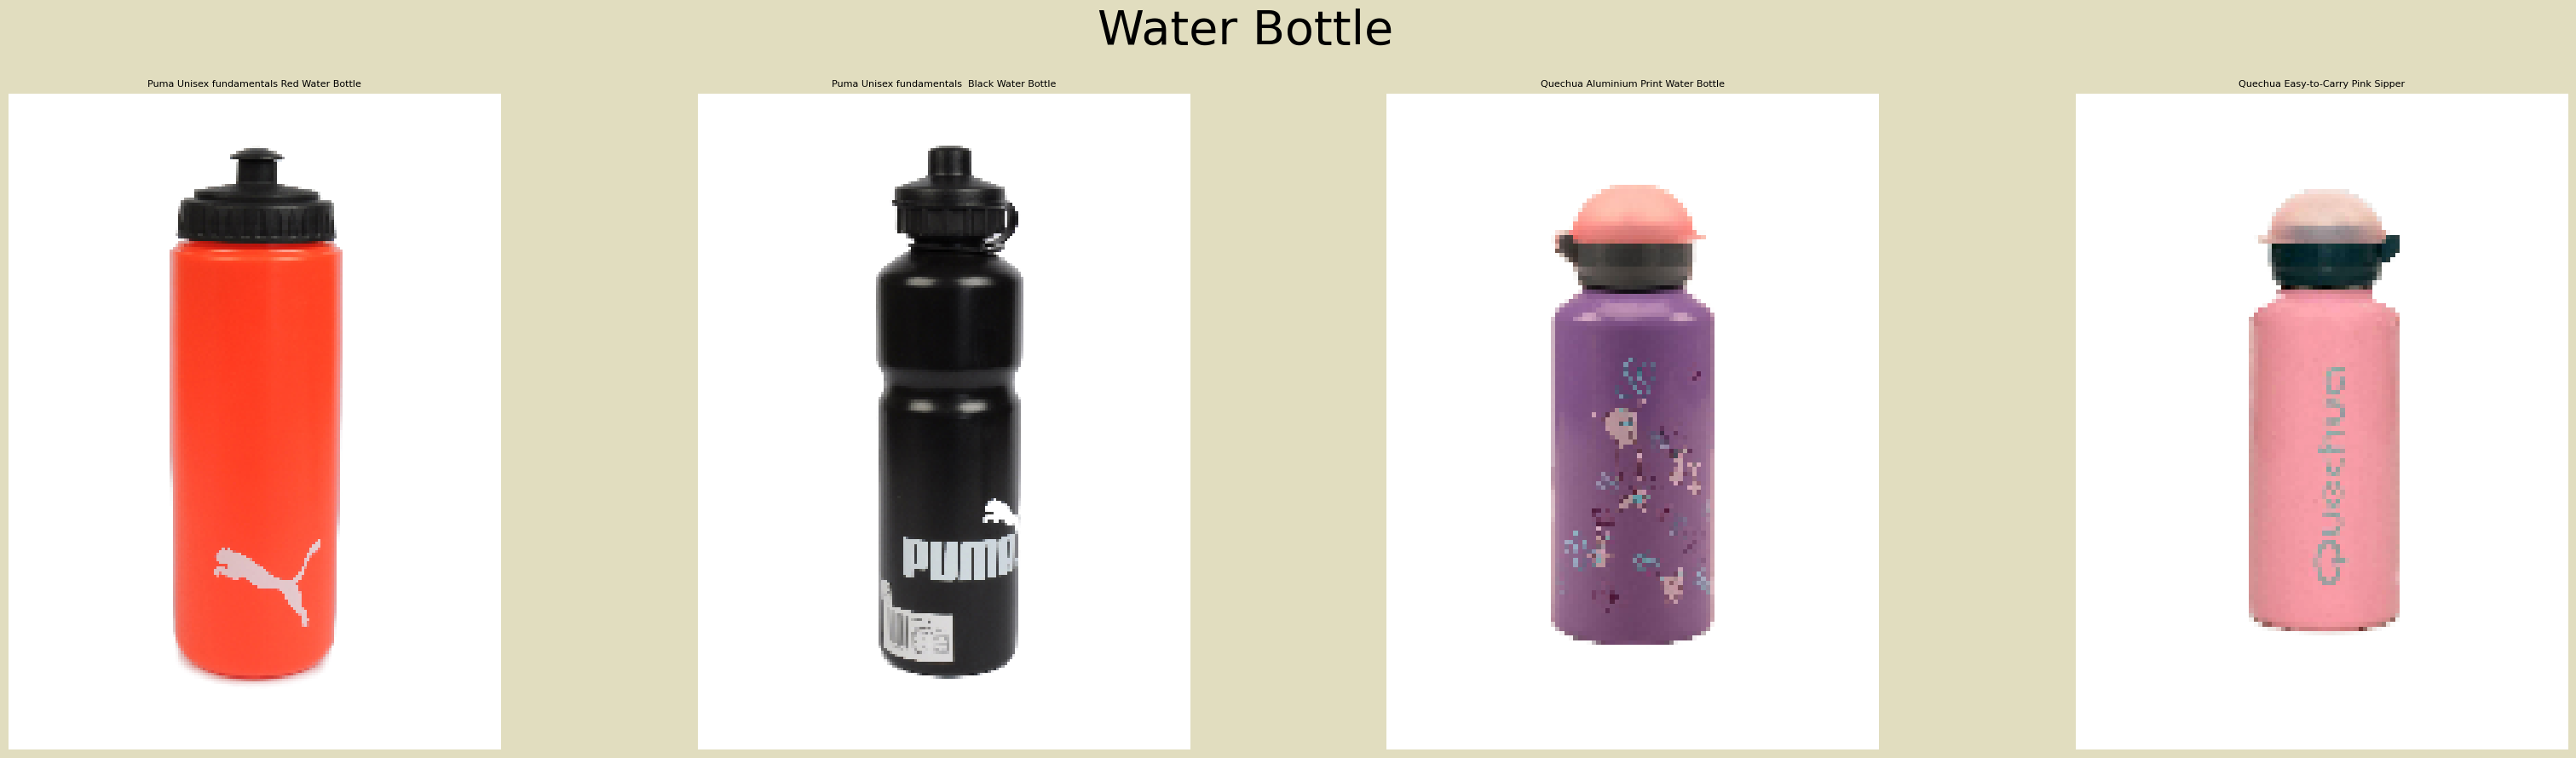

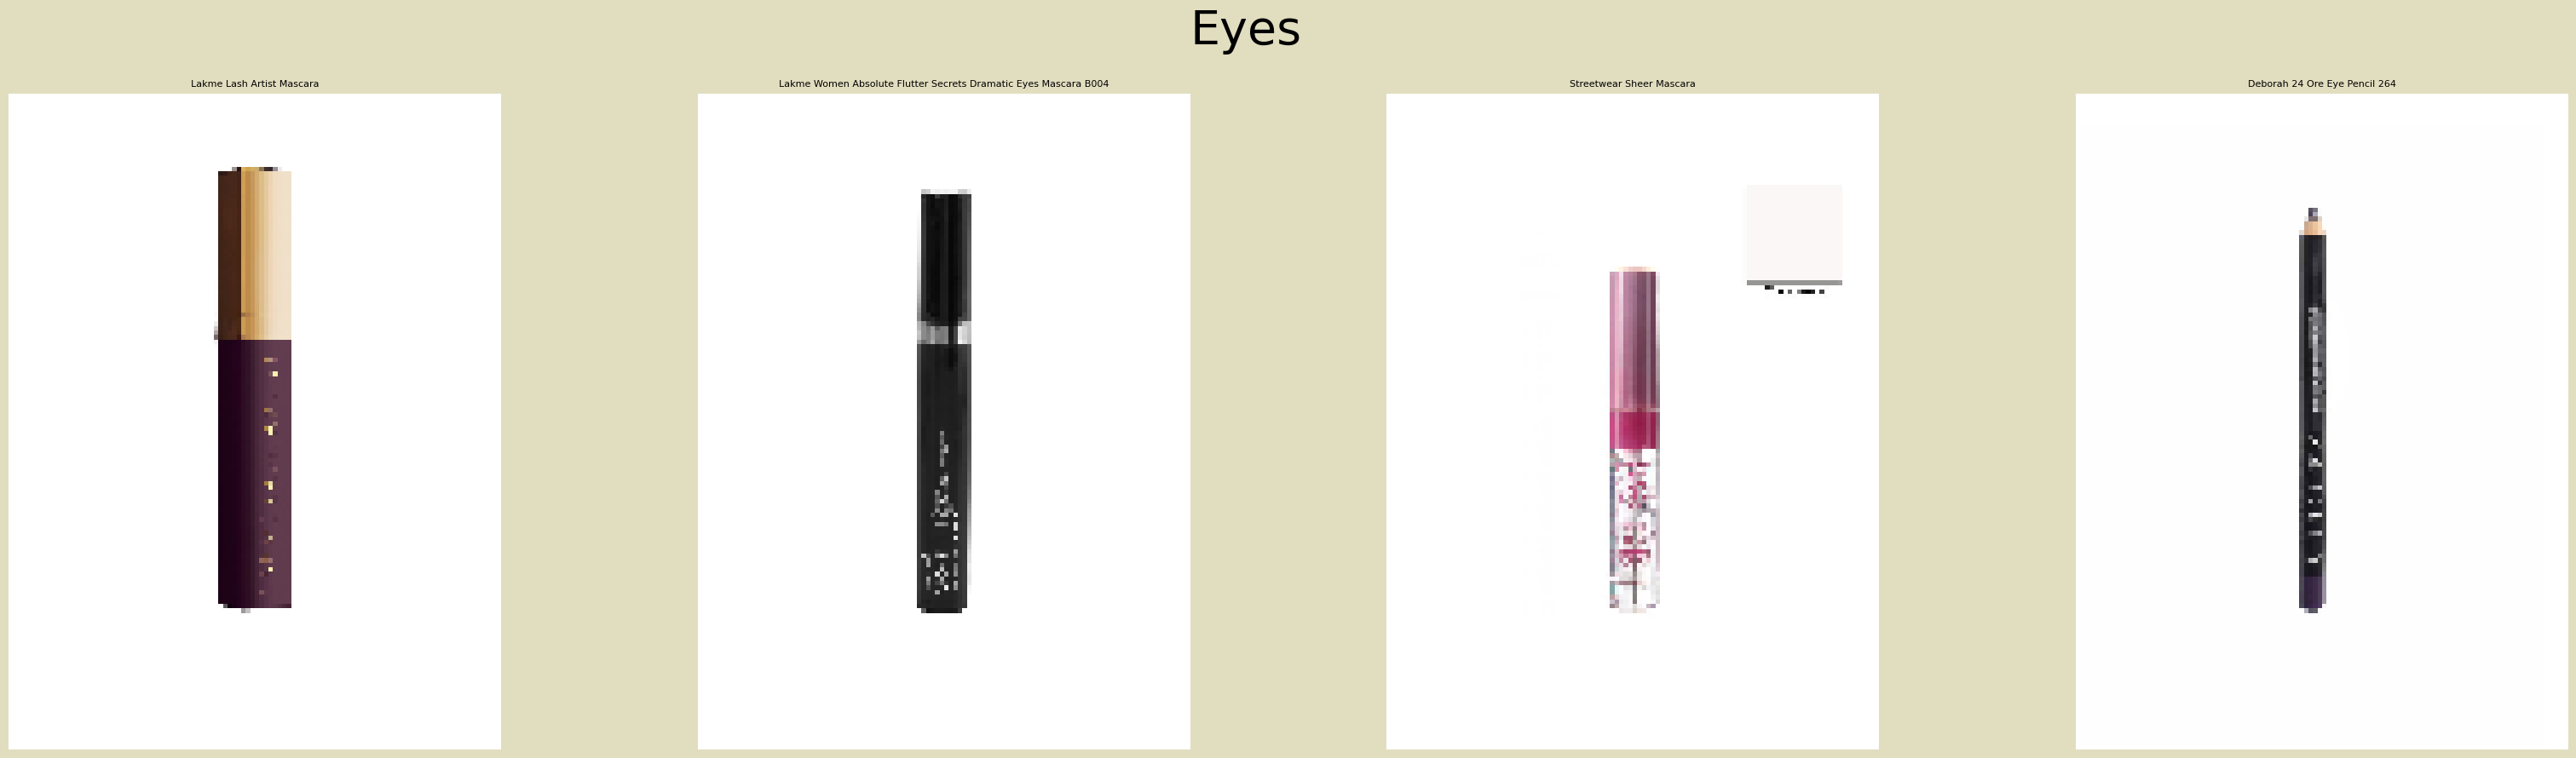

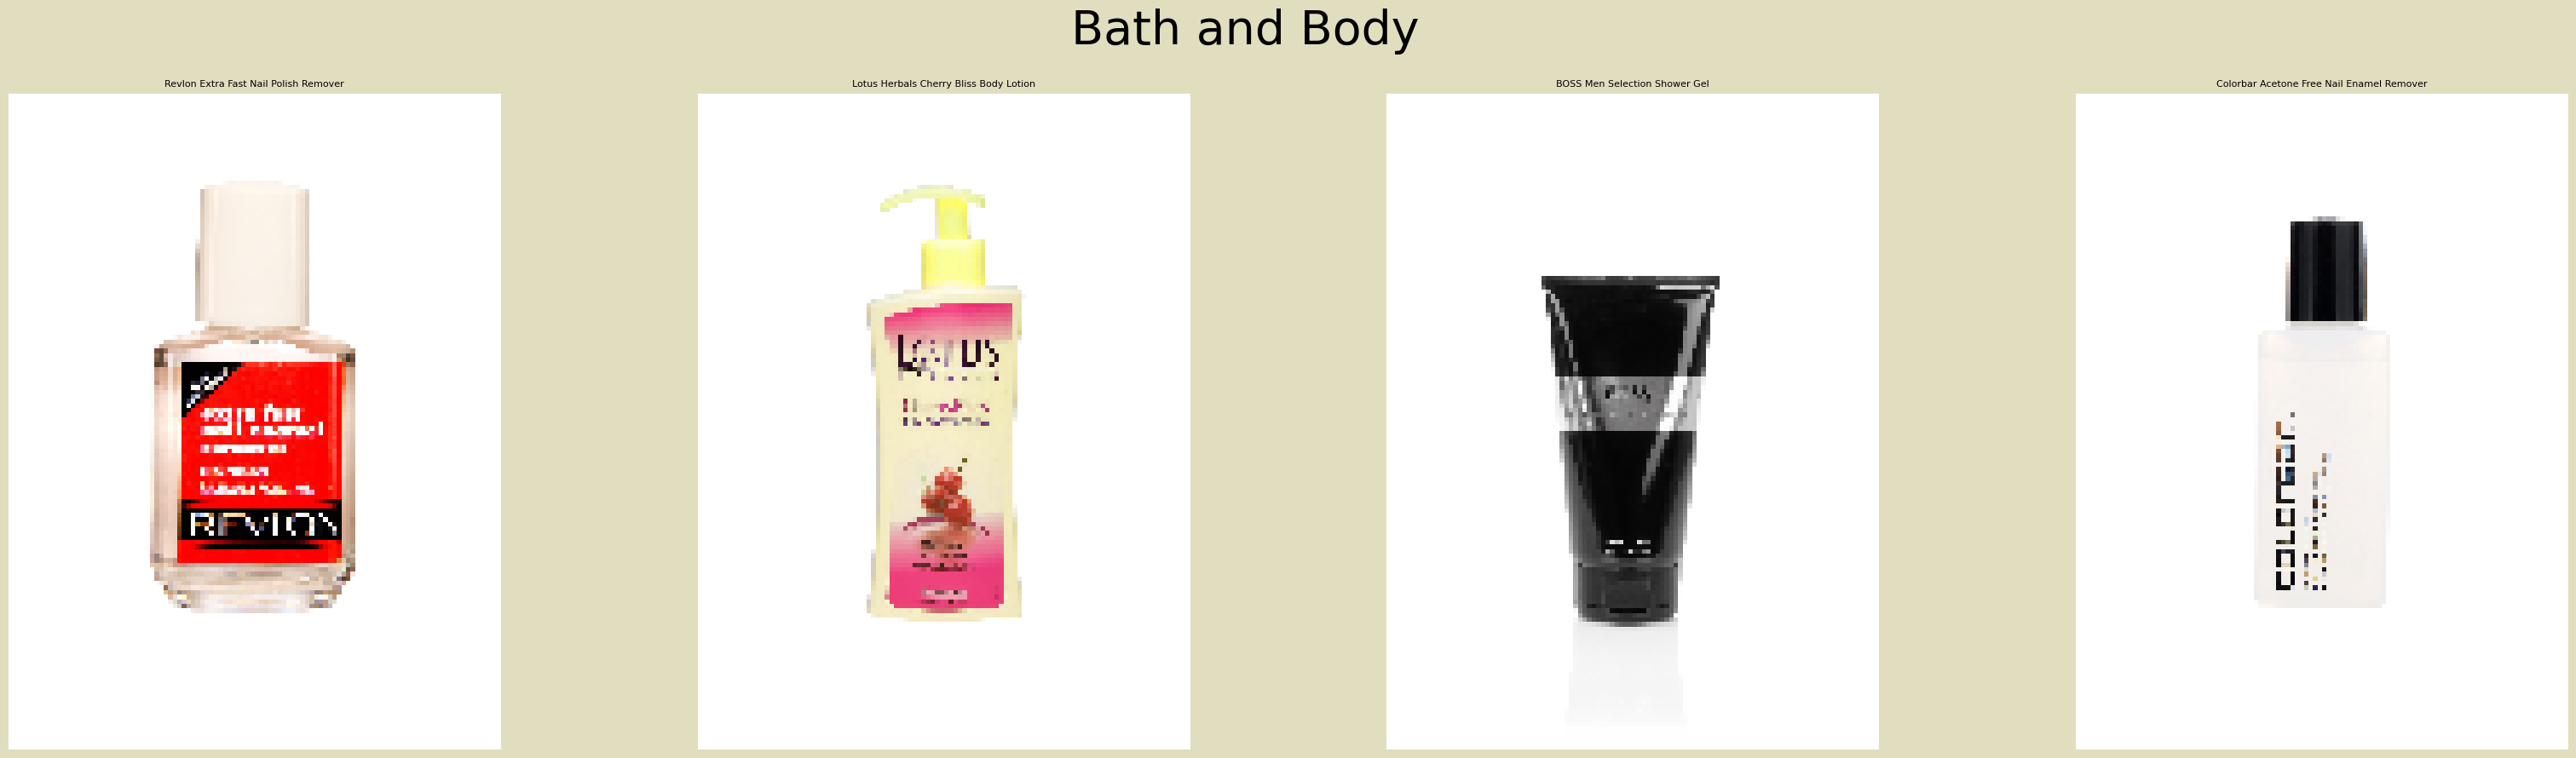

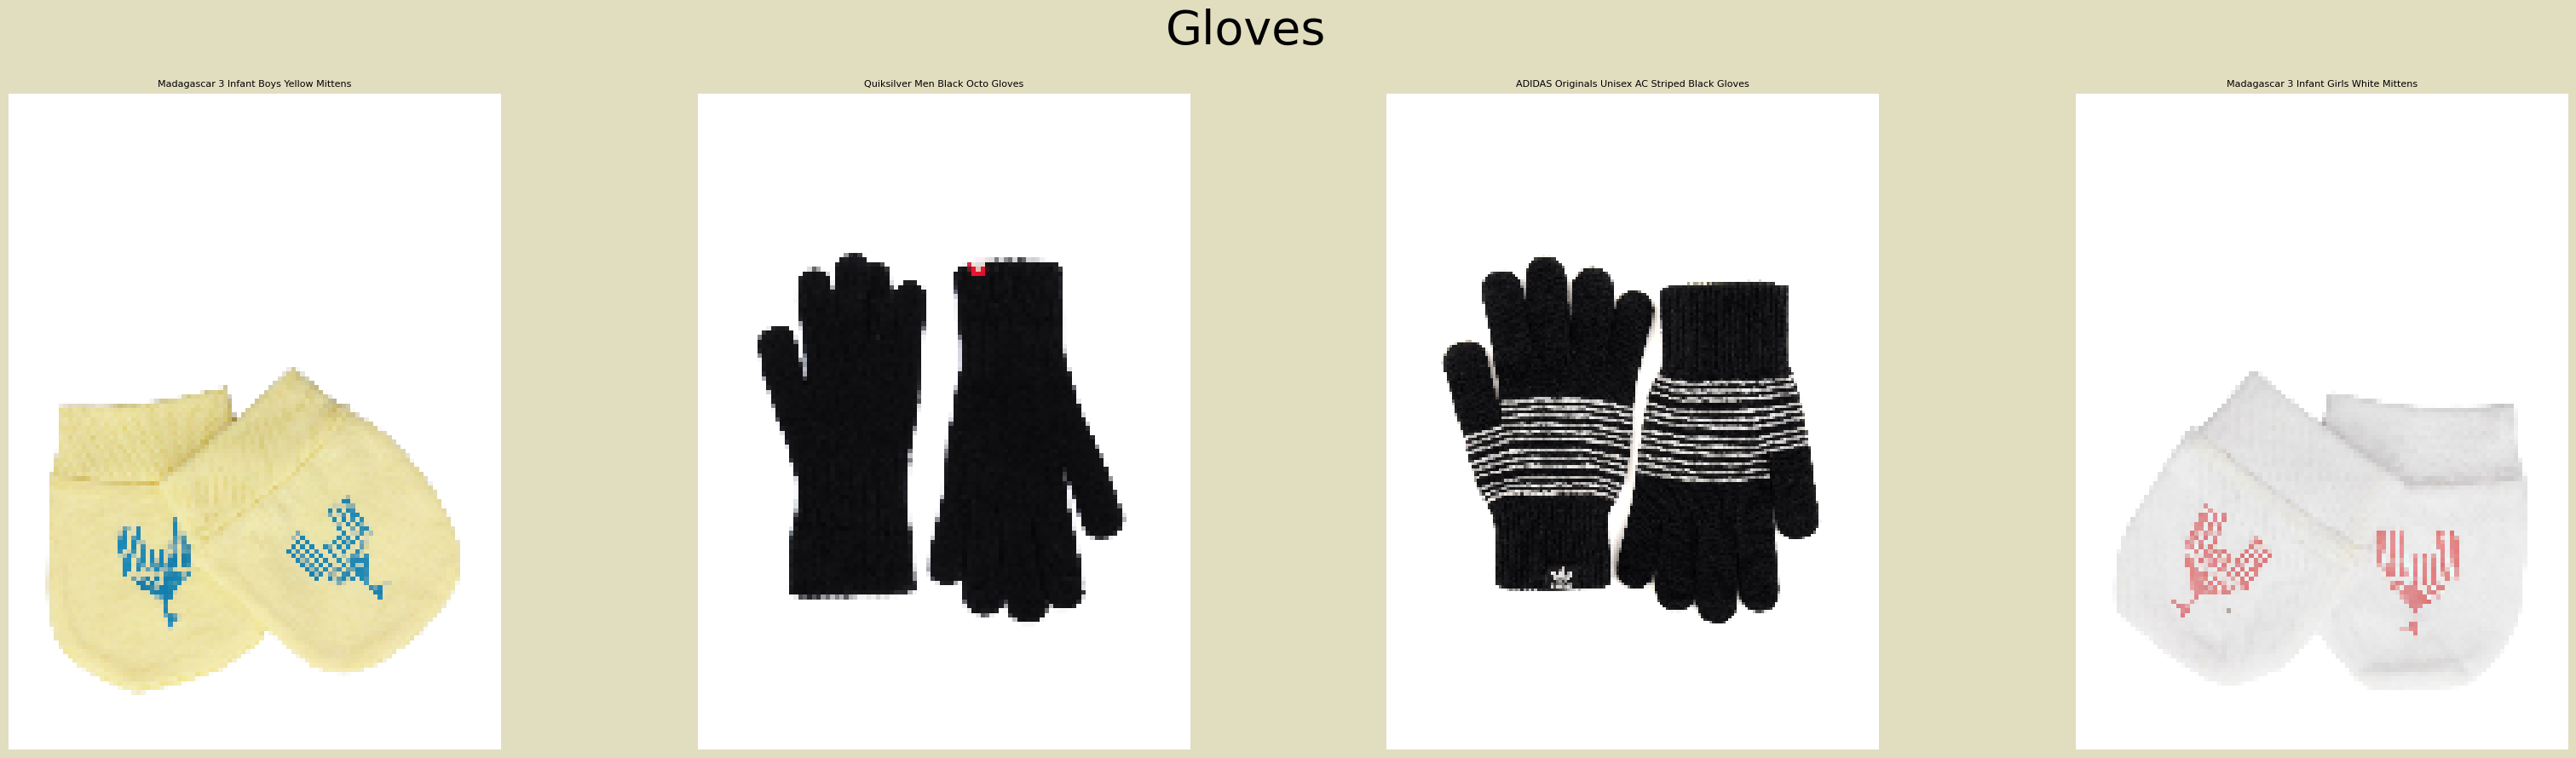

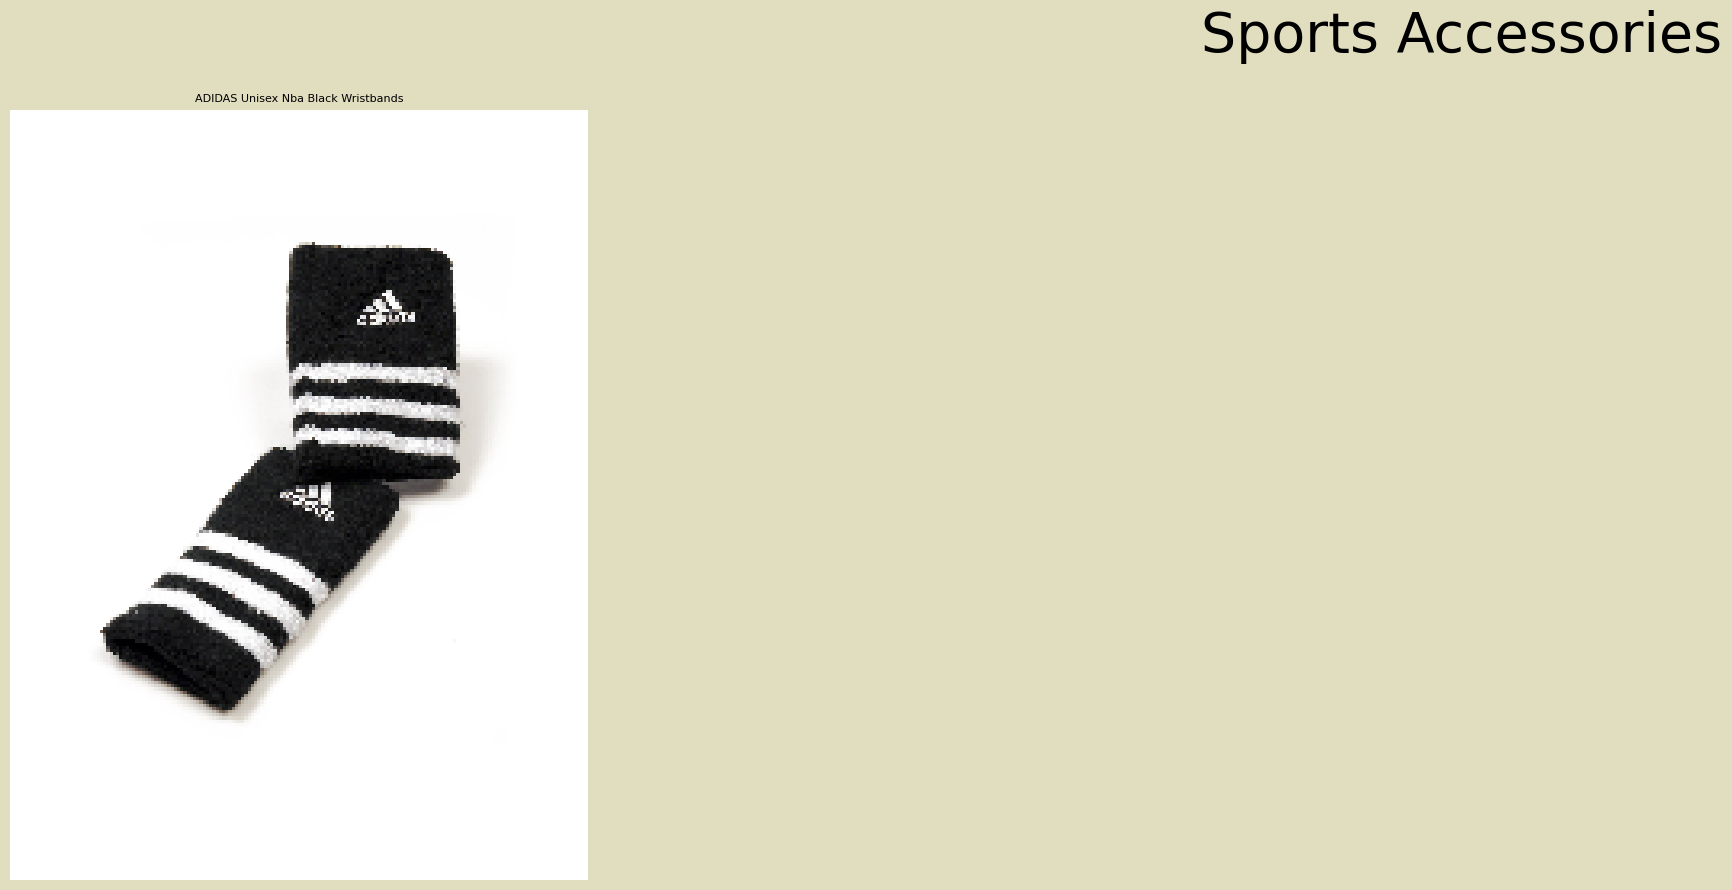

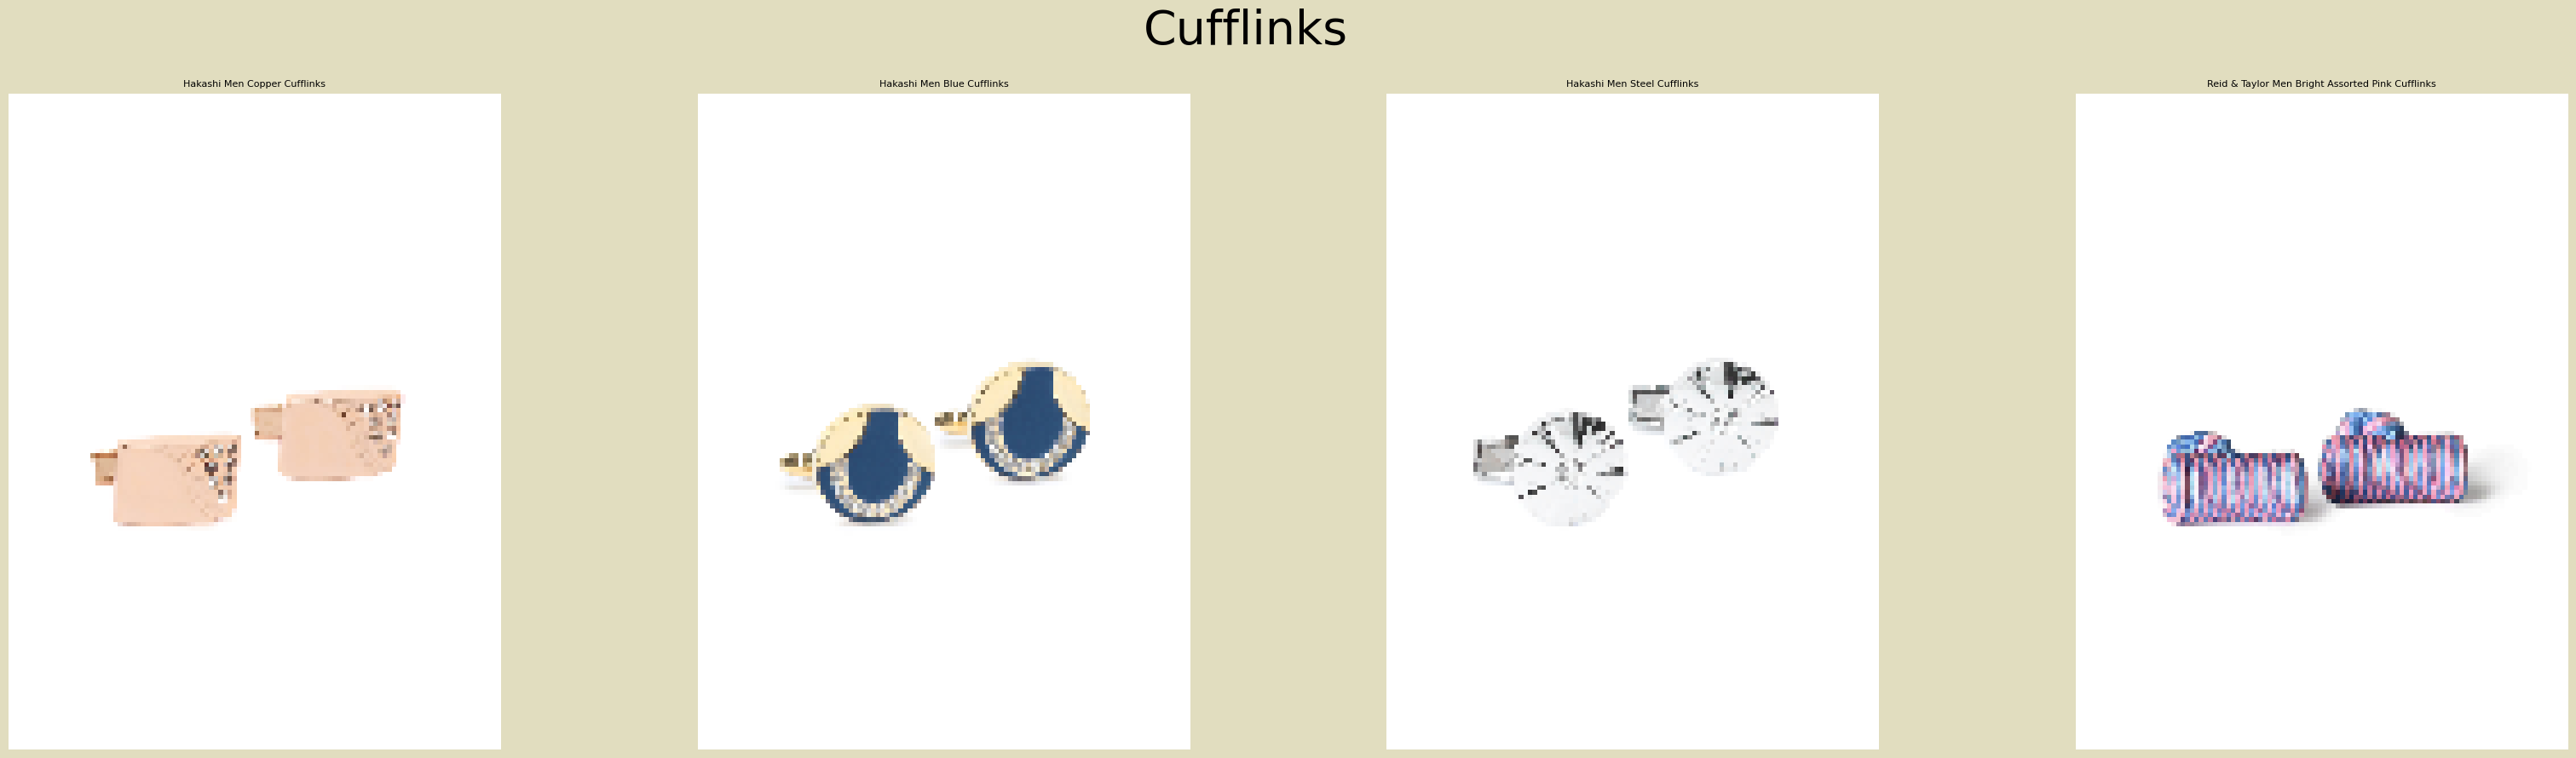

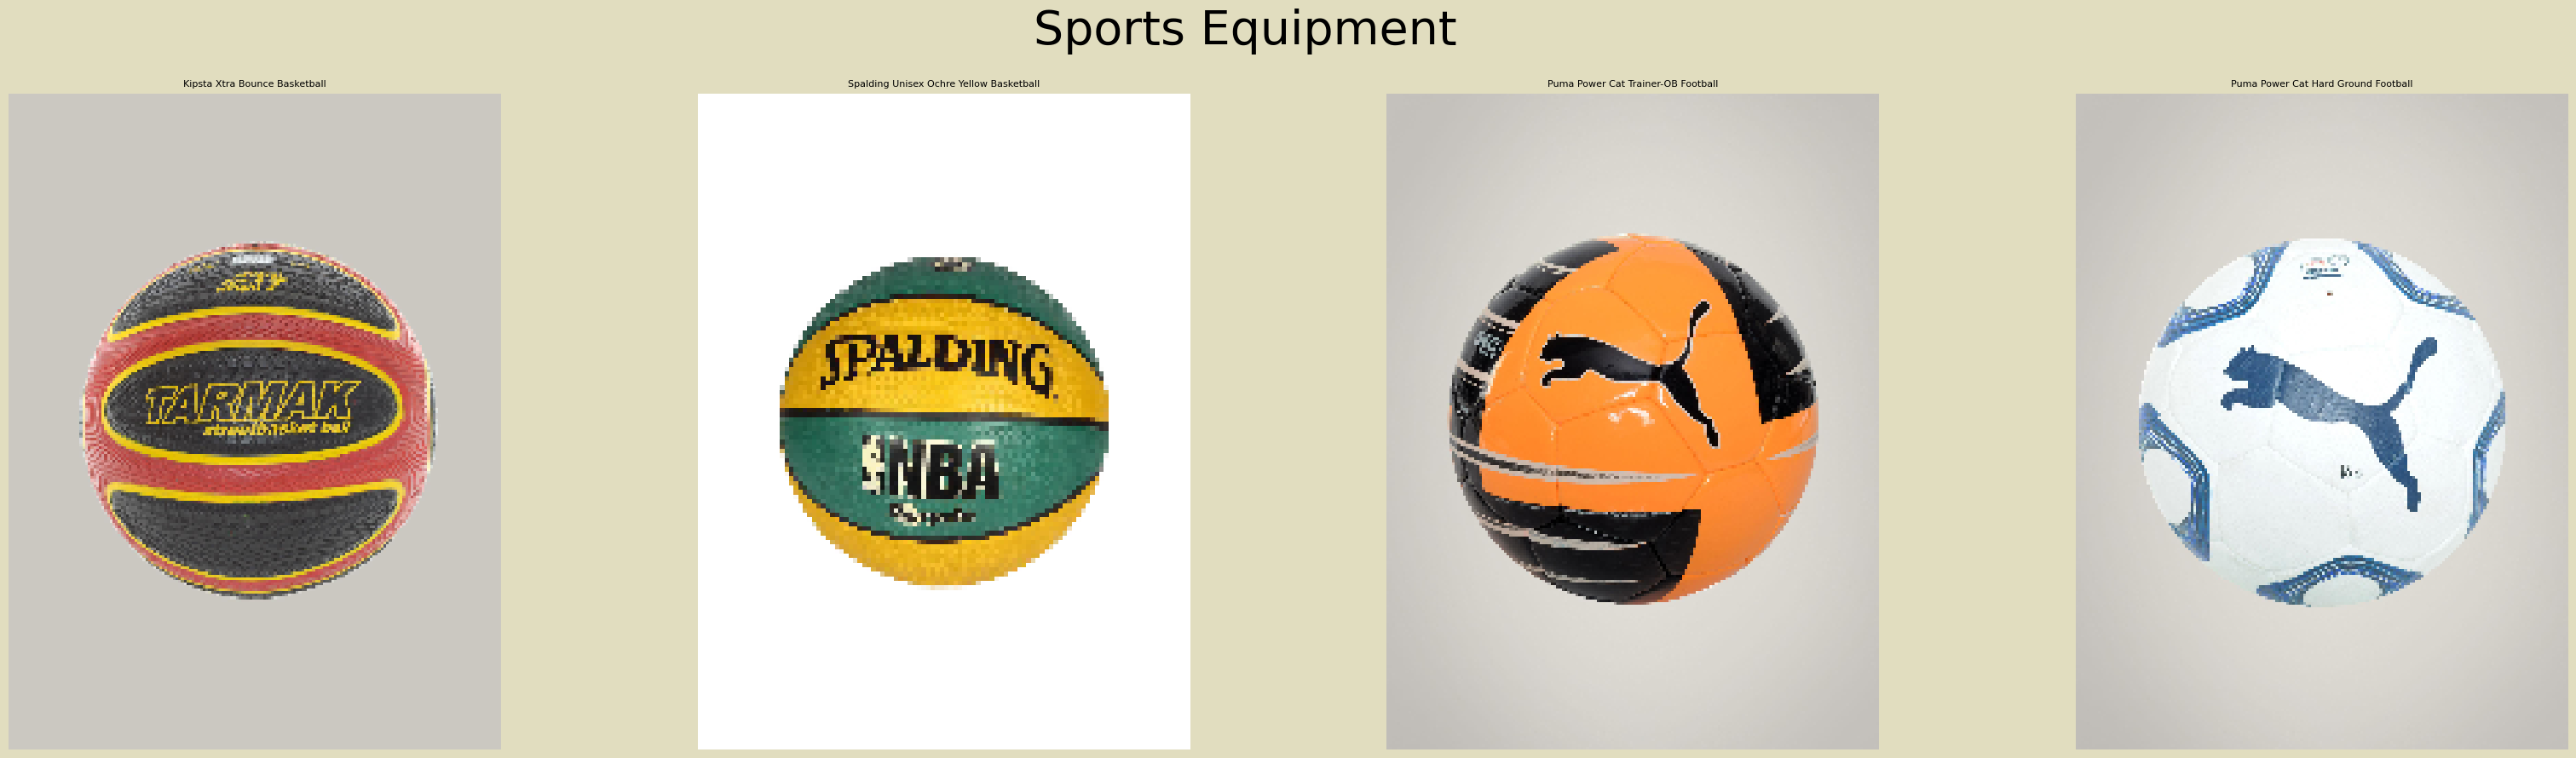

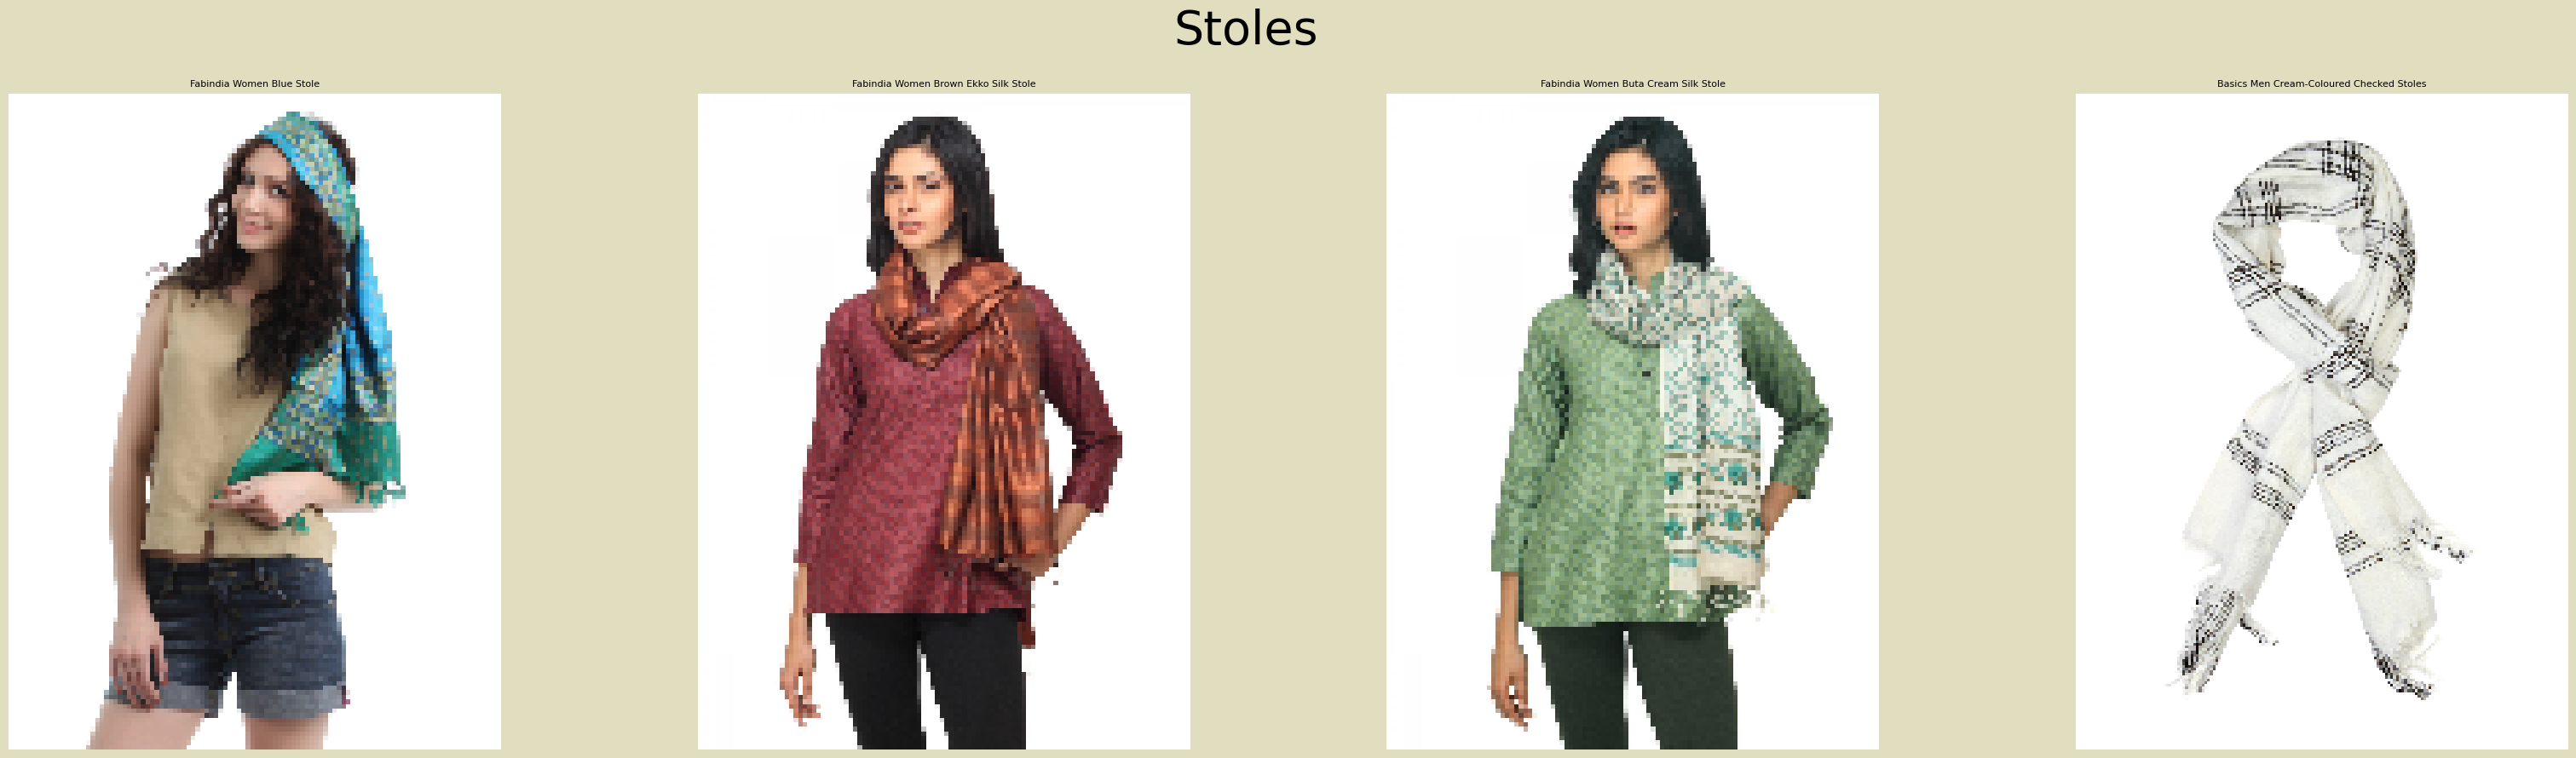

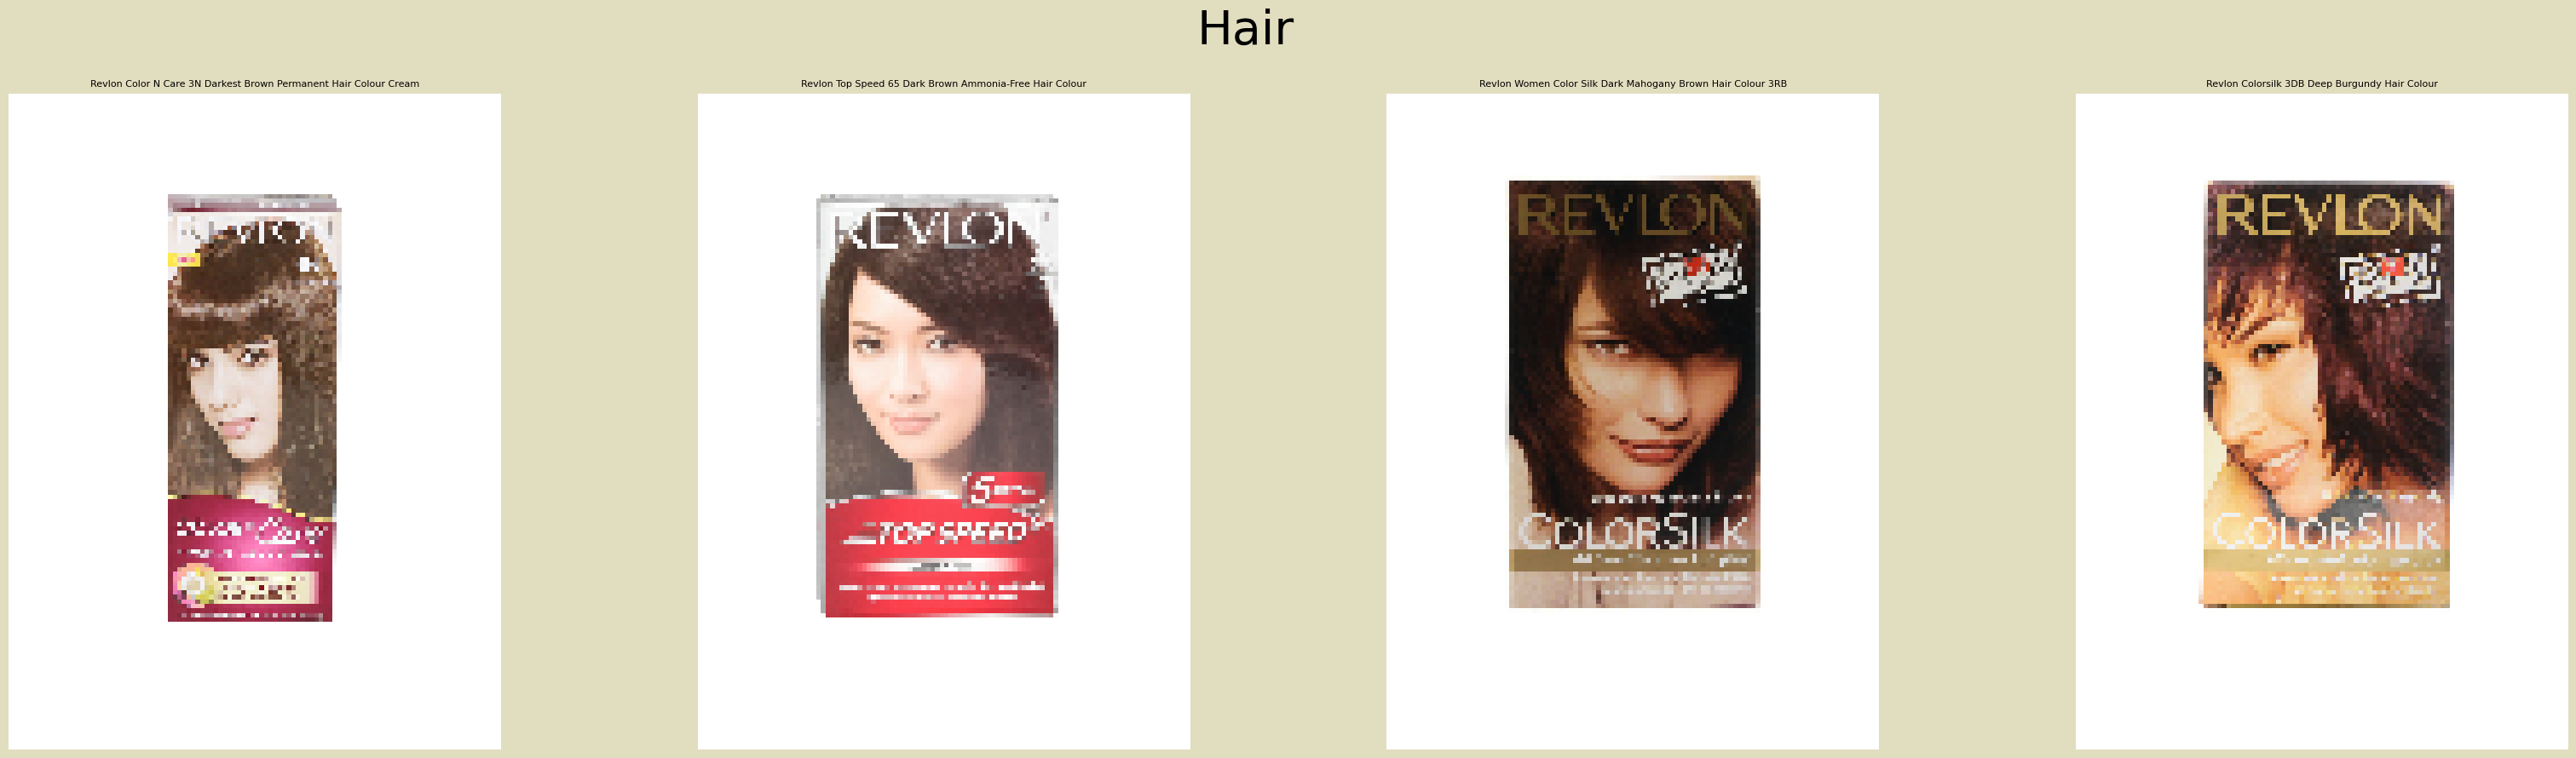

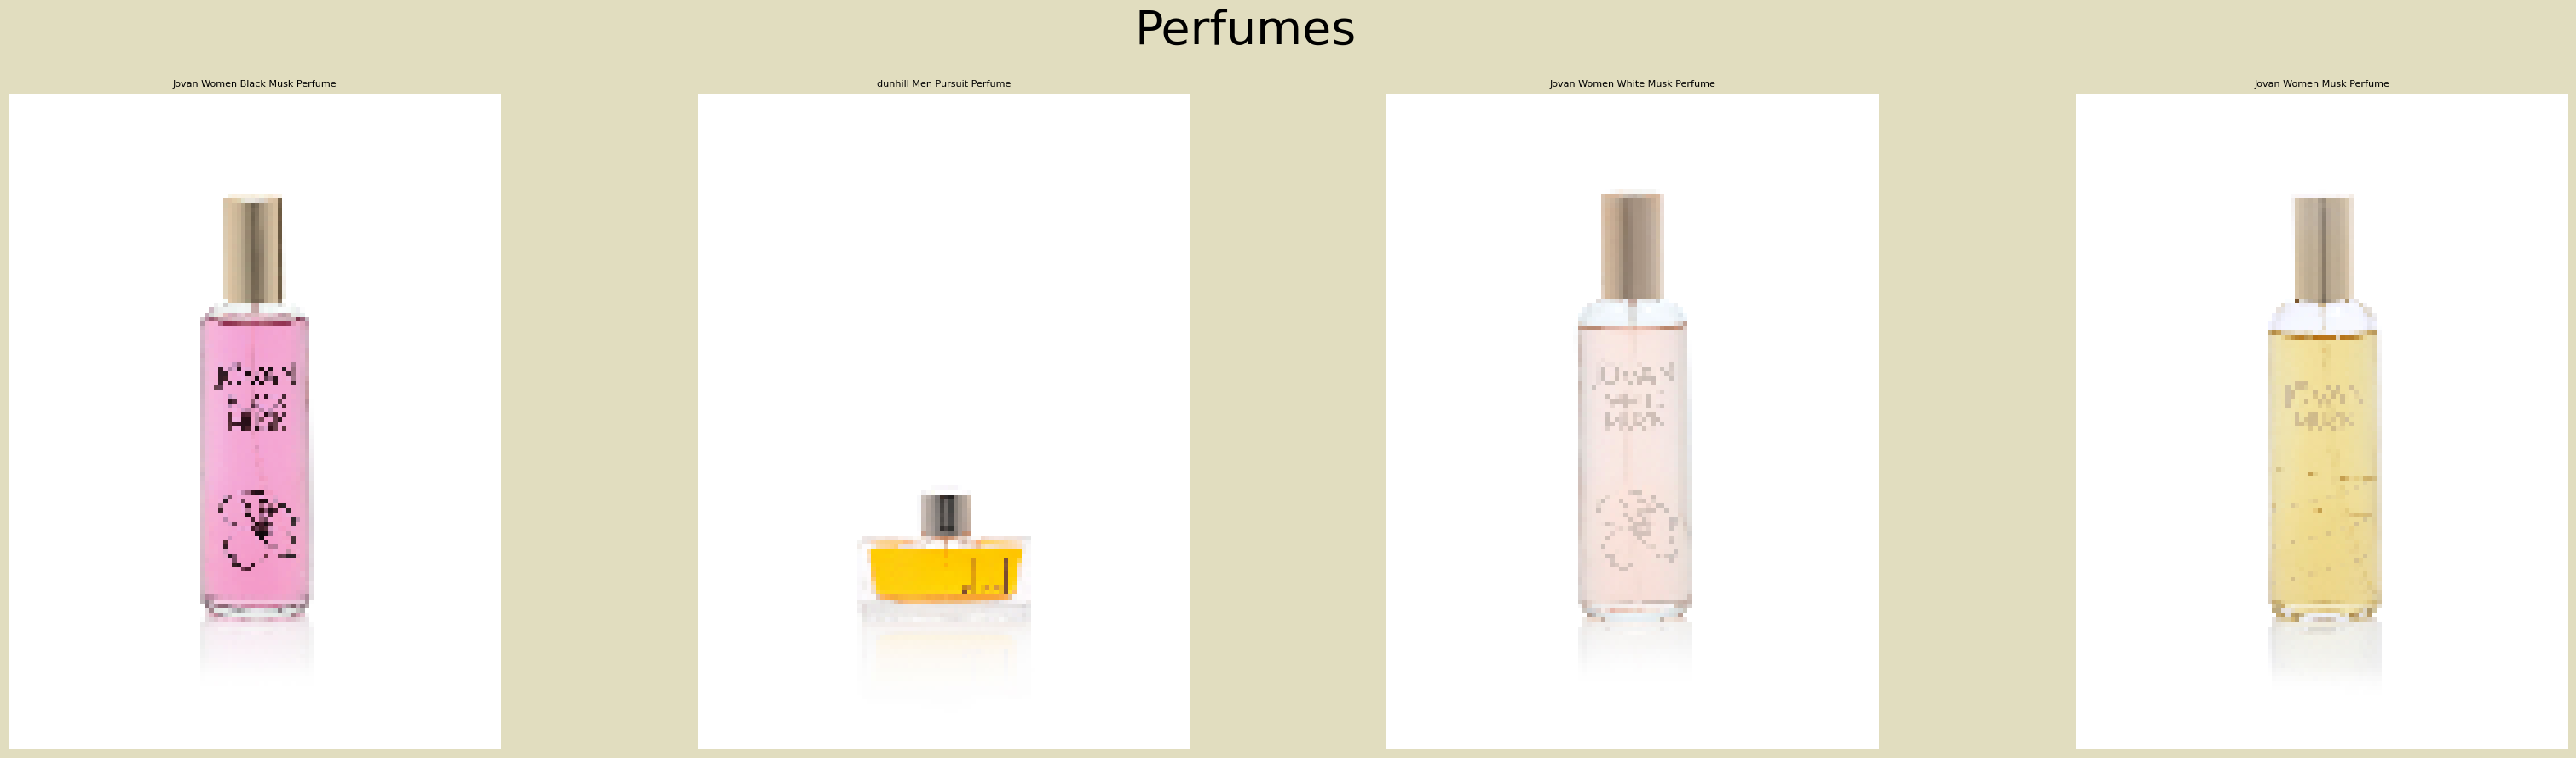

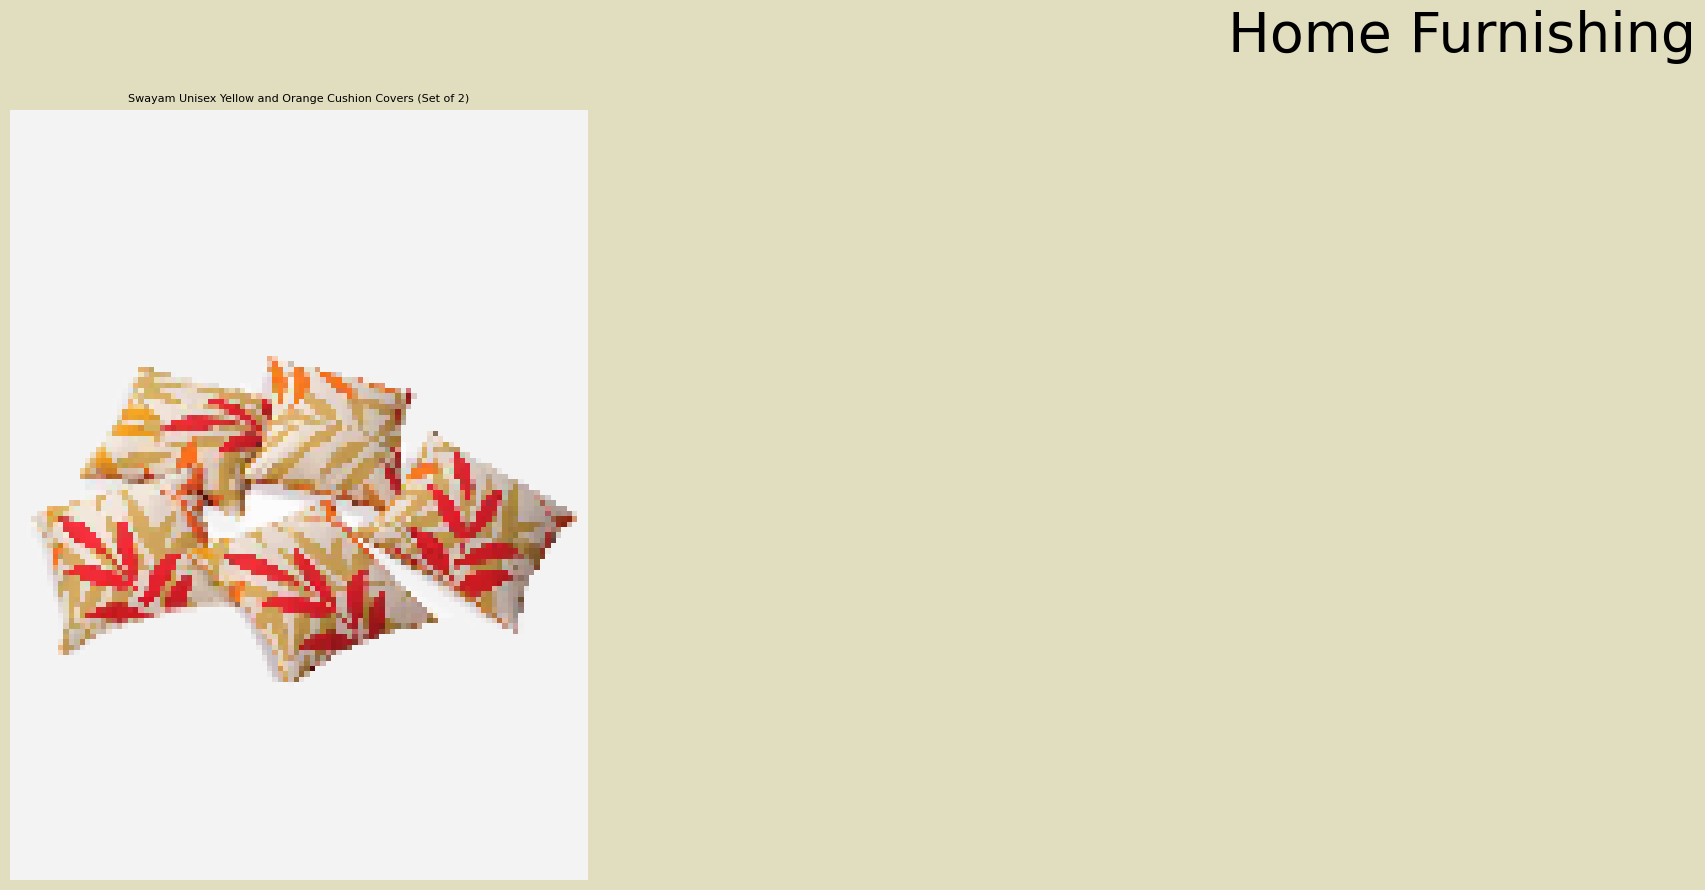

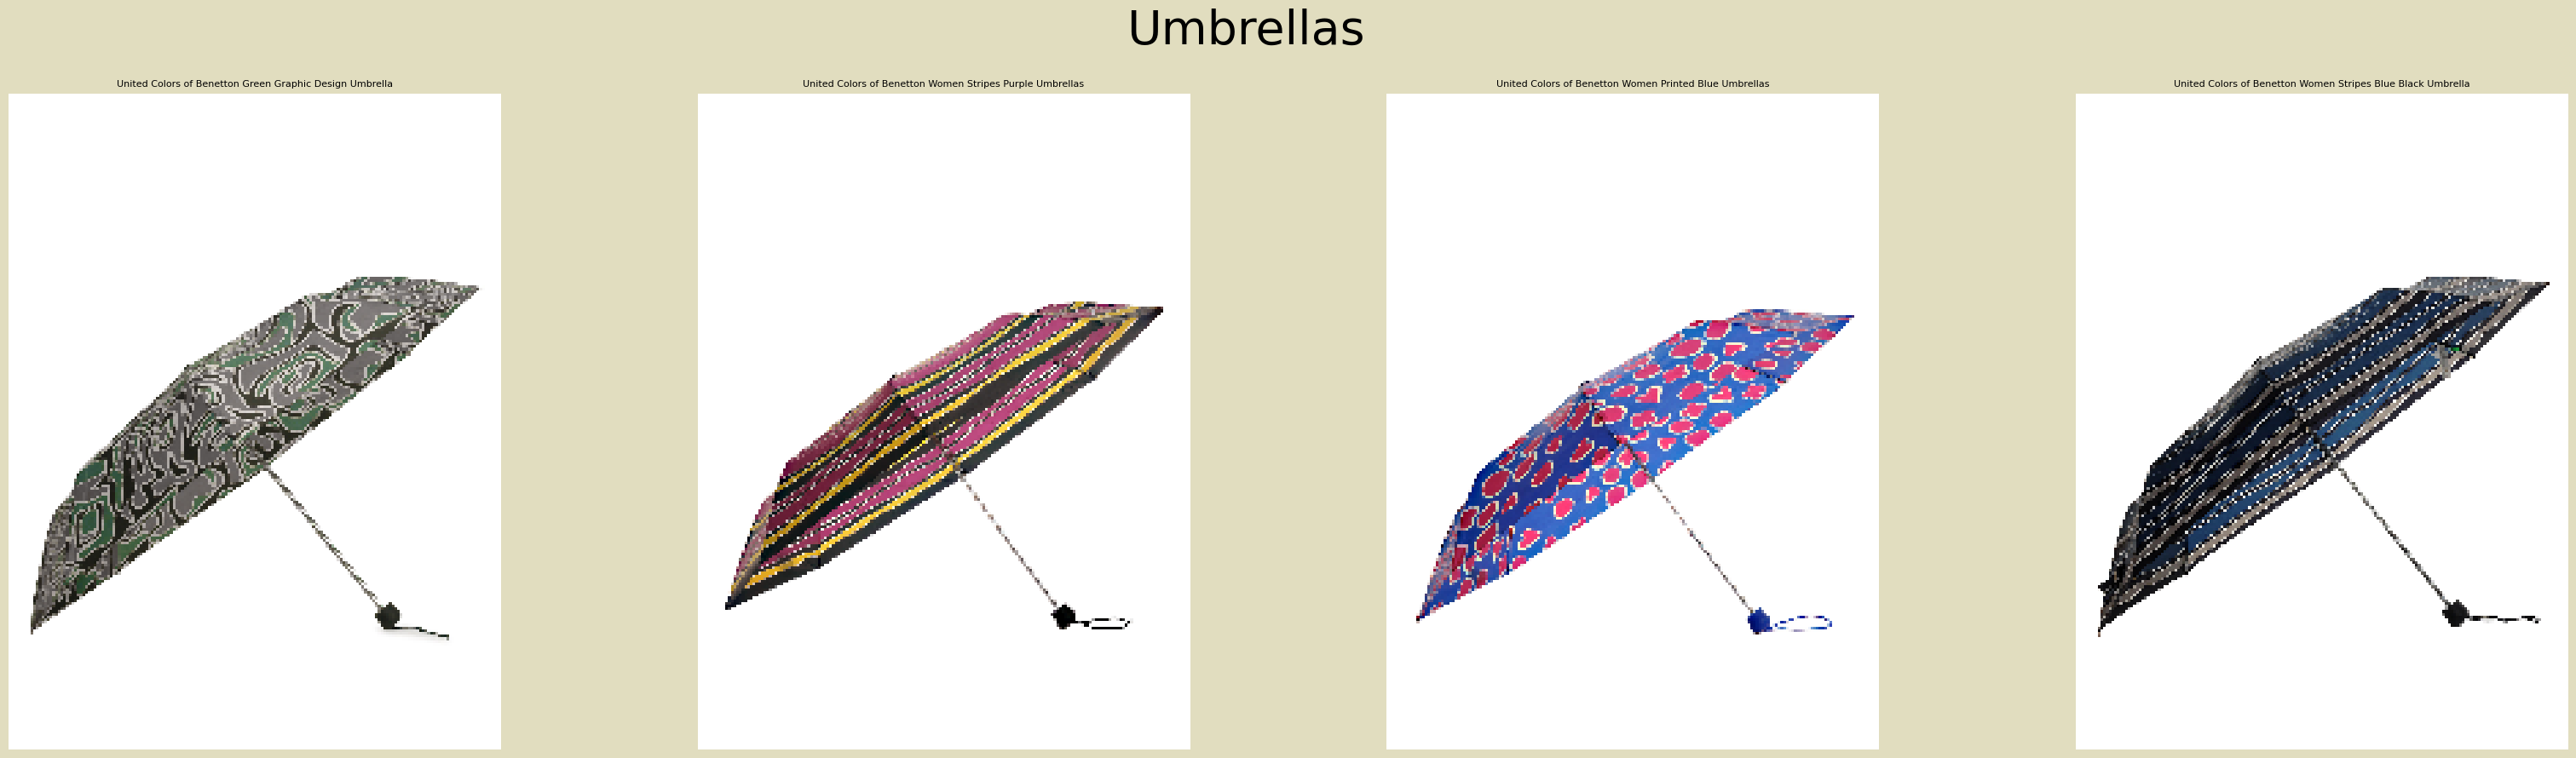

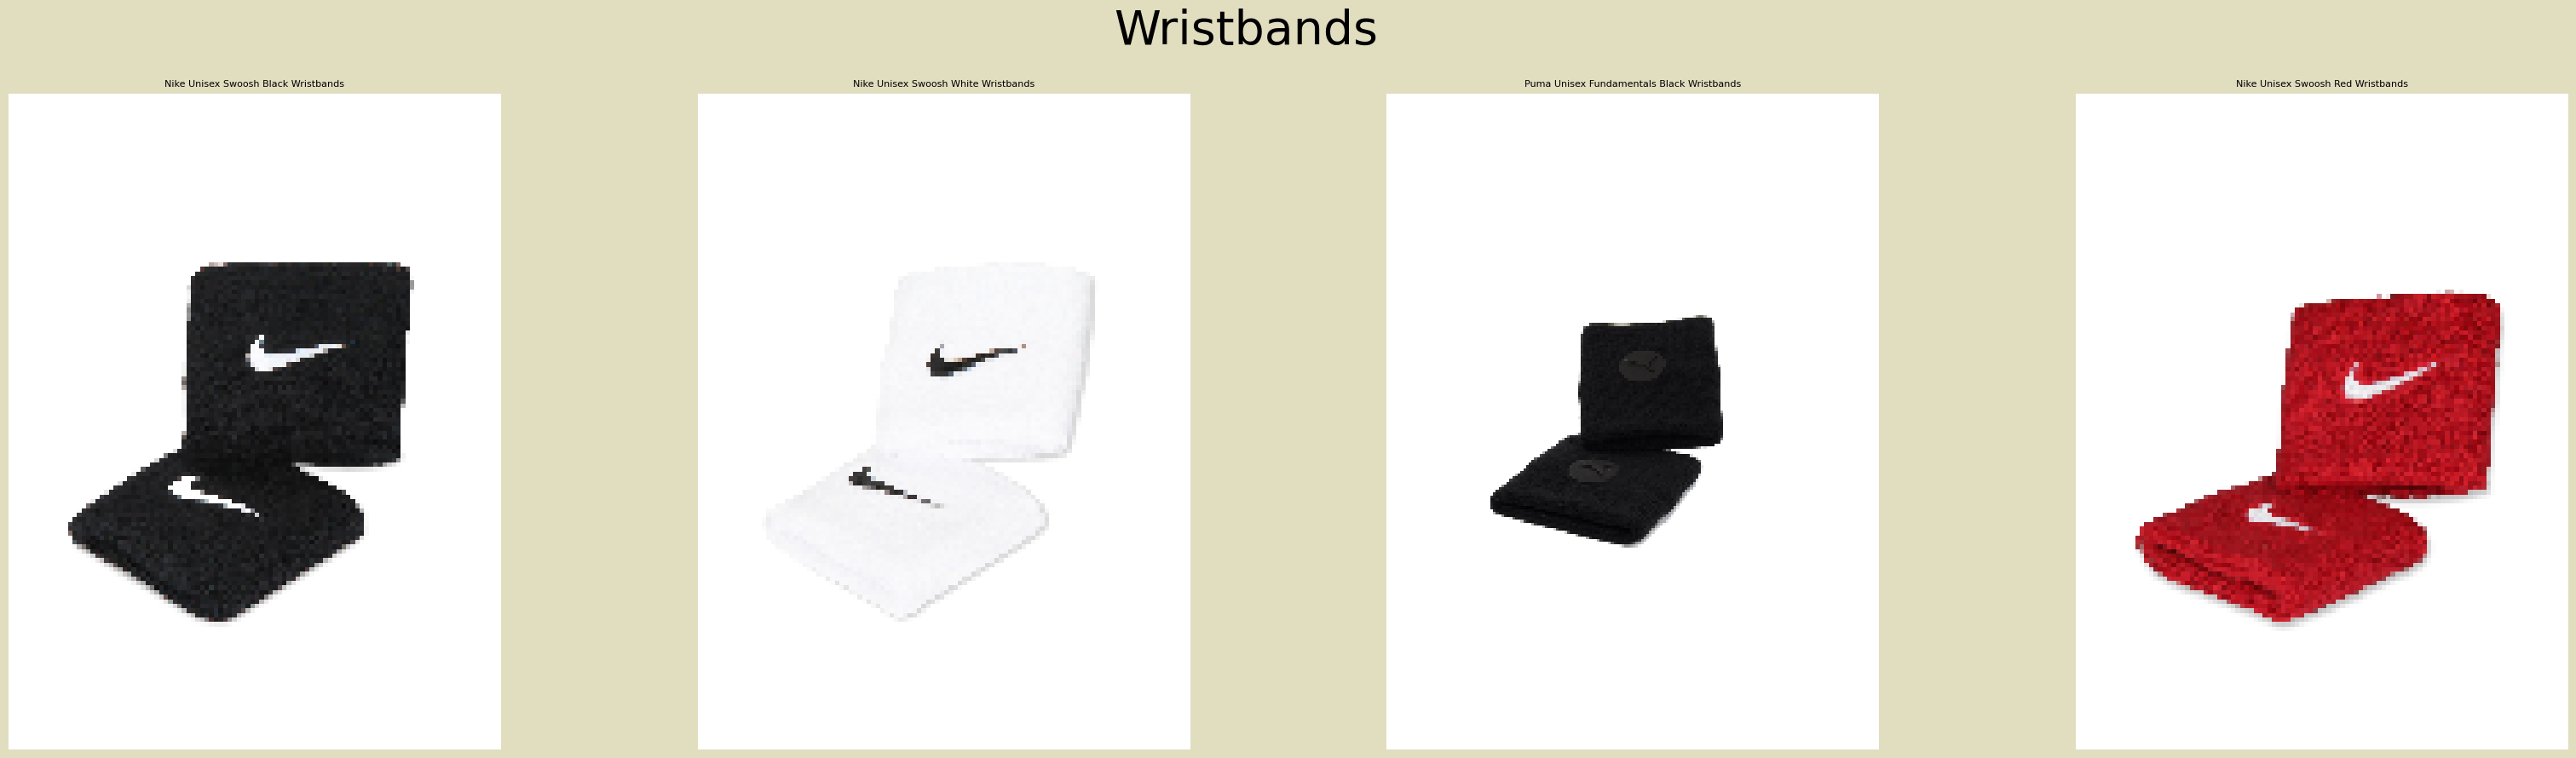

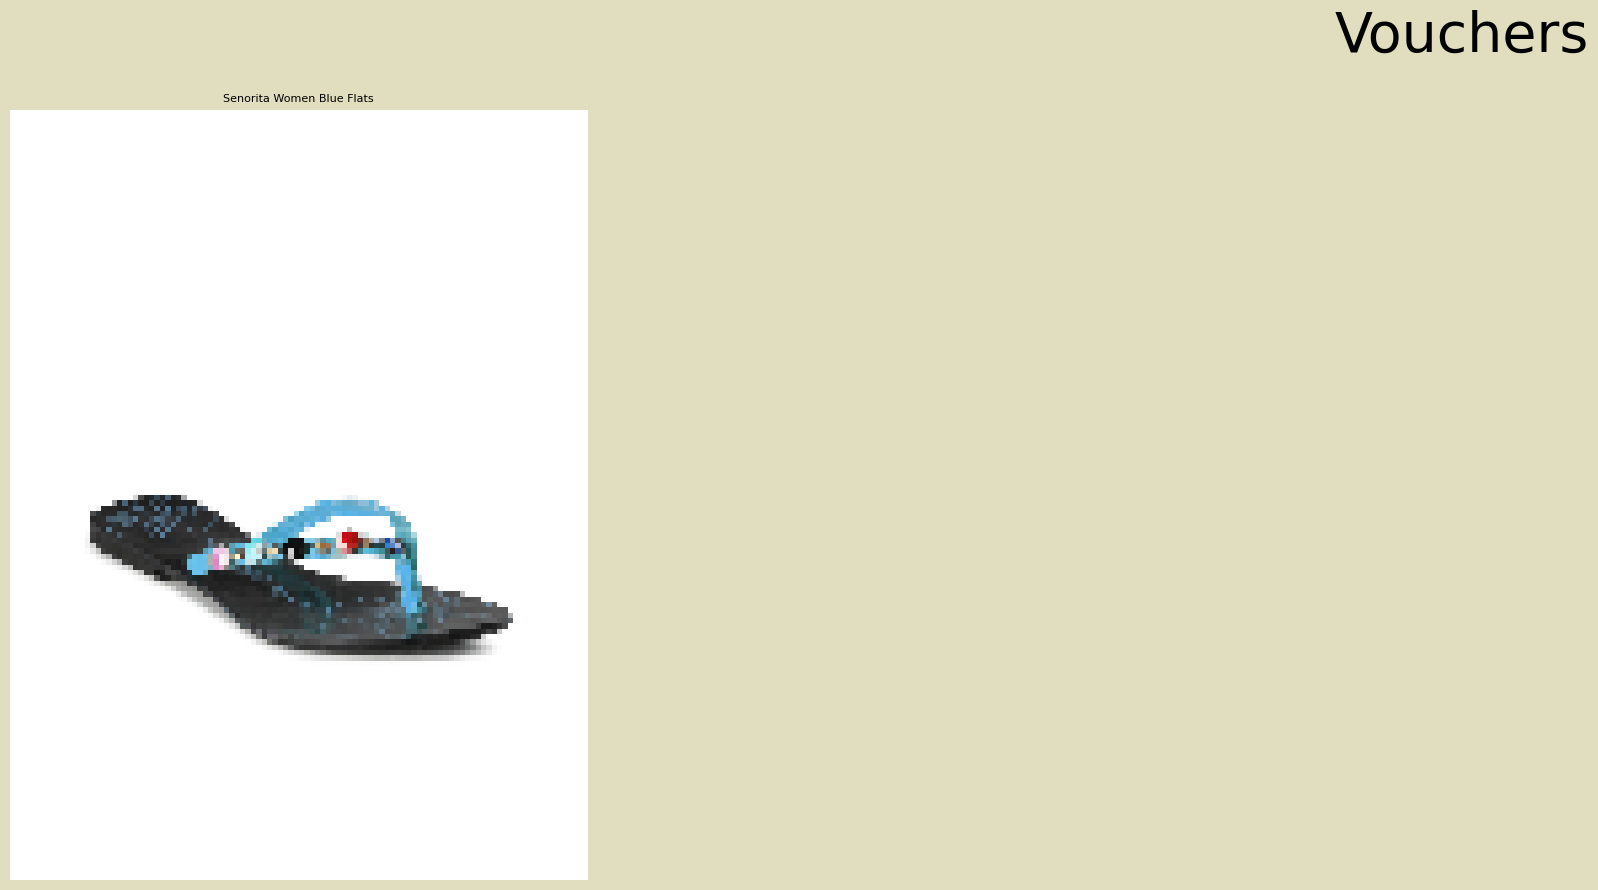

In [34]:
plot_grouped_images(styles_csv, 'subCategory')